In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude value
import folium # map rendering library
import re
import matplotlib.pyplot as plt
import geojson
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geopandas import GeoSeries
import geoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
boroughs=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Boroughs_london.csv",index_col=0)

In [3]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [4]:
london_data_index=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_data_t_index.csv",index_col=0)

In [5]:
london_data_index.head()

arts_entertainment  building  education  event  food  nightlife  \
Abbey Wood                  0.0       0.0        0.0    0.0  0.00       0.00   
Acton                       0.0       0.0        0.0    0.0  0.20       0.00   
Addington                   0.0       0.0        0.0    0.0  0.25       0.00   
Addiscombe                  0.0       0.0        0.0    0.0  0.50       0.00   
Albany Park                 0.0       0.0        0.0    0.0  0.25       0.25   

             parks_outdoors  shops  travel  Favourite  
Abbey Wood             0.50   0.50    0.00        0.0  
Acton                  0.10   0.30    0.40        1.0  
Addington              0.00   0.25    0.50        0.0  
Addiscombe             0.25   0.25    0.00        0.0  
Albany Park            0.00   0.25    0.25        0.0

In [6]:
nice_places=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/nice_places.csv",index_col=0)

london_data=london_data_index.apply(lambda x:x*100)
london_data['Favourite']=london_data['Favourite']/100
london_data_percentage=london_data[london_data.columns[:-1]]
london_data.head()

# pandas plotting DataFrame
fig,ax=plt.subplots(figsize=(12,6))
london_data_percentage.plot(ax=ax,title="London_data Dataset")
ax.set_xticks(london_data.index.value_counts().cumsum().values)
ax.set_xticklabels(london_data.index.values,rotation=90)
ax.set_xlabel('Neighbourhoods in London')
ax.set_ylabel('Frequency(%)')
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size':12})

# pandas plotting DataFrame
fig,ax=plt.subplots(figsize=(24,14))
london_data_percentage.T.plot(ax=ax,title="London_data Dataset")
ax.set_xticks(london_data_percentage.columns.value_counts().cumsum().values-1)
ax.set_xticklabels(london_data_percentage.columns.values,rotation=90)
ax.set_xlabel('Venues in London')
ax.set_ylabel('Neighbourhoods')
ax.legend(loc='center left',bbox_to_anchor=(1.20,0.5), prop={'size':12})

In [9]:
Nclusters_N031=pd.read_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N031.xlsx',index_col=0)
Nclusters_N032=pd.read_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N032.xlsx',index_col=0)
Nclusters_N033=pd.read_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N033.xlsx',index_col=0)
Nclusters_N034=pd.read_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N034.xlsx',index_col=0)
Nclusters_N035=pd.read_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N035.xlsx',index_col=0)

In [10]:
Nclusters_03=[Nclusters_N031,Nclusters_N032,Nclusters_N033,Nclusters_N034,Nclusters_N035]

In [11]:
london_data_index.columns

Index(['arts_entertainment', 'building', 'education', 'event', 'food',
       'nightlife', 'parks_outdoors', 'shops', 'travel', 'Favourite'],
      dtype='object')

In [12]:
import numpy as np
condition7=london_data_index.apply(lambda x: ((x.arts_entertainment>0) & (x.building>0) & (x.food>0) & (x.nightlife>0) & (x.parks_outdoors>0) & (x.shops >0) & (x.travel>0) ),axis=1)
                
london_data_index.loc[condition7,:].groupby('Favourite').count()

arts_entertainment  building  education  event  food  nightlife  \
Favourite                                                                    
0.0                        41        41         41     41    41         41   
1.0                        41        41         41     41    41         41   

           parks_outdoors  shops  travel  
Favourite                                 
0.0                    41     41      41  
1.0                    41     41      41

In [13]:
condition8=london_data_index.apply(lambda x: ((x.arts_entertainment>0) & (x.building>0) & \
         (x.food>0) & (x.nightlife>0) & (x.parks_outdoors>0) & (x.shops >0) & (x.travel>0) & (x.Favourite==0.0) ),axis=1)
tur_f=london_data_index.loc[condition8,:][london_data_index.columns[:2] | london_data_index.columns[4:9]]     
tur_f

arts_entertainment  building      food  \
Aldwych                                    0.190000  0.030000  0.490000   
Angel                                      0.054054  0.027027  0.581081   
Bayswater                                  0.041667  0.027778  0.555556   
Belgravia                                  0.014706  0.029412  0.485294   
Cambridge Heath                            0.104167  0.062500  0.437500   
Canary Wharf                               0.030000  0.040000  0.650000   
Charing Cross                              0.180000  0.040000  0.400000   
Chinatown                                  0.180000  0.010000  0.530000   
Clerkenwell                                0.070000  0.020000  0.530000   
Dalston                                    0.029412  0.029412  0.529412   
Deptford                                   0.060000  0.080000  0.360000   
Ealing                                     0.029412  0.058824  0.470588   
Earlsfield                                 0.034483  0.034483  0.517241   
Eel Pie Island                             0.021739  0.021739  0.521739   
Enfield Town                               0.016129  0.080645  0.370968   
Finsbury                                   0.070000  0.020000  0.530000   
Hackney Central                            0.066667  0.033333  0.533333   
Hackney Wick                               0.172414  0.034483  0.413793   
Haggerston                                 0.076923  0.025641  0.461538   
Hoxton                                     0.028571  0.028571  0.514286   
Islington                                  0.080645  0.016129  0.532258   
Kingston upon Thames                       0.023810  0.023810  0.500000   
Leyton                                     0.055556  0.055556  0.333333   
Lisson Grove                               0.066667  0.022222  0.511111   
Little Venice                              0.027778  0.055556  0.555556   
Marylebone (also St Marylebone)            0.092784  0.030928  0.618557   
Old Ford                                   0.117647  0.117647  0.352941   
Paddington                                 0.023256  0.023256  0.488372   
Pentonville                                0.101695  0.016949  0.576271   
Poplar                                     0.034091  0.022727  0.625000   
Romford                                    0.053333  0.026667  0.360000   
South Ruislip                              0.052632  0.052632  0.105263   
Spitalfields                               0.030000  0.030000  0.610000   
St James's                                 0.170000  0.030000  0.400000   
St Luke's                                  0.050000  0.080000  0.600000   
Stockwell                                  0.092308  0.046154  0.446154   
Tottenham Green                            0.034483  0.068966  0.482759   
Tower Hill                                 0.116883  0.038961  0.389610   
Vauxhall                                   0.054054  0.081081  0.351351   
Wandsworth                                 0.030303  0.030303  0.363636   
Wimbledon                                  0.027778  0.055556  0.486111   

                                 nightlife  parks_outdoors     shops    travel  
Aldwych                           0.090000        0.030000  0.080000  0.090000  
Angel                             0.108108        0.040541  0.148649  0.040541  
Bayswater                         0.111111        0.055556  0.166667  0.041667  
Belgravia                         0.073529        0.058824  0.205882  0.132353  
Cambridge Heath                   0.166667        0.062500  0.125000  0.041667  
Canary Wharf                      0.030000        0.110000  0.100000  0.040000  
Charing Cross                     0.100000        0.100000  0.100000  0.080000  
Chinatown                         0.110000        0.030000  0.110000  0.030000  
Clerkenwell                       0.220000        0.070000  0.070000  0.020000  
Dalston                           0.147059        0.029412  0.176471  0.

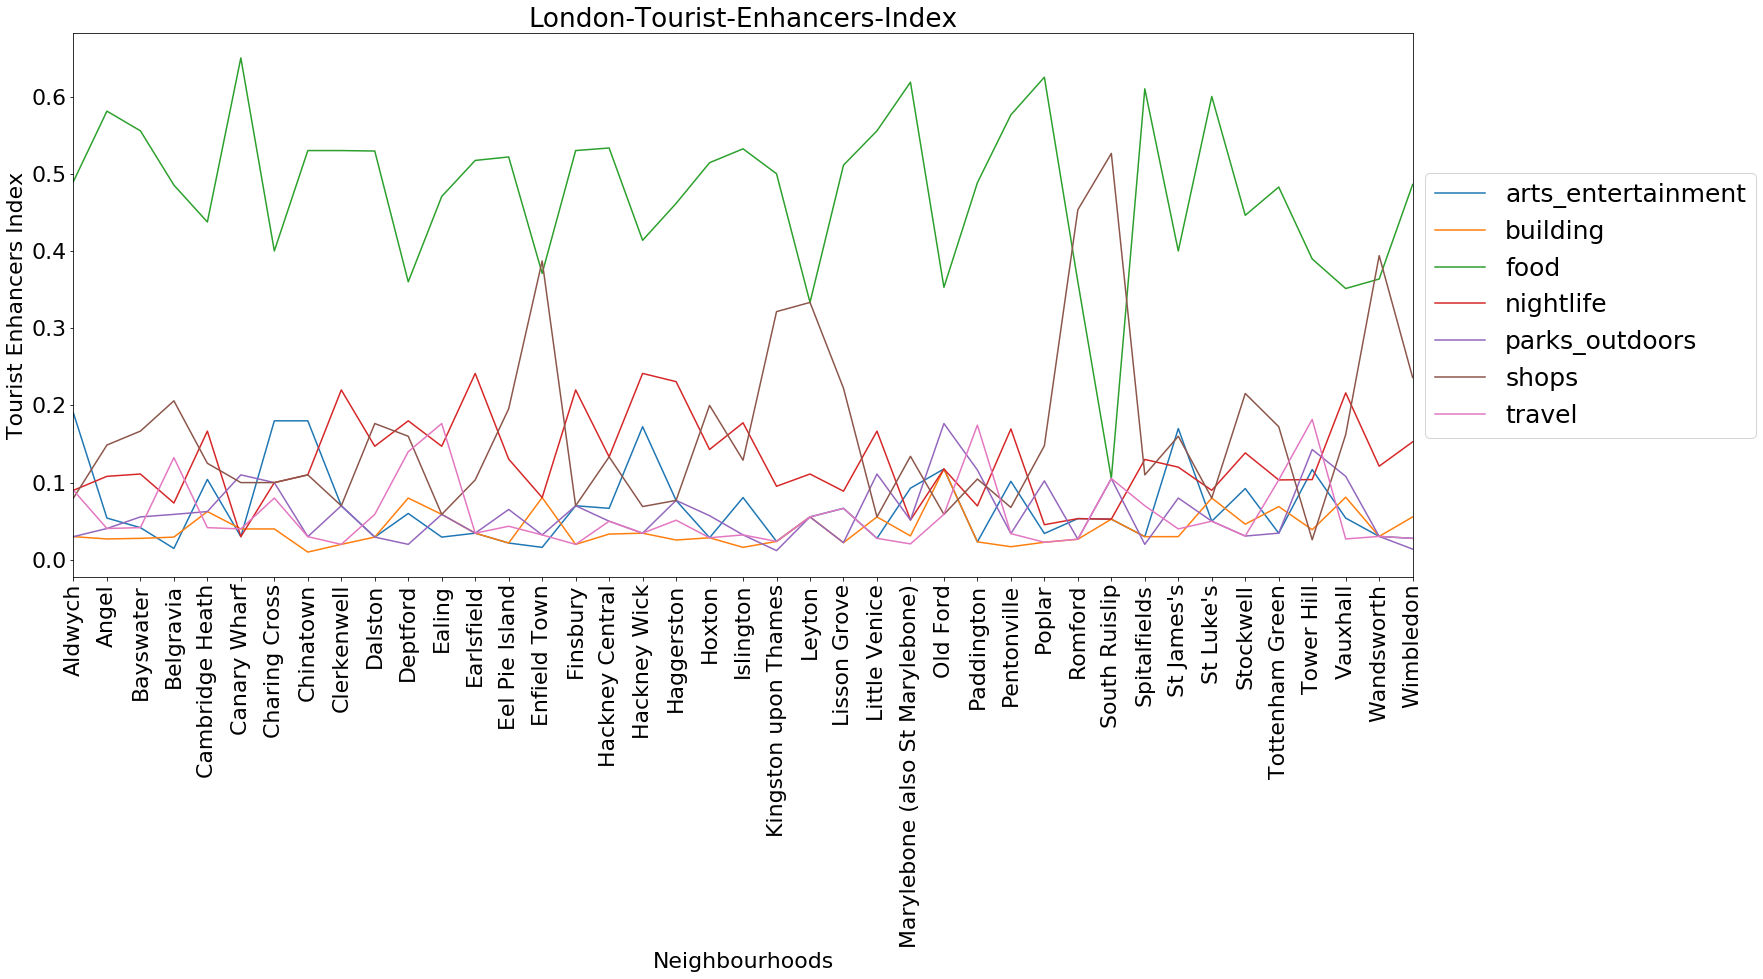

In [14]:
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 22})
import numpy as np
fig,ax=plt.subplots(figsize=(24,10)) 
tur_f.plot(ax=ax,title="London-Tourist-Enhancers-Index") 
ax.set_xticks(tur_f.index.value_counts().cumsum().values-1) 
ax.set_xticklabels(tur_f.index.values,rotation=90)
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Tourist Enhancers Index') 
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size':25})

In [15]:
tur_f.describe()

arts_entertainment   building       food  nightlife  parks_outdoors  \
count           41.000000  41.000000  41.000000  41.000000       41.000000   
mean             0.068440   0.040462   0.477332   0.128769        0.059561   
std              0.049800   0.022975   0.103690   0.055590        0.037715   
min              0.014706   0.010000   0.105263   0.030000        0.011905   
25%              0.030000   0.025641   0.400000   0.090000        0.030769   
50%              0.054054   0.030303   0.490000   0.120000        0.051546   
75%              0.092308   0.055556   0.532258   0.166667        0.076923   
max              0.190000   0.117647   0.650000   0.241379        0.176471   

           shops     travel  
count  41.000000  41.000000  
mean    0.167003   0.058432  
std     0.114363   0.044639  
min     0.025974   0.020000  
25%     0.080000   0.030000  
50%     0.134021   0.040541  
75%     0.200000   0.066667  
max     0.526316   0.181818

In [16]:
pp_list=[]
for ii in range(len(Nclusters_03)):
    for jj in range(3):
        for kk in range(len(tur_f.index)):
            if tur_f.index[kk] in (Nclusters_03[ii][jj].values):
                 Latitude,Longitude=neighbourhoods.loc[neighbourhoods['Neighbourhood']==tur_f.index[kk],:][['Latitude','Longitude']].values[0]
                 pp_list.append([ii,jj,Latitude,Longitude])
        

In [17]:
tur_f['B-Label']=[pp_list[ii][0] for ii in range(len(pp_list))]
tur_f['C-Label']=[pp_list[ii][1] for ii in range(len(pp_list))]
tur_f['Longitude']=[pp_list[ii][3] for ii in range(len(pp_list))]
tur_f['Latitude']=[pp_list[ii][2] for ii in range(len(pp_list))]

In [18]:
tur_f

arts_entertainment  building      food  \
Aldwych                                    0.190000  0.030000  0.490000   
Angel                                      0.054054  0.027027  0.581081   
Bayswater                                  0.041667  0.027778  0.555556   
Belgravia                                  0.014706  0.029412  0.485294   
Cambridge Heath                            0.104167  0.062500  0.437500   
Canary Wharf                               0.030000  0.040000  0.650000   
Charing Cross                              0.180000  0.040000  0.400000   
Chinatown                                  0.180000  0.010000  0.530000   
Clerkenwell                                0.070000  0.020000  0.530000   
Dalston                                    0.029412  0.029412  0.529412   
Deptford                                   0.060000  0.080000  0.360000   
Ealing                                     0.029412  0.058824  0.470588   
Earlsfield                                 0.034483  0.034483  0.517241   
Eel Pie Island                             0.021739  0.021739  0.521739   
Enfield Town                               0.016129  0.080645  0.370968   
Finsbury                                   0.070000  0.020000  0.530000   
Hackney Central                            0.066667  0.033333  0.533333   
Hackney Wick                               0.172414  0.034483  0.413793   
Haggerston                                 0.076923  0.025641  0.461538   
Hoxton                                     0.028571  0.028571  0.514286   
Islington                                  0.080645  0.016129  0.532258   
Kingston upon Thames                       0.023810  0.023810  0.500000   
Leyton                                     0.055556  0.055556  0.333333   
Lisson Grove                               0.066667  0.022222  0.511111   
Little Venice                              0.027778  0.055556  0.555556   
Marylebone (also St Marylebone)            0.092784  0.030928  0.618557   
Old Ford                                   0.117647  0.117647  0.352941   
Paddington                                 0.023256  0.023256  0.488372   
Pentonville                                0.101695  0.016949  0.576271   
Poplar                                     0.034091  0.022727  0.625000   
Romford                                    0.053333  0.026667  0.360000   
South Ruislip                              0.052632  0.052632  0.105263   
Spitalfields                               0.030000  0.030000  0.610000   
St James's                                 0.170000  0.030000  0.400000   
St Luke's                                  0.050000  0.080000  0.600000   
Stockwell                                  0.092308  0.046154  0.446154   
Tottenham Green                            0.034483  0.068966  0.482759   
Tower Hill                                 0.116883  0.038961  0.389610   
Vauxhall                                   0.054054  0.081081  0.351351   
Wandsworth                                 0.030303  0.030303  0.363636   
Wimbledon                                  0.027778  0.055556  0.486111   

                                 nightlife  parks_outdoors     shops  \
Aldwych                           0.090000        0.030000  0.080000   
Angel                             0.108108        0.040541  0.148649   
Bayswater                         0.111111        0.055556  0.166667   
Belgravia                         0.073529        0.058824  0.205882   
Cambridge Heath                   0.166667        0.062500  0.125000   
Canary Wharf                      0.030000        0.110000  0.100000   
Charing Cross                     0.100000        0.100000  0.100000   
Chinatown                         0.110000        0.030000  0.110000   
Clerkenwell                       0.220000        0.070000  0.070000   
Dalston                           0.147059        0.029412  0.176471   
Deptford                          0.180000        0.020000  0.160000   
Ealing            

In [19]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=70)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of Most Visited places in London using latitude and longitude values
map_london_most_enhancers = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,place  in zip(tur_f['Latitude'],tur_f['Longitude'], tur_f.index):
            label = '{}'.format(place)
            label = folium.Popup(label, parse_html=True)
            folium.RegularPolygonMarker(
                [lat, lng],
                rotation=70,
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='white',
                #fill_color='#3186cc',
                fill_opacity=0.3,
                parse_html=False).add_to(map_london_most_enhancers)  
map_london_most_enhancers

In [20]:
map_london_most_enhancers.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_most_enhancers.html")

In [21]:
tur_f.groupby('B-Label').count()

arts_entertainment  building  food  nightlife  parks_outdoors  shops  \
B-Label                                                                         
0                        12        12    12         12              12     12   
2                        29        29    29         29              29     29   

         travel  C-Label  Longitude  Latitude  
B-Label                                        
0            12       12         12        12  
2            29       29         29        29

In [22]:
bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

Convert tur_f DataFrame into GeoDataFrame tur_gdf

In [23]:
tur_gdf = gpd.GeoDataFrame(tur_f, geometry=gpd.points_from_xy(tur_f.Longitude, tur_f.Latitude))

In [24]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]
        print(bc05[ii][0])

['Hillingdon', 'Lewisham', 'Wandsworth', 'Havering', 'Harrow', 'Redbridge', 'Hackney', 'Enfield', 'Greenwich', 'Sutton', 'Bromley', 'Brent', 'Bexley', 'Kingston upon Thames']
['Newham']
['Southwark', 'Lambeth', 'Tower Hamlets', 'Merton', 'Waltham Forest', 'Richmond upon Thames', 'City of London', 'Islington', 'Haringey', 'Hammersmith and Fulham', 'Ealing', 'Croydon', 'Camden', 'Kensington and Chelsea', 'Westminster']
['Barking and Dagenham']
['Hounslow', 'Barnet']


In [25]:
!pip install bng_latlon --user
from bng_to_latlon import OSGB36toWGS84
OSGB36toWGS84( 538890,177320)



(51.47779538331092, -0.001401683782667227)

In [26]:
from latlon_to_bng import WGS84toOSGB36
WGS84toOSGB36(51.4778, -0.0014)


(538890.105336584, 177320.49650700152)

In [27]:
file='/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/London_Borough_Excluding_MHW.json'

In [28]:
map_data = gpd.read_file(file)
#map_data_london=gpd.read_file(file)

In [29]:
def converter_coords(x,y):
         x,y=OSGB36toWGS84(x,y)
         return y,x   

In [30]:

i=0
k=0
j=0
len_multi_polygon=[]
polygon_dict={}
for polygon in map_data.geometry.tolist():
            try:
                x_array,y_array=polygon.exterior.coords.xy
                polygon_dict[(i,k)]=[converter_coords(x,y) for x,y in zip(x_array,y_array)]
                len_multi_polygon.append(0)
                for x,y in zip(x_array,y_array):
                        x,y=OSGB36toWGS84(x,y)
                        print(i,k,x,y)
                
            except: 
                    j=0
                    len_multi_polygon.append(len(polygon))
                    for polygon in polygon:
                        j=j+1 
                        x_array,y_array=polygon.exterior.coords.xy
                        polygon_dict[(i,j)]=[converter_coords(x,y) for x,y in zip(x_array,y_array)]
                        for x,y in zip(x_array,y_array):
                                x,y=OSGB36toWGS84(x,y)
                                print(i,j,x,y)
            i+=1
            print ('New i=',i)

0 0 51.3936678789106 -0.31772013795252596
0 0 51.393772304944015 -0.31760275192755766
0 0 51.39389053367032 -0.31744461132554314
0 0 51.39444018586845 -0.3166453568106184
0 0 51.396190215036775 -0.31421213675059395
0 0 51.39711037031838 -0.3129779828600965
0 0 51.39740238204159 -0.31258629529173854
0 0 51.3974536211872 -0.3125225960649437
0 0 51.39802375672252 -0.31221123093408065
0 0 51.3981424449115 -0.31214792286235127
0 0 51.398373550465614 -0.31202297410433527
0 0 51.398417114263474 -0.3119883066106268
0 0 51.398509220508366 -0.31189003688799394
0 0 51.39881435797942 -0.3114734081157552
0 0 51.39933499161746 -0.31072250369313437
0 0 51.39949339404813 -0.3104823402684438
0 0 51.3996550388404 -0.31021761649700885
0 0 51.3998139452586 -0.3099501165592204
0 0 51.39989800989224 -0.3097931941995069
0 0 51.39997301684405 -0.3096941095282469
0 0 51.400014699468144 -0.3096537574728159
0 0 51.400365436420074 -0.3094064952774676
0 0 51.40045274891747 -0.3093500839233161
0 0 51.40062762258724

0 0 51.420172262818994 -0.286618864913948
0 0 51.42026340196236 -0.28620987038983925
0 0 51.4204124225731 -0.2856390624670451
0 0 51.42061286840643 -0.28495701816121694
0 0 51.421237950019645 -0.2827531864929163
0 0 51.421255040518055 -0.28269213811377636
0 0 51.42185626843073 -0.2804589347600725
0 0 51.42476680923682 -0.27682418938693965
0 0 51.42475936560723 -0.2768072086654274
0 0 51.425084884985765 -0.2764396786686841
0 0 51.42557418740212 -0.2758358329572673
0 0 51.425876970175494 -0.27539003173330023
0 0 51.426900540195014 -0.2741834661948438
0 0 51.427428973010095 -0.2735507659427398
0 0 51.42787322854422 -0.2730032187092099
0 0 51.42855954252909 -0.2721617059418776
0 0 51.42920533469372 -0.27137779973001297
0 0 51.42934828129643 -0.2711925877583163
0 0 51.42940827222494 -0.2711140808716953
0 0 51.429542718710465 -0.2709622746201072
0 0 51.429721333289955 -0.2706347355164871
0 0 51.42989996814117 -0.27030863161697966
0 0 51.43039528894544 -0.2693836265175334
0 0 51.4306522737239

0 0 51.3909241172217 -0.24013738210601598
0 0 51.390808690310585 -0.24011593895070954
0 0 51.39063614661561 -0.2400636289234944
0 0 51.390478349510495 -0.2400351879131002
0 0 51.39038201185248 -0.24002738591411105
0 0 51.39006887648016 -0.23995459983670547
0 0 51.38974061353908 -0.23989245629290581
0 0 51.389570557701475 -0.23988604617617806
0 0 51.38945394392769 -0.2397855987546411
0 0 51.38938497082985 -0.23974368964621423
0 0 51.389294492725256 -0.23970691780794073
0 0 51.38915779048676 -0.23964604899311825
0 0 51.38912890136295 -0.2396385340052125
0 0 51.388963763162735 -0.2396003160729352
0 0 51.38891852408924 -0.2395819304368357
0 0 51.388893186753826 -0.23957140466482682
0 0 51.38886714490972 -0.2395738413940129
0 0 51.38873421788884 -0.23958469202943442
0 0 51.38865190078862 -0.23961228473628937
0 0 51.38850933894826 -0.23958038711668728
0 0 51.38836591383135 -0.2394910325484174
0 0 51.38822748646582 -0.23949490810816396
0 0 51.388144392430945 -0.23947078947615677
0 0 51.387951

0 0 51.34221122278164 -0.3043967898745007
0 0 51.34204759832328 -0.3044616956561999
0 0 51.341874861422404 -0.3045183224627987
0 0 51.34170204140155 -0.3045692087547326
0 0 51.34137902175067 -0.3046184576551439
0 0 51.34115846263455 -0.3046639254880706
0 0 51.34086031217739 -0.3047538925221607
0 0 51.34071455915967 -0.3048109569297713
0 0 51.34042146312741 -0.304939500725567
0 0 51.34027591765066 -0.30501091371151207
0 0 51.34014124050776 -0.3050876682986784
0 0 51.339727654359066 -0.30534125323978945
0 0 51.33947995934989 -0.30543796651441596
0 0 51.339206606389176 -0.30543943246904626
0 0 51.338922494946814 -0.3053809957809452
0 0 51.33868417353562 -0.305379734444282
0 0 51.33842255225272 -0.3053219050129896
0 0 51.33821895098211 -0.3052963927353379
0 0 51.338129183053375 -0.30524514759344695
0 0 51.3378884946775 -0.3050803082943083
0 0 51.33770720258823 -0.304980755851956
0 0 51.337547522611956 -0.3048832783035899
0 0 51.337360633285854 -0.30495621171389437
0 0 51.33707473890292 -0.

1 0 51.32151042921679 -0.1565688724965287
1 0 51.32152217575011 -0.15651529990759253
1 0 51.32152967708427 -0.15647768447879043
1 0 51.32158921767163 -0.15620404789915313
1 0 51.3217136809679 -0.15582734376059273
1 0 51.321721430535675 -0.15580550514511665
1 0 51.32186363912837 -0.1559275330950427
1 0 51.32195546410898 -0.15564829316876308
1 0 51.321845026265 -0.15554508398206668
1 0 51.322172021822475 -0.15478135667847576
1 0 51.322675830378216 -0.1535397685170786
1 0 51.32300840210223 -0.15273129673429947
1 0 51.322288128352575 -0.15210721783787334
1 0 51.32226806260159 -0.15208936665646178
1 0 51.32228993515963 -0.15199376409252605
1 0 51.32234290934443 -0.151760566729655
1 0 51.32239927412419 -0.1515143156369022
1 0 51.32239918356519 -0.1515085784471197
1 0 51.32238186792075 -0.1513801059679382
1 0 51.3221862271866 -0.15072203875309123
1 0 51.32217252815878 -0.15059485687769147
1 0 51.32220522925613 -0.1505016886000163
1 0 51.32220695870994 -0.15049731342568082
1 0 51.3222726325222

1 0 51.360553016891494 -0.12190705546911265
1 0 51.36097981952028 -0.12205334885770427
1 0 51.36105483612558 -0.12145991118807356
1 0 51.36106525289261 -0.12138048176863107
1 0 51.36129886295577 -0.12148009175141322
1 0 51.36150620751114 -0.12134376539590122
1 0 51.36212601880126 -0.12158127463888439
1 0 51.362147727182695 -0.12147696163022713
1 0 51.362164411706814 -0.12139583739510272
1 0 51.36217362960987 -0.12135380296784187
1 0 51.362325920726555 -0.1214294496407336
1 0 51.362338640426685 -0.12143754795228937
1 0 51.36252407339131 -0.12111250107588702
1 0 51.36278254748349 -0.12119242096938397
1 0 51.36300913014842 -0.12124635361045627
1 0 51.36311662607179 -0.12127643025314806
1 0 51.363310676904796 -0.12092804051897234
1 0 51.3647330340799 -0.12130221866487835
1 0 51.36471328359314 -0.12147253821955169
1 0 51.364653809325915 -0.12146491617352696
1 0 51.364626779753465 -0.12146171262967201
1 0 51.36461975055318 -0.12152808080238497
1 0 51.36453044229147 -0.12235199410469247
1 0 5

1 0 51.423128645022594 -0.1104910675550858
1 0 51.42314879111203 -0.1100673554825746
1 0 51.42315034593223 -0.10994071466585001
1 0 51.423151581503745 -0.10985004629455937
1 0 51.423169185158436 -0.10960335836794918
1 0 51.42315738730412 -0.10937370575799304
1 0 51.42313679359367 -0.10921201974994683
1 0 51.42303751625407 -0.10868823628532563
1 0 51.422863615667076 -0.10788705601938275
1 0 51.422698550270276 -0.10702079057881292
1 0 51.42261394379805 -0.10651510893897191
1 0 51.42258343942349 -0.10618554829867129
1 0 51.422576832377494 -0.1060549312181733
1 0 51.42257663928963 -0.10598733656370786
1 0 51.42257447154374 -0.10579756346649824
1 0 51.42260751569037 -0.10511585522176878
1 0 51.42263991358877 -0.10461684391618134
1 0 51.42264621783125 -0.10422822684174386
1 0 51.4225776906394 -0.10077325803037532
1 0 51.422583685788084 -0.10014444825134418
1 0 51.42257737888894 -0.0988127928810608
1 0 51.42257049954602 -0.09838876360500601
1 0 51.42257403930545 -0.09810813738080494
1 0 51.42

1 0 51.402464263176086 -0.06605740001793861
1 0 51.40237786444703 -0.06583532161684458
1 0 51.402292811962965 -0.06558587047047873
1 0 51.402179038447905 -0.06512197412669701
1 0 51.40213007570871 -0.06493426163645145
1 0 51.402040162854725 -0.06449955317624123
1 0 51.40184823496431 -0.06458529250401661
1 0 51.401719636437406 -0.06463960352692688
1 0 51.40163675600071 -0.06397744528152123
1 0 51.4015654677034 -0.06379930529599502
1 0 51.40156423669856 -0.06377922945667658
1 0 51.40154896216095 -0.06345351629220558
1 0 51.40153497383136 -0.06293365931678832
1 0 51.40153340507487 -0.06218612090867113
1 0 51.400090902375354 -0.06071454943583521
1 0 51.39954785598921 -0.06017827743795129
1 0 51.39926896888136 -0.060714812104840636
1 0 51.39925208481081 -0.060727027296445725
1 0 51.399123849006116 -0.060585813411796946
1 0 51.399245426681055 -0.060324772538208275
1 0 51.39925281181854 -0.05941300250989193
1 0 51.39933310787028 -0.05926584062352572
1 0 51.39960242408183 -0.058857651605630085

1 0 51.35247761698301 -0.005286160496406166
1 0 51.35238568281944 -0.00522121732988162
1 0 51.352344731480166 -0.005192836489166197
1 0 51.35215210251697 -0.005129395274952994
1 0 51.35201028530729 -0.005092470594120136
1 0 51.3517172001849 -0.004991745536198892
1 0 51.351446195285604 -0.004920221512861061
1 0 51.3512418840634 -0.004857290074993641
1 0 51.350905444777545 -0.004745526387268207
1 0 51.35074876643173 -0.004733663472563031
1 0 51.350267855994225 -0.004745939086704723
1 0 51.34982149702524 -0.004674856086232982
1 0 51.34956628190797 -0.00463280835085062
1 0 51.34943465528378 -0.004507843459495025
1 0 51.349170661871234 -0.004372833681664998
1 0 51.348952534730316 -0.004343537305429956
1 0 51.34883507182466 -0.004258169131374818
1 0 51.34868759360509 -0.0042056988765979105
1 0 51.3482677893937 -0.004004225348434542
1 0 51.34775636219538 -0.003914439330461265
1 0 51.34758876543427 -0.003789608486156644
1 0 51.34679999833915 -0.0034677596185938883
1 0 51.34632598841944 -0.0033

1 0 51.31782323392644 -0.08022024586036482
1 0 51.31769013913714 -0.08043962838447238
1 0 51.31759448789753 -0.0805842581633672
1 0 51.31743388619315 -0.08082631252112624
1 0 51.31716850991926 -0.08115023046848482
1 0 51.31711963490697 -0.08107621198704787
1 0 51.31705093082571 -0.08110921509350671
1 0 51.31684301544717 -0.0812628308185534
1 0 51.31676881373383 -0.08139938601904242
1 0 51.31670416242743 -0.0815699833568451
1 0 51.316765553659536 -0.08180420452313987
1 0 51.31698653195407 -0.08200880936719632
1 0 51.3170126046634 -0.08211822089449328
1 0 51.31696505674304 -0.08223500799342155
1 0 51.31682413916119 -0.08258099070870056
1 0 51.31676337039493 -0.08309870533371677
1 0 51.316682265287085 -0.08358282505131548
1 0 51.31665162635698 -0.08368885985417181
1 0 51.31638338323061 -0.08361824117944276
1 0 51.316243090162935 -0.08422249409616495
1 0 51.31586812324491 -0.08482934145098607
1 0 51.315453697237984 -0.08428838436321798
1 0 51.31513796103212 -0.08389830389122416
1 0 51.3147

1 0 51.29311877988747 -0.1305579040946872
1 0 51.29327055628199 -0.1306578776414773
1 0 51.29374048263539 -0.1308582414996887
1 0 51.294229657586115 -0.1311940892167923
1 0 51.2944480909151 -0.13135734025466747
1 0 51.29468835098547 -0.1314795449716663
1 0 51.29471273025549 -0.13148572691146135
1 0 51.29476589078793 -0.1314921746956095
1 0 51.29482071146193 -0.13148994898903837
1 0 51.29487085562701 -0.13147643832516193
1 0 51.29492706192001 -0.13144833796652583
1 0 51.29498658847646 -0.13140289046139242
1 0 51.29503618356355 -0.1313549773696341
1 0 51.29510926563353 -0.1312573422788339
1 0 51.295300175103264 -0.13110471938427948
1 0 51.29534559690445 -0.13107705624769844
1 0 51.295445048737086 -0.13111031115990537
1 0 51.29547514055038 -0.13113634220853665
1 0 51.29560796873218 -0.13128872949645923
1 0 51.29569814605982 -0.1314170305680864
1 0 51.29598379778377 -0.1319605399008321
1 0 51.29613252027461 -0.13215101464323778
1 0 51.29632698468782 -0.1323338966441556
1 0 51.2967696604403

2 0 51.367373280146 -0.02315574664252807
2 0 51.367590383259625 -0.02317800258389932
2 0 51.3678334474891 -0.02324655014700535
2 0 51.36812776018516 -0.02326117154103036
2 0 51.36833529324476 -0.023302517081228286
2 0 51.36841007111207 -0.02336394683745218
2 0 51.36860314861756 -0.023507919599363766
2 0 51.36886489013093 -0.023564172532209913
2 0 51.36905590861548 -0.023586117476322662
2 0 51.36934631183076 -0.023582232472583734
2 0 51.36956273661191 -0.023564292560797374
2 0 51.369566331136525 -0.02356413777189026
2 0 51.36959144676033 -0.023507024648450444
2 0 51.36969850497706 -0.023509597864078587
2 0 51.36969767661675 -0.023567101959922503
2 0 51.36976713765741 -0.02357991462423723
2 0 51.369945817498476 -0.0236167584733206
2 0 51.37015988547565 -0.02361903405204559
2 0 51.370490119068705 -0.02363067458878258
2 0 51.37100209409956 -0.023647419680370266
2 0 51.37122765046979 -0.02363770652331821
2 0 51.37123544260705 -0.02372645000878157
2 0 51.37123643812093 -0.02373215417551343
2

2 0 51.3933206182992 -0.05049458180089374
2 0 51.3934964571647 -0.051388388621814426
2 0 51.393626008442155 -0.051553940876480985
2 0 51.39362974633479 -0.05156240679082515
2 0 51.393581079521766 -0.05171828213600085
2 0 51.39370161705352 -0.051720348362492556
2 0 51.39399665843267 -0.05172506296773976
2 0 51.3940812321172 -0.05205208779299057
2 0 51.3941580123107 -0.05245131840054713
2 0 51.39434913014213 -0.052533762696245524
2 0 51.394543866363044 -0.05261749147888435
2 0 51.39459369758696 -0.052639812551249346
2 0 51.394631130223665 -0.052619535590529634
2 0 51.39484478159757 -0.053138022445193306
2 0 51.39478610002785 -0.05323251327510706
2 0 51.39492110476511 -0.053509968415947795
2 0 51.395092641119334 -0.05327987435419016
2 0 51.39517153168107 -0.05342746304682085
2 0 51.39645402744226 -0.05181184625433436
2 0 51.3971263127469 -0.05097824555984967
2 0 51.39759857313255 -0.05082447614696596
2 0 51.39798992176004 -0.05034780988736869
2 0 51.398038754533815 -0.05047224170061233
2 

2 0 51.42338253369441 -0.04294267767515424
2 0 51.42322487534348 -0.04287174031913729
2 0 51.423236880123746 -0.0428367061542719
2 0 51.423654296760425 -0.04160773944761493
2 0 51.42382870764361 -0.04171247863500332
2 0 51.42386121248854 -0.04166649845797295
2 0 51.424077207787064 -0.041353759215684203
2 0 51.42418152649496 -0.04119251133217376
2 0 51.424246007175604 -0.04106892685801383
2 0 51.42430657103332 -0.04071104699448817
2 0 51.424301759326255 -0.04031568717825689
2 0 51.424251092037885 -0.0399208511513964
2 0 51.42424205186392 -0.03981047973727842
2 0 51.424204210310265 -0.039537361301720204
2 0 51.42406960920908 -0.038963441333031076
2 0 51.42398917780037 -0.03861735075462819
2 0 51.42395804000753 -0.03847628141055967
2 0 51.424134221088515 -0.03831051144628722
2 0 51.42438404983272 -0.03808548743707781
2 0 51.424716688813014 -0.03775766177339473
2 0 51.42499270508331 -0.03748547966018776
2 0 51.42499413744435 -0.03649720803193709
2 0 51.42500462890875 -0.03615728568077259
2

2 0 51.415628769260024 -0.0034270045444833364
2 0 51.41566075206189 -0.003404038595627717
2 0 51.415902319951954 -0.0008522766821096605
2 0 51.41591233476741 -0.0007540445444999145
2 0 51.416075074027084 -0.0008576828645370588
2 0 51.41610414830626 -0.0008751105575411677
2 0 51.416266108158176 -0.0005113766363553195
2 0 51.41633794650068 -0.00034716579441575754
2 0 51.41645859690761 -0.00030306944451664956
2 0 51.41654246202814 -0.000316667511690296
2 0 51.416555965719546 -0.0003175163550741659
2 0 51.417050830727916 -0.00028009846079812183
2 0 51.41735297599997 -0.00022664146874959128
2 0 51.417365556554806 -0.00022609237501374215
2 0 51.41737811258535 -0.0002241061405878384
2 0 51.41738979452907 -0.0002235962667424442
2 0 51.41740235055948 -0.00022161003039584148
2 0 51.41741403250312 -0.00022110015547228
2 0 51.41742661305781 -0.0002205510590173787
2 0 51.417439169088084 -0.00021856481996162665
2 0 51.41745080198281 -0.0002151806584594684
2 0 51.41746243487741 -0.0002117964951569725

2 0 51.431596975253406 0.0375041394498103
2 0 51.43177659287987 0.03751788594806517
2 0 51.43208560828022 0.03748559758728741
2 0 51.43222496438149 0.0374874820184717
2 0 51.43238054391687 0.03753900376664814
2 0 51.43241541389515 0.03755062615220551
2 0 51.43247384709668 0.03755178748379304
2 0 51.43275824955473 0.037590338902241734
2 0 51.43290778884481 0.0376272058106091
2 0 51.4333462984205 0.037698512796788326
2 0 51.43333511667209 0.037669240813699933
2 0 51.43315336198333 0.03720939669153379
2 0 51.43209357238699 0.034645997137736785
2 0 51.431699010234475 0.03370052580339337
2 0 51.432235162589876 0.03322367475643378
2 0 51.43189243637904 0.03245171547231592
2 0 51.43211500685874 0.03221845699727035
2 0 51.432362442164 0.032158942188146585
2 0 51.432554900095084 0.031587689416781375
2 0 51.43249022494905 0.03153158848169659
2 0 51.43237417901591 0.03143004811468807
2 0 51.4322937278106 0.03135022883075611
2 0 51.43210389421946 0.03114758613757821
2 0 51.43220096359053 0.0310468

2 0 51.426337352131604 0.06640414720304283
2 0 51.42672187773599 0.06693504657756229
2 0 51.427607208502295 0.06854157751208394
2 0 51.428476607089415 0.06992878815282212
2 0 51.42858734870076 0.0701251240693687
2 0 51.42867977864543 0.0702889843992553
2 0 51.42920990470625 0.07123077378980337
2 0 51.42943474864772 0.07163655881233551
2 0 51.42965325757383 0.07194279711007777
2 0 51.42993851391256 0.0722376725011643
2 0 51.43125932959755 0.07347138912489862
2 0 51.43137855902329 0.07303511750478088
2 0 51.43177356475726 0.07332778687603207
2 0 51.431572427707046 0.07402219043100466
2 0 51.431490088111694 0.07430475626882924
2 0 51.430830500077505 0.07483595195343234
2 0 51.43161304573313 0.07518216172846345
2 0 51.43199059395568 0.07534313971326932
2 0 51.43193879493609 0.075576736187569
2 0 51.43159415827636 0.07700985863055966
2 0 51.431044778586504 0.07943928756312166
2 0 51.43082589166576 0.08037166339424894
2 0 51.4307572946021 0.08038581086643419
2 0 51.43077746207395 0.080516205

2 0 51.407879623383025 0.14923083651736083
2 0 51.40769357102833 0.14966643395541374
2 0 51.40744805612012 0.15010786585499283
2 0 51.40723796956067 0.15033382919539778
2 0 51.40720594105173 0.1503639607366306
2 0 51.40714920406431 0.1504173775554217
2 0 51.407093312844424 0.1504737097651073
2 0 51.40703739522984 0.15053147851762047
2 0 51.40702545069189 0.15054529720799506
2 0 51.40698597022227 0.15058945794184367
2 0 51.40694738826351 0.15063366076323123
2 0 51.406908779918204 0.1506793001855034
2 0 51.40687107008261 0.15072498169610127
2 0 51.406835104540185 0.1507736208080786
2 0 51.40679913897826 0.1508222598439438
2 0 51.40676401917792 0.1508738143114508
2 0 51.40675014568235 0.1508947318438828
2 0 51.40672237230679 0.150938003539558
2 0 51.406695471068254 0.15098275402023248
2 0 51.40666856981314 0.15102750444832386
2 0 51.406642540692836 0.15107373366122268
2 0 51.40661738370559 0.15112144165895022
2 0 51.406592226699445 0.15116914960412584
2 0 51.40656884035053 0.1512183785083

2 0 51.38920890090984 0.14880706275939182
2 0 51.38900107100497 0.14871395865954287
2 0 51.388815440892145 0.14863626894009832
2 0 51.38866810817262 0.14862792900809124
2 0 51.38855379002622 0.14873181073239275
2 0 51.388164772899685 0.1490542303478765
2 0 51.38785464117947 0.14939040277482318
2 0 51.38757181296296 0.1488755285110545
2 0 51.38744103128847 0.14899444611978052
2 0 51.387131136881976 0.1493176892862415
2 0 51.38670181871549 0.14967988650816927
2 0 51.386573684204855 0.14989953291387553
2 0 51.386566285132304 0.14991068427759183
2 0 51.38645783637692 0.1500866968757364
2 0 51.38644951240075 0.15009924209402603
2 0 51.386440184468384 0.15011748932319668
2 0 51.3864308828896 0.1501343005108674
2 0 51.38642065642158 0.15015250560266957
2 0 51.38641135483792 0.15016931677604664
2 0 51.38640202689488 0.15018756397568425
2 0 51.38639272530632 0.1502043751350825
2 0 51.38638255154259 0.15021970813113147
2 0 51.38637147924665 0.1502349989960709
2 0 51.38636040694879 0.150250289853

2 0 51.35856463815864 0.14485736762144977
2 0 51.35853154995218 0.14484720346502516
2 0 51.35850826681546 0.14484180656590454
2 0 51.35843490209537 0.14482114250715084
2 0 51.35833442458216 0.1453479122056123
2 0 51.358224165991594 0.14586847694659774
2 0 51.35720517996354 0.14562694452567995
2 0 51.356188611498375 0.14525339495087047
2 0 51.35576358846319 0.14508703389812067
2 0 51.35551990217415 0.14484009632873443
2 0 51.35490730528922 0.1442599494974851
2 0 51.354900484800325 0.1442395230663632
2 0 51.35489369058029 0.14421766158781152
2 0 51.35488866716122 0.14419731908655326
2 0 51.35488277147184 0.14417549957809922
2 0 51.35488033857445 0.14416102317238877
2 0 51.35487536768841 0.14413781057714578
2 0 51.354871269065235 0.14411607499682813
2 0 51.35486809524764 0.14409294632434033
2 0 51.354865793693556 0.1440712946639268
2 0 51.35486351840581 0.14404820795292855
2 0 51.3548612431135 0.14402512124408456
2 0 51.354861348193815 0.1440193810337031
2 0 51.3547288898465 0.14398447070

2 0 51.33118884170641 0.11867290260815237
2 0 51.33110943446728 0.11853860853367175
2 0 51.331027305447655 0.11840562499836252
2 0 51.331008082083244 0.1183745928139545
2 0 51.33096696560277 0.11831096994121841
2 0 51.330925849086114 0.1182473471824147
2 0 51.33088380803071 0.11818511745120329
2 0 51.33083994388114 0.11812423933445187
2 0 51.330805678452826 0.11807959444928659
2 0 51.33076083785886 0.11802297809958111
2 0 51.3307150727359 0.11796775477396235
2 0 51.33066835714423 0.11791535879336364
2 0 51.33062071702876 0.1178643558324269
2 0 51.330618919913135 0.11786427301682463
2 0 51.3305976139347 0.11784893603559442
2 0 51.33057540939617 0.11783355766168374
2 0 51.33055225441668 0.11782100653227859
2 0 51.330529099435616 0.117808455415827
2 0 51.330524632586624 0.11780681406574056
2 0 51.33050324877938 0.11779578009345397
2 0 51.33048181309092 0.11778761476355193
2 0 51.33045947884383 0.11777940803564156
2 0 51.3304371186562 0.11777263563055762
2 0 51.33041565702591 0.11776590463

2 0 51.291028270997046 0.07047788479978356
2 0 51.29104984190517 0.07027518876645855
2 0 51.290696873603565 0.06841772257232111
2 0 51.290529800910896 0.06754105628132902
2 0 51.29038420355449 0.06753595007001456
2 0 51.29040688321151 0.06737203012008093
2 0 51.29041169200587 0.06720157035427231
2 0 51.29041322325825 0.06716578287502571
2 0 51.29041488102808 0.0671228298247643
2 0 51.29041564018902 0.06707983641375513
2 0 51.29041727262278 0.06703831647105292
2 0 51.2904198289391 0.06699540376662616
2 0 51.290424182426165 0.06695257176642964
2 0 51.290425207536906 0.06694544655042908
2 0 51.29042633386056 0.06693258887732498
2 0 51.29043038369014 0.06690695423679413
2 0 51.29043240860283 0.06689413691478067
2 0 51.290433560223576 0.06687984612378246
2 0 51.29043468654007 0.0668669884465371
2 0 51.29043478774994 0.06686125598845329
2 0 51.29043501547114 0.06684835795764288
2 0 51.29043434459763 0.06683541957420848
2 0 51.29043369902466 0.06682104807658451
2 0 51.290418737963904 0.066649

2 0 51.30524840447226 0.029109561459084277
2 0 51.30504071636027 0.02869151132666672
2 0 51.304754779350375 0.0280662890303285
2 0 51.30468575064922 0.027949905519652124
2 0 51.30440914786385 0.02761634398794208
2 0 51.30395660437521 0.02716026007825111
2 0 51.30391623616813 0.02710252938422064
2 0 51.30377360911 0.02687387260615487
2 0 51.303718311757386 0.02679539946517144
2 0 51.3032451850802 0.026229391302449293
2 0 51.30315640975948 0.026110710170197053
2 0 51.303008190542116 0.025893291173200526
2 0 51.30251020859533 0.025204264474440373
2 0 51.302155486305246 0.024811347818009998
2 0 51.301889223703355 0.024607393090780052
2 0 51.30175929010669 0.024528510874659397
2 0 51.30159088950038 0.02443789435439946
2 0 51.301390262586445 0.024338687653579615
2 0 51.30110026970639 0.024206858531245764
2 0 51.300606185294136 0.024020146737635997
2 0 51.300446752102026 0.023983007470936516
2 0 51.30037793040193 0.02395846171536189
2 0 51.30028344532132 0.023909834341609742
2 0 51.3001242285

3 0 51.48870202791956 -0.2445623891652571
3 0 51.48867501414749 -0.24468009988123324
3 0 51.48868715635344 -0.2447703793955068
3 0 51.48832043119545 -0.2456227744387279
3 0 51.48747709701369 -0.24725683719978225
3 0 51.48743815051313 -0.247238165488058
3 0 51.487276485216185 -0.24749210766488958
3 0 51.4873029498453 -0.247698505667462
3 0 51.48725812572025 -0.24776792121349797
3 0 51.487057667943866 -0.24807375991252287
3 0 51.486887121013766 -0.24833523908891358
3 0 51.48684211570839 -0.24827214798929367
3 0 51.486063023942826 -0.24921229141920612
3 0 51.48596548245532 -0.2494248743476794
3 0 51.4859338512101 -0.2493540696135372
3 0 51.485735823742 -0.24958202215243344
3 0 51.48575132070483 -0.2496563251855817
3 0 51.485691324406176 -0.249733518919914
3 0 51.485683300302874 -0.24973814710711553
3 0 51.48556403389782 -0.24951946563537314
3 0 51.48509686724474 -0.2499103920291556
3 0 51.48468928778192 -0.25019676941846947
3 0 51.48379576217468 -0.25070049451898185
3 0 51.4834501439456 -

3 0 51.48237273676908 -0.3003239473642775
3 0 51.48214106198809 -0.30053274753303155
3 0 51.48210007396381 -0.3005587544676421
3 0 51.4820744481801 -0.30058995107818587
3 0 51.4820412759501 -0.30065887313099837
3 0 51.48199231862779 -0.3008796016915318
3 0 51.48191592457936 -0.30088244090230615
3 0 51.48189113871777 -0.30078542940624936
3 0 51.48188192174937 -0.3007699299302346
3 0 51.48187101156123 -0.30076169432238015
3 0 51.481845950752735 -0.300769826702278
3 0 51.48181073062108 -0.3008215421817319
3 0 51.481338488931335 -0.30143244304743533
3 0 51.48113623687637 -0.30174815191152476
3 0 51.48051149740181 -0.3027578552727054
3 0 51.479905404015014 -0.3035652216906785
3 0 51.47993733251832 -0.3037210105627064
3 0 51.47993415391269 -0.3037499309732543
3 0 51.47992727617794 -0.303771787994862
3 0 51.47986576523807 -0.30374670768972273
3 0 51.479819422054526 -0.3038377144832589
3 0 51.47984986854145 -0.30395323482322406
3 0 51.47984430587543 -0.3040038454161643
3 0 51.47982852380791 -0

3 0 51.469369630013006 -0.3220426594503163
3 0 51.469325049128216 -0.3221321219201514
3 0 51.46912804146273 -0.32218974113530124
3 0 51.469109470069306 -0.32233727993495137
3 0 51.46896087208886 -0.3223844837836809
3 0 51.46894841915562 -0.32226831875446876
3 0 51.468449247079626 -0.32219880282738217
3 0 51.46842853429219 -0.3221966830734503
3 0 51.46841698723066 -0.3221438355750013
3 0 51.46797072458905 -0.32193848458912544
3 0 51.467959095037095 -0.32187988173166765
3 0 51.467526487330616 -0.3219375048904035
3 0 51.46624413416588 -0.3219975039978786
3 0 51.465943444843674 -0.32191063564168193
3 0 51.46540677712472 -0.3217345281661819
3 0 51.46540658600723 -0.3218468289314804
3 0 51.46541074729492 -0.3225146801759421
3 0 51.46541401999901 -0.32255487074731937
3 0 51.465418520816165 -0.3226180509115434
3 0 51.4654212240671 -0.32268129699794806
3 0 51.46542302851777 -0.3227445760458617
3 0 51.46542393416814 -0.32280788805155886
3 0 51.46542394101812 -0.3228712330113132
3 0 51.4654221503

3 0 51.45986845509197 -0.3263957770352945
3 0 51.45986363265449 -0.3263729216174636
3 0 51.45985793198141 -0.32635153781724624
3 0 51.45985139414907 -0.32633450310853274
3 0 51.4598458372346 -0.32632319047395736
3 0 51.459840280319035 -0.3263118778421405
3 0 51.459833824633705 -0.3263005980898942
3 0 51.45982826771601 -0.32628928546380886
3 0 51.45982183256698 -0.32627944445337137
3 0 51.459815397417145 -0.32626960344569994
3 0 51.45980806349783 -0.3262597953183787
3 0 51.45980075011647 -0.32625142592915823
3 0 51.459793457273335 -0.3262444952773301
3 0 51.45978526566116 -0.3262375975056863
3 0 51.459777115126535 -0.32623357720490326
3 0 51.459768065823106 -0.3262295897836508
3 0 51.45976173336453 -0.3262269424630615
3 0 51.45975544198397 -0.32622717261022866
3 0 51.45975004937205 -0.3262273698791625
3 0 51.459743757991475 -0.3262276000261746
3 0 51.45973748714989 -0.32622926890606163
3 0 51.45973211507694 -0.32623090490741385
3 0 51.45972584423528 -0.32623257378638704
3 0 51.459719593

3 0 51.458405734866446 -0.34237093530575796
3 0 51.458107057341245 -0.342679717330519
3 0 51.458054420071434 -0.34296375182596145
3 0 51.45806770068294 -0.34352176933618267
3 0 51.45805988733327 -0.3436688739108122
3 0 51.458005292158305 -0.3438781276023719
3 0 51.45797200310109 -0.3440678972180856
3 0 51.457965753481844 -0.34432578056884033
3 0 51.45798713694337 -0.3446301652096028
3 0 51.45795776673667 -0.3448428232363119
3 0 51.457919388058855 -0.34505436737111833
3 0 51.457864318010564 -0.34529386376913795
3 0 51.45771411913425 -0.3455468750262874
3 0 51.457447750553946 -0.34559680926600866
3 0 51.457384865537755 -0.3457286294890958
3 0 51.45726697532103 -0.3460409237265388
3 0 51.457224289074155 -0.34620224022650425
3 0 51.45716966901728 -0.3464100484869139
3 0 51.45715933827553 -0.3465701951886993
3 0 51.45717922703377 -0.3466414465703735
3 0 51.457174915731656 -0.3466545569471211
3 0 51.45705973332004 -0.3470315223507426
3 0 51.45696124118092 -0.347380534596893
3 0 51.4568963674

3 0 51.43081928490132 -0.42750687073148586
3 0 51.43069944120145 -0.42755558022906914
3 0 51.43034403760484 -0.42767423313606995
3 0 51.429534217395336 -0.4278372513909205
3 0 51.4294049610839 -0.42785463431200926
3 0 51.42925206550897 -0.4278526893098569
3 0 51.429394819753774 -0.42944597870609846
3 0 51.4287974004501 -0.4295556484463734
3 0 51.42879577634344 -0.42977003986413503
3 0 51.42881046540032 -0.4299939416115901
3 0 51.42887614018642 -0.4306677844184512
3 0 51.42890715814289 -0.4311040252209321
3 0 51.42894922425638 -0.4314924178219755
3 0 51.42897177911266 -0.431834008541727
3 0 51.42897861574422 -0.4322106615686559
3 0 51.42899687620674 -0.4324330042172544
3 0 51.42901790961091 -0.43266100616472764
3 0 51.42904925248545 -0.43292030267213943
3 0 51.42912476981542 -0.4334571584634122
3 0 51.42916806457928 -0.4337361865111822
3 0 51.42939107188132 -0.4348132000055931
3 0 51.429687077054226 -0.43617255859687903
3 0 51.43017244846151 -0.43818000939076746
3 0 51.43040392283944 -0

3 0 51.48627776828685 -0.4146449309384354
3 0 51.486437934128425 -0.4145860847435938
3 0 51.486525374662605 -0.41453552174987496
3 0 51.48682867802217 -0.41422253412409943
3 0 51.487179104494786 -0.41400296931033365
3 0 51.487197745737475 -0.41398503851316987
3 0 51.48723203975083 -0.413927675519258
3 0 51.48724814348188 -0.4138550999129613
3 0 51.487248341311236 -0.41380324091837895
3 0 51.48723101397982 -0.41371886233279104
3 0 51.48720523032084 -0.4135411554622531
3 0 51.48721041183927 -0.4134588764920059
3 0 51.48722330960074 -0.41341521875295073
3 0 51.48725410550411 -0.4133651784007436
3 0 51.487289765477506 -0.4133423355718939
3 0 51.48738103154671 -0.41337517621145914
3 0 51.4874236453657 -0.4134010636008331
3 0 51.487459675406264 -0.4134055743972636
3 0 51.4875205992637 -0.4133890563172772
3 0 51.487544652705175 -0.4133723776197576
3 0 51.48759952149466 -0.4133070978013696
3 0 51.48772115767565 -0.4131919685050559
3 0 51.48777995273379 -0.413151037923336
3 0 51.487892422716385

3 0 51.49550598536086 -0.30267638656104473
3 0 51.4954320765792 -0.3022296605795146
3 0 51.49522608534166 -0.3013556626530244
3 0 51.495082389341015 -0.30136820720644664
3 0 51.49491829517089 -0.3013382919962094
3 0 51.49471559835813 -0.30125074775032007
3 0 51.49441771913678 -0.301110560077404
3 0 51.49464056511346 -0.29942398981358814
3 0 51.49479390900041 -0.298278773789644
3 0 51.49488949239995 -0.29755347538986526
3 0 51.4955166932274 -0.2980789831517915
3 0 51.495544951999314 -0.2979814092994916
3 0 51.49577133139701 -0.2982135615691747
3 0 51.49594478899381 -0.2983929428426813
3 0 51.496456508226046 -0.2988305716586437
3 0 51.496587432000304 -0.2989294241998987
3 0 51.49678020162566 -0.2990763980051457
3 0 51.49716914742741 -0.2993572564698867
3 0 51.49741997937764 -0.2995395306124985
3 0 51.49753018955704 -0.2996362766611342
3 0 51.49767626504075 -0.2997878752533949
3 0 51.4977054842894 -0.29981848306910713
3 0 51.497812537566624 -0.29994560229583095
3 0 51.49792299915475 -0.29

4 0 51.55498639734848 -0.37780803285461406
4 0 51.5549975052024 -0.37770089397486223
4 0 51.55498122754499 -0.3776942606761357
4 0 51.55484645258358 -0.37763702903094076
4 0 51.55483650623157 -0.3776330554727569
4 0 51.554827197767914 -0.3776752184957535
4 0 51.55459008351619 -0.37756537184121247
4 0 51.554217597538276 -0.37729013298413877
4 0 51.553865385340266 -0.3769204179342194
4 0 51.553513172006596 -0.376550708561636
4 0 51.55353480363166 -0.37648935612714324
4 0 51.55306121759787 -0.3758614539485787
4 0 51.55349435525282 -0.3749315234285032
4 0 51.553910008740544 -0.37390843929650197
4 0 51.553818192650546 -0.3737068860209834
4 0 51.554024768532784 -0.3733648697999319
4 0 51.55371646256148 -0.37285514540922254
4 0 51.553959325793706 -0.3724714423666564
4 0 51.55397849409119 -0.3721678434590461
4 0 51.55396061730769 -0.3721107835791003
4 0 51.55393804659608 -0.3720394668143225
4 0 51.55394273774477 -0.37192390331977854
4 0 51.553967081790105 -0.37179898338438244
4 0 51.5539916257

4 0 51.53172841948981 -0.26484284454545404
4 0 51.531735630633996 -0.2648440121277075
4 0 51.531742863091296 -0.26484662066588116
4 0 51.53189838936769 -0.2647830363662972
4 0 51.53190465915542 -0.264781356194508
4 0 51.53192254847551 -0.26477490888823096
4 0 51.53194043779514 -0.2647684615767365
4 0 51.531958348428574 -0.26476345522234523
4 0 51.53197625906169 -0.26475844886385896
4 0 51.53198520372097 -0.2647552252014996
4 0 51.53218450127562 -0.2648543386916651
4 0 51.53229354883314 -0.2644450512790694
4 0 51.53229879197653 -0.26443475938835675
4 0 51.53248915939753 -0.2638695467131178
4 0 51.53267701706032 -0.26337795635922384
4 0 51.532933538665574 -0.262908258764028
4 0 51.53342566629953 -0.2620748969941325
4 0 51.533932895294825 -0.26122940691550905
4 0 51.53430431961348 -0.26062553817862183
4 0 51.534361583055215 -0.2605454955247197
4 0 51.53453437614877 -0.2604336532031183
4 0 51.534499392396555 -0.2603181967145333
4 0 51.534589204372224 -0.2601287730880061
4 0 51.534714477165

4 0 51.5020905045317 -0.28237692411968995
4 0 51.50198699665139 -0.2824931999613476
4 0 51.50164320207085 -0.2832106819420821
4 0 51.501376378790006 -0.2839036496969594
4 0 51.50106837032964 -0.2847321494866387
4 0 51.50097533489793 -0.2850727875088017
4 0 51.50094972014051 -0.2851659595684336
4 0 51.500810797158145 -0.2856279030329474
4 0 51.500779059130565 -0.28573283047386494
4 0 51.50074022503683 -0.2861521147525566
4 0 51.50066261939609 -0.28681058118411173
4 0 51.50077575960408 -0.28778463099417856
4 0 51.50081226056218 -0.28812905147149026
4 0 51.5008493632721 -0.28869965337896775
4 0 51.500944419548986 -0.2892363887415408
4 0 51.501098907950265 -0.28996396788536855
4 0 51.50124423652453 -0.29068036820016513
4 0 51.50137125018314 -0.2913744051289787
4 0 51.501462142150054 -0.29205826980423116
4 0 51.50154560134168 -0.29303489882071276
4 0 51.501574522089186 -0.29341563244887287
4 0 51.50159041500016 -0.29364268655406894
4 0 51.50158302180571 -0.29381441890333637
4 0 51.501570548

4 0 51.50680349600746 -0.39389329728347994
4 0 51.506882099450436 -0.3937233822238846
4 0 51.506969245452744 -0.3935863082747332
4 0 51.507105390826084 -0.3934158091800702
4 0 51.507197286889685 -0.3932972994795052
4 0 51.507394450981536 -0.3931174472344589
4 0 51.507527108057296 -0.39302055781798884
4 0 51.5076555868248 -0.3929468705781187
4 0 51.50779379436807 -0.3928613127067401
4 0 51.50802004390166 -0.3927697743981813
4 0 51.508308715294085 -0.39264001345717137
4 0 51.509163903468576 -0.39224821953950134
4 0 51.510734231696155 -0.39154733728476077
4 0 51.51181867592891 -0.3910868981237083
4 0 51.512197609109776 -0.39091646575776673
4 0 51.512567712192386 -0.390757870749696
4 0 51.51283397047273 -0.3906331967614032
4 0 51.51301494243062 -0.39051873278370036
4 0 51.51320363825538 -0.390442906956737
4 0 51.513208112436295 -0.39044130810672095
4 0 51.51340876919033 -0.39038523636333383
4 0 51.51372325452102 -0.39017094609269515
4 0 51.51393606833032 -0.39001788466709797
4 0 51.5143624

4 0 51.550542558811195 -0.38753603309197787
4 0 51.55066557058407 -0.3869994589474541
4 0 51.550910761263054 -0.38619316645560914
4 0 51.55117051744066 -0.3852695183260083
4 0 51.55140800697248 -0.38468848959698465
4 0 51.55176334900038 -0.3839157696360765
4 0 51.55221794339808 -0.38297220089934975
4 0 51.552724623633196 -0.3819589718982895
4 0 51.55272460375265 -0.3819575301935703
4 0 51.55282098020654 -0.38183871761504984
4 0 51.553004371046065 -0.38150910836570595
4 0 51.55332533203279 -0.38085295115802276
4 0 51.55345932020772 -0.3806577925501725
4 0 51.55368311926929 -0.3801940340755887
4 0 51.55438229907467 -0.37847141925123506
4 0 51.5546880068967 -0.3776888253749343
4 0 51.5548960412461 -0.37777662773673365
4 0 51.55496201076916 -0.37780024551168956
4 0 51.55498639734848 -0.37780803285461406
New i= 5
5 0 51.51218574903751 0.1586928380261867
5 0 51.51223857533338 0.15870542423220632
5 0 51.51250077722853 0.15877547069159414
5 0 51.512773154223304 0.15883014538798693
5 0 51.51305

5 0 51.53962585009433 0.17818906460950784
5 0 51.53965841405579 0.1782757036938024
5 0 51.53977818910581 0.17846024480489786
5 0 51.53993694681647 0.1786279014334029
5 0 51.540037447735884 0.17873653399456982
5 0 51.540068118730645 0.17877982038468018
5 0 51.540158361400366 0.17890815322308232
5 0 51.54021530627866 0.1790377800705918
5 0 51.54028693641362 0.1791998355457532
5 0 51.54033013254084 0.1792466051667836
5 0 51.540349899305625 0.17924754958675532
5 0 51.54039212830285 0.17924956721484897
5 0 51.540450423027735 0.17925812095368324
5 0 51.540534036070284 0.179259231617823
5 0 51.5405723766387 0.17927692693052463
5 0 51.54071151194652 0.17938740851293863
5 0 51.54087707814201 0.17947896379893438
5 0 51.54108107690792 0.17953486049302927
5 0 51.54122741169577 0.1795966550252352
5 0 51.54135395291201 0.17965894621129788
5 0 51.5414959141571 0.1796657304191675
5 0 51.541603744683336 0.17962185000666145
5 0 51.54161989070858 0.17962406376713477
5 0 51.541688860153194 0.1796388970646

5 0 51.56017561779202 0.18456254316790294
5 0 51.56021291191353 0.18453980381627763
5 0 51.56034864170619 0.18415676435399927
5 0 51.56035245033714 0.18414540479566371
5 0 51.5605680112181 0.18358007115631297
5 0 51.560730396479705 0.18340750444949958
5 0 51.56093424622381 0.1831330427934407
5 0 51.56103313354648 0.18294156132246428
5 0 51.56110133797077 0.18285248991541103
5 0 51.56117036035226 0.18276778577172736
5 0 51.56127957307946 0.1826979911655494
5 0 51.56131162341398 0.18261872988654015
5 0 51.56165057991516 0.18276769964108652
5 0 51.562278726561715 0.18317868780542446
5 0 51.56261080261061 0.1833590777692442
5 0 51.56271807034207 0.18344212964325257
5 0 51.56274600381406 0.1834391393999136
5 0 51.562813926029015 0.1835102067920961
5 0 51.56288886201524 0.1835426537942864
5 0 51.56293017847377 0.18359368988879313
5 0 51.563035314046935 0.18364634104752614
5 0 51.56348236825241 0.1838336900394268
5 0 51.56376538938737 0.18394392422829509
5 0 51.56386717236596 0.18398343072677

5 0 51.62354273345082 0.13815691171895556
5 0 51.62346861766944 0.1398553448051778
5 0 51.6233224970687 0.1450033301884366
5 0 51.6232244919349 0.14878827598519792
5 0 51.6232231704513 0.14905693634969597
5 0 51.623206412303425 0.14982474921156705
5 0 51.62324429111258 0.15104590655215264
5 0 51.62327322230136 0.15236199609610834
5 0 51.62330138562153 0.15259159946512643
5 0 51.62331557138327 0.15274974868811733
5 0 51.62332692387091 0.15306235218051262
5 0 51.623319751458595 0.1533552969090628
5 0 51.623333175217596 0.15458397076427072
5 0 51.623342699329925 0.1548979330360406
5 0 51.62334511418802 0.15520722427849934
5 0 51.62333761832546 0.15551749056503014
5 0 51.62331827925909 0.1558849853630086
5 0 51.623271308780566 0.15648377438786565
5 0 51.62311171607321 0.158023527955985
5 0 51.6228067221421 0.16076849949069166
5 0 51.622574246882586 0.16250268578916205
5 0 51.62278898294695 0.16275705707773255
5 0 51.62278956226652 0.1627744214542767
5 0 51.62275223680246 0.1630919326399309

5 0 51.60334800582835 0.2560681448910489
5 0 51.603354367204794 0.25601791541406
5 0 51.60335166102327 0.25597156882078564
5 0 51.60334249938157 0.25593356704367715
5 0 51.60332693775727 0.255901024568578
5 0 51.60330767145382 0.25587407501586773
5 0 51.603264258387526 0.2558401519512092
5 0 51.60323741633142 0.25583304481500085
5 0 51.60320226650587 0.25583707893361457
5 0 51.603150445670316 0.25586628102283293
5 0 51.60306723514006 0.25589103873052654
5 0 51.60305829015141 0.255701414386747
5 0 51.603064163464445 0.2554894185058443
5 0 51.602911945546325 0.2554082237690206
5 0 51.602741071111375 0.2552683402321013
5 0 51.60266711642055 0.2551390370577316
5 0 51.60263782246938 0.2549787326787209
5 0 51.6027511297749 0.2548384911818952
5 0 51.60275143969078 0.2547287534786976
5 0 51.60272918920252 0.25466988631749926
5 0 51.60268708998186 0.2546143681940972
5 0 51.60263646133719 0.25458153345780893
5 0 51.60258070299628 0.2545816592781448
5 0 51.60242851875698 0.25463910462816475
5 0 5

5 0 51.565423797890986 0.30621095856406316
5 0 51.565466851955804 0.30703994685382174
5 0 51.565466823607224 0.3070413883668122
5 0 51.565609754149065 0.3099691619330737
5 0 51.5658160916236 0.3130069527808082
5 0 51.565629127417374 0.31304796581714056
5 0 51.56553956021999 0.31307516422878234
5 0 51.56545538343456 0.313102636168
5 0 51.56531824656064 0.31317070797244206
5 0 51.565130156498924 0.31322320631424116
5 0 51.564944392096606 0.3132945804406827
5 0 51.56451909516072 0.3133364787947522
5 0 51.56418177360053 0.3134319015441077
5 0 51.56391473766004 0.31347461814482785
5 0 51.563828309135744 0.3135250605130254
5 0 51.563744212013724 0.3136852810927622
5 0 51.562722215706295 0.31411531021609806
5 0 51.56263820929283 0.31413413019566877
5 0 51.56257189809117 0.31412210579346095
5 0 51.56245465077067 0.31413923775141955
5 0 51.56242839804595 0.31414800462922504
5 0 51.56232000948523 0.3142175289304697
5 0 51.5622958947865 0.314209090118033
5 0 51.56226590086793 0.31413398173665186


5 0 51.51767229756758 0.2557821064645715
5 0 51.517670310401115 0.25569840567277863
5 0 51.517682547731646 0.25557648932341054
5 0 51.517734833959 0.25528934634648864
5 0 51.51774764014198 0.25509106223410055
5 0 51.517740858663366 0.2549292874939915
5 0 51.51774352925937 0.2548371681491213
5 0 51.51774977829941 0.2547927926194541
5 0 51.517791552693936 0.2546781004846718
5 0 51.51782032093154 0.2545382614682893
5 0 51.51784835666045 0.25438973752635424
5 0 51.517897199611554 0.25404764780092165
5 0 51.5178847513619 0.25380631423719696
5 0 51.51848396252658 0.2537450893873585
5 0 51.51908036757726 0.2536894905004542
5 0 51.51936695945145 0.25365751364390043
5 0 51.519631464714266 0.25355813760719864
5 0 51.51984886320657 0.253476615666299
5 0 51.5198597275951 0.25347282757494943
5 0 51.52001387497038 0.2534069216457466
5 0 51.520195776429304 0.2533942795886316
5 0 51.52042964946645 0.25339141084362443
5 0 51.52068754626267 0.25335513172350416
5 0 51.52100056742626 0.25325814644707806
5

5 0 51.50776447119999 0.24050251972062034
5 0 51.5077062832387 0.2399707789200191
5 0 51.507598119926705 0.23993665111142995
5 0 51.50754536767641 0.24001476511970946
5 0 51.507508787587525 0.2399524445420058
5 0 51.507394105912375 0.23997708213051058
5 0 51.50731435393229 0.2398679702556495
5 0 51.50727752625083 0.23981860780304254
5 0 51.50724063974044 0.23906599021518926
5 0 51.50709296044886 0.23723865763470214
5 0 51.50698130931754 0.23587857049333918
5 0 51.506944134493956 0.23542280992269587
5 0 51.50692539968337 0.23508468009792208
5 0 51.50692933708419 0.23497246857057166
5 0 51.50695179239051 0.23483234167866865
5 0 51.50694177969518 0.23460271988517978
5 0 51.50688257750338 0.23431160717992514
5 0 51.50684076777943 0.2340516087274801
5 0 51.506758588170335 0.2337391984149893
5 0 51.50666946682007 0.2334134800965197
5 0 51.50665438958338 0.2331663195654412
5 0 51.50662341441345 0.23247885553849196
5 0 51.5066254941866 0.23218065575415595
5 0 51.50664304867869 0.23201434967008

5 0 51.49065062998545 0.18475625242238847
5 0 51.490681849241234 0.18472173122413782
5 0 51.49074568244203 0.1846743637437092
5 0 51.491054509183726 0.18455803781272054
5 0 51.49177390615536 0.18422220109218804
5 0 51.492012207244 0.18407800828907964
5 0 51.49208648665084 0.18400088531279565
5 0 51.492194639897996 0.18384326677872764
5 0 51.49234904596811 0.18376132911145468
5 0 51.493415514673096 0.18347663263414773
5 0 51.4934585351678 0.18348445117445492
5 0 51.49355267652959 0.18354801676390603
5 0 51.493577700333375 0.18355641594221436
5 0 51.493722881070326 0.18358352362738126
5 0 51.4938972156899 0.1835904150210338
5 0 51.494129858084754 0.18355687331745116
5 0 51.49428805950203 0.1835125702114837
5 0 51.49445470974462 0.18349748410084615
5 0 51.49459174935039 0.18343055895725272
5 0 51.49472545015041 0.1833980502673752
5 0 51.49503269427015 0.1833666316749539
5 0 51.49550965806976 0.18320357505878998
5 0 51.495643371546905 0.1831220815172826
5 0 51.49567263256384 0.183096106243

6 0 51.613180299397925 -0.40407196773976056
6 0 51.612294675105176 -0.40388060590658903
6 0 51.611787534943055 -0.40368319594881674
6 0 51.61138856639356 -0.403571539856271
6 0 51.61065538470345 -0.40341528506430024
6 0 51.61017549506757 -0.40343645347892054
6 0 51.60976326481982 -0.40340758869652826
6 0 51.60940855213308 -0.4033102731538824
6 0 51.60909553666336 -0.4032374915827141
6 0 51.6089088171648 -0.4031285075834952
6 0 51.60876261668845 -0.4029574469923394
6 0 51.60860278178208 -0.40284174473748774
6 0 51.60836693387453 -0.40262473070723903
6 0 51.60820088576028 -0.40251502533583894
6 0 51.60788144564894 -0.40249879853515586
6 0 51.60741301444842 -0.4023708260607447
6 0 51.60688277345978 -0.40212805188872447
6 0 51.60671857632092 -0.401956189713174
6 0 51.60661639474931 -0.4017821511632144
6 0 51.606512362720615 -0.40193454761752495
6 0 51.60625966843946 -0.4021975819715085
6 0 51.60611728296078 -0.4023729839746343
6 0 51.605547849137224 -0.4024218524962223
6 0 51.6051878358339

6 0 51.54759480288919 -0.39855804623032876
6 0 51.547596541438594 -0.39855365845415536
6 0 51.5475702601701 -0.3985387165056114
6 0 51.547575548211874 -0.3984649763688623
6 0 51.547577752659976 -0.39842884285082925
6 0 51.547272565387445 -0.3983371600824001
6 0 51.547247241913475 -0.39832651143003917
6 0 51.547246382481866 -0.39832942607703137
6 0 51.547213868706955 -0.3983190299210998
6 0 51.5471970932839 -0.3984075951745653
6 0 51.54719037522518 -0.398442444641496
6 0 51.54615207954684 -0.3980693156271251
6 0 51.545713727030524 -0.3979058788976144
6 0 51.54566220089611 -0.39788605583505765
6 0 51.545788375020024 -0.3970509239031497
6 0 51.54585991092008 -0.3970873492076861
6 0 51.54596237387062 -0.39655734790840796
6 0 51.5456779802648 -0.3963423639720347
6 0 51.5455318372927 -0.3962422226351212
6 0 51.54544040960744 -0.39619784521432844
6 0 51.54522318353411 -0.39609443552029544
6 0 51.544864800714436 -0.39592676663868426
6 0 51.54468222099879 -0.39585819492546237
6 0 51.54462162783

6 0 51.49779246948882 -0.4108670905434652
6 0 51.49771276888914 -0.4108914723528833
6 0 51.4976050688908 -0.4109067431448884
6 0 51.49751509127123 -0.41090266894777194
6 0 51.497451061809095 -0.41088904841938817
6 0 51.496616355381725 -0.41060689945115775
6 0 51.49643067556438 -0.41057446079220294
6 0 51.49631541441801 -0.4105626229835065
6 0 51.49621834393821 -0.4105659993315472
6 0 51.49612426256538 -0.4105908809532077
6 0 51.49604739499282 -0.4106252480585874
6 0 51.49595829542301 -0.41068597149144104
6 0 51.49567708255219 -0.4109694664314803
6 0 51.49559446947612 -0.41104436914330694
6 0 51.495387995847175 -0.41120281078641147
6 0 51.4952104997773 -0.4113098230133472
6 0 51.494988825810914 -0.41140828604231616
6 0 51.494025716806604 -0.4116045473161096
6 0 51.49381318834434 -0.41164794769987767
6 0 51.492444249157245 -0.4118899918268458
6 0 51.49212310194341 -0.4119472468605472
6 0 51.49209797447965 -0.41195100094368226
6 0 51.48932028984815 -0.4124839509894169
6 0 51.4886827611485

6 0 51.45862303842814 -0.4735403281568799
6 0 51.458633450062706 -0.47358028478524633
6 0 51.45864378676276 -0.4736144862238222
6 0 51.458657849895566 -0.4736586393699632
6 0 51.45867277438698 -0.47369988495709475
6 0 51.45868771759278 -0.473742569374859
6 0 51.458700732018315 -0.47377524215062067
6 0 51.458717435408474 -0.47381498905415065
6 0 51.458735037618894 -0.47385470600940605
6 0 51.45875263981606 -0.4738944229953655
6 0 51.458772020940735 -0.4739326412538646
6 0 51.458791383327174 -0.4739694207379045
6 0 51.45913994244667 -0.47449614793962686
6 0 51.45961266803539 -0.4751670090716848
6 0 51.460085257852036 -0.47589690678955393
6 0 51.460608615129296 -0.47631276027598846
6 0 51.460615880594275 -0.4763182762899509
6 0 51.46064530164662 -0.47616039222309275
6 0 51.46068977937621 -0.47591563700667183
6 0 51.460701539029905 -0.4759210032718229
6 0 51.46070243786401 -0.4759209733328468
6 0 51.4607232606683 -0.47593179568780375
6 0 51.46074408347159 -0.47594261805243193
6 0 51.460764

6 0 51.48215227340724 -0.5025000700508687
6 0 51.482483059748276 -0.5022789705065897
6 0 51.48285684075196 -0.5019743685101319
6 0 51.483133327696386 -0.5017262371544517
6 0 51.48349490713995 -0.5013817003637207
6 0 51.48379956687905 -0.5010865513495402
6 0 51.48404723370156 -0.5008350337402827
6 0 51.48439565596355 -0.5004462671187213
6 0 51.48495657959852 -0.4998690507513296
6 0 51.48548793061522 -0.49929999215084736
6 0 51.485672439041956 -0.4991023788424499
6 0 51.48565880506578 -0.4990207308481004
6 0 51.4856590590065 -0.4989703129225559
6 0 51.4856667247621 -0.4989369349183777
6 0 51.485676372455046 -0.4989178945698863
6 0 51.48570218083406 -0.4988968832911802
6 0 51.485748920502616 -0.49889534855908463
6 0 51.485829414764495 -0.49893159300157397
6 0 51.485896629104246 -0.4989841167024696
6 0 51.48591816440732 -0.4989805290471046
6 0 51.48593580953301 -0.49895402459642946
6 0 51.48596240210998 -0.49885377187305613
6 0 51.48598611794894 -0.4988097845883248
6 0 51.48601882216773 -0

6 0 51.50020502221483 -0.48876467707621224
6 0 51.50020059188974 -0.4886999905776245
6 0 51.50019967450063 -0.4886985801873227
6 0 51.500352359968005 -0.48840538215162793
6 0 51.50041691687234 -0.4883211241963628
6 0 51.50042566391607 -0.4883021051678941
6 0 51.500432446241184 -0.4882701844633324
6 0 51.500428461121686 -0.4882400607476536
6 0 51.50041735957688 -0.488215935462854
6 0 51.500354486234365 -0.4881517417572375
6 0 51.500324119354005 -0.4880979985016134
6 0 51.50029721783429 -0.48803405548574336
6 0 51.5002896001941 -0.48800117061052295
6 0 51.5002913870178 -0.4879305153694781
6 0 51.50031767273029 -0.4878071827778868
6 0 51.50032168415326 -0.4877695908293693
6 0 51.50032031765365 -0.4875938660271813
6 0 51.50033026800776 -0.48752870344316646
6 0 51.500348493529636 -0.48747767428283784
6 0 51.500376643332395 -0.48742919802525525
6 0 51.50041735820106 -0.48737886499626587
6 0 51.500461835531375 -0.48734137399676636
6 0 51.50050382065238 -0.4873198136145455
6 0 51.5005432578546

6 0 51.510204022911736 -0.4857448681259148
6 0 51.510116581287875 -0.486076325843131
6 0 51.51015721349787 -0.4862983416004524
6 0 51.51048317839284 -0.4864028235391582
6 0 51.5104768272134 -0.48681661782836266
6 0 51.51086143314942 -0.4873543648396926
6 0 51.510824354894794 -0.48754725504340224
6 0 51.51099684857839 -0.48795369046320414
6 0 51.51111060125714 -0.4883375747168931
6 0 51.51117542067171 -0.48841324772315986
6 0 51.51120189514778 -0.488444075324329
6 0 51.51131549531976 -0.4886766536401124
6 0 51.51135254352881 -0.4887604517888993
6 0 51.51139089875683 -0.4888759107446587
6 0 51.51140289086965 -0.488969184665498
6 0 51.511402596128335 -0.4890859225014577
6 0 51.511400114001994 -0.489172469855104
6 0 51.51138449342922 -0.4893560046006193
6 0 51.51138336357402 -0.4894079210957169
6 0 51.51138951709743 -0.4894668021412931
6 0 51.51140508552134 -0.4895585168505869
6 0 51.511432431424566 -0.48965704759752166
6 0 51.51145659855641 -0.48971821525590886
6 0 51.51147683650889 -0.48

6 0 51.54521887309788 -0.4910812079864154
6 0 51.54522392336581 -0.4911243056119551
6 0 51.54522438714627 -0.4913002332857786
6 0 51.54523901871185 -0.49138916307097763
6 0 51.54525702312215 -0.49146067549421746
6 0 51.54527662128646 -0.49151627153951744
6 0 51.54530054677424 -0.49155874511748276
6 0 51.545326964880964 -0.49158527256871304
6 0 51.545363066237755 -0.49159561610195934
6 0 51.54538733458213 -0.4915948136356735
6 0 51.54552795014351 -0.4915512255001329
6 0 51.545696308872195 -0.4915672908272748
6 0 51.545767918555505 -0.4915418481102972
6 0 51.54587398944421 -0.49146911608046817
6 0 51.54591243515564 -0.4914519807360568
6 0 51.546040782138576 -0.49143331444858246
6 0 51.54607559546524 -0.49141341476987516
6 0 51.546121871130296 -0.49137582977070776
6 0 51.546164440262395 -0.4913297141666947
6 0 51.54619616784036 -0.4912796304914304
6 0 51.5462179526868 -0.4912255490437767
6 0 51.54622475403575 -0.49119503814838295
6 0 51.54613293102969 -0.49055774531315044
6 0 51.546120253

6 0 51.56139489126705 -0.4809867749943092
6 0 51.56143041476916 -0.4809524099964746
6 0 51.561508897757 -0.4808329385207659
6 0 51.56155157443954 -0.4807954496039628
6 0 51.561609531058906 -0.4807574514342984
6 0 51.56165692585024 -0.4807371172625137
6 0 51.56172074210914 -0.4807349906416452
6 0 51.561778789357575 -0.48077345133705296
6 0 51.562035781979745 -0.48110680478833395
6 0 51.562086881178885 -0.4811642526744968
6 0 51.56223506865137 -0.4812891583668644
6 0 51.56228169232161 -0.48134819848630955
6 0 51.56233125501875 -0.4814258959084786
6 0 51.562371810797806 -0.48150245080124643
6 0 51.562406149418436 -0.481584983704655
6 0 51.562819505908195 -0.48281483562428323
6 0 51.56303301518316 -0.4827759901686606
6 0 51.56318259626293 -0.4827306156335095
6 0 51.56356728065626 -0.48257786682439147
6 0 51.56362611801173 -0.4825383971370372
6 0 51.563653571210565 -0.48250574301668425
6 0 51.56373823557457 -0.4823774060867705
6 0 51.56377374081461 -0.4823415982356852
6 0 51.56385033069379 

6 0 51.585827284184155 -0.4950915717345425
6 0 51.58617741039031 -0.4949775191481635
6 0 51.586390153849216 -0.4949488380433853
6 0 51.58649722474661 -0.4949539610214881
6 0 51.58654409302809 -0.49496251666604196
6 0 51.58668270440423 -0.49504310135509005
6 0 51.5869888448459 -0.4952855950699885
6 0 51.587100361851725 -0.49535697214294744
6 0 51.587137454029126 -0.49537451213386935
6 0 51.58749760088852 -0.4954809817619764
6 0 51.58781478908787 -0.4956033069426273
6 0 51.58788262612814 -0.4956342670005655
6 0 51.58811356416861 -0.4957623297357831
6 0 51.58822708192676 -0.495849522291895
6 0 51.58829818854919 -0.49592512410728473
6 0 51.58837135160593 -0.4960208675524564
6 0 51.58842549141067 -0.4961056912311058
6 0 51.588488312108 -0.4962364213017444
6 0 51.58854475535666 -0.49643087745490583
6 0 51.58856523180978 -0.4964850555453611
6 0 51.58859005449736 -0.49652754199120974
6 0 51.5886183430907 -0.4965598093733884
6 0 51.58864833691484 -0.4965848028575842
6 0 51.5887787838702 -0.4966

6 0 51.62520692556197 -0.49839619184251316
6 0 51.62524194252993 -0.49839214648348584
6 0 51.62528689574854 -0.49832131722465245
6 0 51.62534057851953 -0.4982299738906845
6 0 51.625410218280614 -0.49812076711188386
6 0 51.62575617015691 -0.4978911934099358
6 0 51.62583465644643 -0.4978409260588719
6 0 51.625938457414705 -0.4978013801977887
6 0 51.62617981442244 -0.4977601805406653
6 0 51.626420838815115 -0.4976929862809818
6 0 51.6266694232533 -0.49765443630930045
6 0 51.62672880064391 -0.4976568092931677
6 0 51.62677933768008 -0.4976710322018493
6 0 51.6268192182456 -0.4976957203101365
6 0 51.62688500476395 -0.4977773425745255
6 0 51.62712402406887 -0.4982563295406423
6 0 51.62717001774519 -0.49833716186654464
6 0 51.62740515065804 -0.4986530250857644
6 0 51.62760385582021 -0.49900332335824094
6 0 51.627677293496546 -0.4991208156235897
6 0 51.62773963144304 -0.49921411341177707
6 0 51.62778531068517 -0.4992703970271874
6 0 51.62804312758334 -0.49953206405446665
6 0 51.628188217240364 

6 0 51.616830856221924 -0.419743182948435
6 0 51.61676639050464 -0.4192962028229734
6 0 51.61670093141241 -0.4187755924034337
6 0 51.61661668467615 -0.41839574628916604
6 0 51.616592153252846 -0.4182434895378233
6 0 51.61658305661451 -0.41810225174702265
6 0 51.61658520785475 -0.4177280698473663
6 0 51.61655572174235 -0.41740843220804213
6 0 51.61648870656644 -0.41697310208350613
6 0 51.616421255258956 -0.41663889807607335
6 0 51.616335142757684 -0.4163212332141281
6 0 51.61624527567859 -0.4160585881517771
6 0 51.616160620078276 -0.41591564917787927
6 0 51.61611828247354 -0.4158434580224588
6 0 51.61604546667715 -0.41571166287976613
6 0 51.615971479168856 -0.41555968721810205
6 0 51.61587140962349 -0.41534073325889126
6 0 51.61560847761679 -0.41471435509773635
6 0 51.614990343757015 -0.4133550646887446
6 0 51.61491099957203 -0.4132061718664127
6 0 51.614691740845934 -0.41288450176377456
6 0 51.61457576156522 -0.4126863358523841
6 0 51.61457574204567 -0.4126848921673116
6 0 51.614187337

7 0 51.63042834940971 -0.3025390274276835
7 0 51.63013369602843 -0.30218591670069117
7 0 51.62984182135329 -0.3018384862055226
7 0 51.62926492427878 -0.3011823934262829
7 0 51.62862262531569 -0.30054320943334956
7 0 51.628197043848076 -0.3001531192451713
7 0 51.627410709806306 -0.2992549528705968
7 0 51.62697149377911 -0.2986689049058671
7 0 51.62650719282566 -0.2980274610210936
7 0 51.626265238784704 -0.2977128898906834
7 0 51.62590011260182 -0.2972757954527754
7 0 51.62469419934438 -0.2959080171890441
7 0 51.62410376526538 -0.29518901303775485
7 0 51.6238043271077 -0.2948795175318904
7 0 51.62329417742775 -0.2943641163263449
7 0 51.62280593075926 -0.29387101931909104
7 0 51.62220288134696 -0.29315109946917334
7 0 51.62175716390674 -0.29267665529855147
7 0 51.6208892117505 -0.2916734629259312
7 0 51.619163998292 -0.2896003411301941
7 0 51.61803686082134 -0.2882762234556694
7 0 51.617775783060786 -0.2880087046591708
7 0 51.61729737463539 -0.28769881172834244
7 0 51.61715155684097 -0.28

7 0 51.555505752547596 -0.3652744283884788
7 0 51.555397737811894 -0.3660413818466872
7 0 51.55538304555211 -0.36614865308482175
7 0 51.55532084099794 -0.36658940035552184
7 0 51.555147690278986 -0.3664888586206437
7 0 51.555074706490245 -0.3667366959235412
7 0 51.55499555115345 -0.3669934083468384
7 0 51.55498913963462 -0.36730809950280524
7 0 51.554972836948515 -0.36755823288530504
7 0 51.55497054178821 -0.36758716472131375
7 0 51.55495878509445 -0.3677116391475453
7 0 51.554936587574836 -0.36792592112919414
7 0 51.554809537575196 -0.3686185305766542
7 0 51.55474655599505 -0.368874659629803
7 0 51.55466216653641 -0.36920800470844123
7 0 51.55464569949916 -0.3694466016542287
7 0 51.55461962324269 -0.3696408253416918
7 0 51.55458645662212 -0.36984251463230433
7 0 51.554529703678575 -0.37009409065820187
7 0 51.55452209535124 -0.3701289818596604
7 0 51.55444790465861 -0.37035521594097975
7 0 51.55433836317069 -0.37062598634108934
7 0 51.55426330867636 -0.370725313010287
7 0 51.5541638730

8 0 51.53249066036334 -0.23510429255573842
8 0 51.53243736962671 -0.23538750323496171
8 0 51.53242486427066 -0.23545286747326247
8 0 51.53222367990074 -0.23648575671230745
8 0 51.53215556245012 -0.23679981440638484
8 0 51.532018155872926 -0.23735011610338877
8 0 51.531960032072426 -0.23856922134516048
8 0 51.53197388038488 -0.23925208946833953
8 0 51.531972976731545 -0.2394914594218088
8 0 51.53195467285564 -0.2401294309814161
8 0 51.53192875106851 -0.24049952531444752
8 0 51.531877737632 -0.240935466291868
8 0 51.53186224795326 -0.24110186735946587
8 0 51.53180531839626 -0.24210320954947862
8 0 51.531779038245624 -0.24323024498078713
8 0 51.53178471208525 -0.24342899095645285
8 0 51.531794972236824 -0.24351366053029008
8 0 51.53182667951523 -0.24364940848170089
8 0 51.531919967028294 -0.24393417314538562
8 0 51.53208766690831 -0.2445044320266788
8 0 51.53217059214652 -0.24475787936124999
8 0 51.53262766550886 -0.24603791615590664
8 0 51.53269774086607 -0.2462140058692159
8 0 51.532752

8 0 51.551533371805384 -0.3176524437240217
8 0 51.55161611960824 -0.3177792058184833
8 0 51.55163337239582 -0.31797906106567364
8 0 51.55180177016972 -0.3183723923658152
8 0 51.55205612528476 -0.31905392223660806
8 0 51.55228095258294 -0.3196831785675339
8 0 51.55257045255278 -0.32049613049634745
8 0 51.552864193219165 -0.3212916274314522
8 0 51.55310538021495 -0.32199675257793864
8 0 51.55321351123521 -0.3222639515033081
8 0 51.5534204130137 -0.3227727334323512
8 0 51.55384807686496 -0.32394270175256706
8 0 51.554142020921056 -0.3247541023262641
8 0 51.55447403628175 -0.3255871948396451
8 0 51.55469931029024 -0.32612418080155375
8 0 51.55501067101098 -0.3270229632059674
8 0 51.555297455609654 -0.32796449146496137
8 0 51.55541606433368 -0.3286525441232764
8 0 51.55552748345821 -0.3294043340475998
8 0 51.55566595835745 -0.33041478884844067
8 0 51.5558049748212 -0.33140070707538133
8 0 51.55594362896838 -0.33223517983798373
8 0 51.55613106070681 -0.33321212696040425
8 0 51.55629409324150

8 0 51.57268912392982 -0.2528906414708311
8 0 51.57267592539373 -0.2529705160034129
8 0 51.57265596343904 -0.2530189023968343
8 0 51.57263217042694 -0.2530515619348641
8 0 51.5725771584761 -0.25310129192102465
8 0 51.5725047488461 -0.2531300428504285
8 0 51.572438222318894 -0.2531311500974894
8 0 51.57237310678086 -0.25310622827934653
8 0 51.57234310560923 -0.2530842895430709
8 0 51.572292924730654 -0.2530357064773518
8 0 51.57197023318512 -0.2528633681188353
8 0 51.57168849583205 -0.25266348722708465
8 0 51.57150546996701 -0.2525103292563759
8 0 51.57128239258685 -0.25208309177633514
8 0 51.571181811598194 -0.25191090171178177
8 0 51.571107808794416 -0.25177232509394093
8 0 51.57108504008467 -0.25175299638561116
8 0 51.57091027341337 -0.2516110712118074
8 0 51.5707586406357 -0.25151299257039694
8 0 51.57060375289504 -0.2513775215118343
8 0 51.570469840267315 -0.2513220541204192
8 0 51.570398196942115 -0.25128151347174427
8 0 51.57032062400938 -0.2512051257596639
8 0 51.570264942614145

8 0 51.55781812727157 -0.21675947540923807
8 0 51.55763630574375 -0.2165112479651028
8 0 51.55739021568266 -0.2161760965759888
8 0 51.556845798459676 -0.21550063620720114
8 0 51.55674764203317 -0.21537320453001096
8 0 51.556343200260734 -0.2148552905540279
8 0 51.55587685473459 -0.21428787865770488
8 0 51.55539906486132 -0.21373679432225515
8 0 51.55518595819867 -0.21350135771087456
8 0 51.55514939555163 -0.21346239984591087
8 0 51.554956257348714 -0.21323916585325497
8 0 51.55464803808317 -0.2128992739123991
8 0 51.554586397860106 -0.21280792746394794
8 0 51.55423986272163 -0.2124911804965967
8 0 51.55413116032334 -0.21238004316845696
8 0 51.5537018297867 -0.2119410541043591
8 0 51.553530455319006 -0.21172996210557132
8 0 51.5533037740634 -0.21143016610777873
8 0 51.55318998380606 -0.21128028685019543
8 0 51.552784427914204 -0.2107495103253349
8 0 51.552450529497314 -0.21031834318015494
8 0 51.55206068404519 -0.20975667605239876
8 0 51.551630020474036 -0.20917210048505755
8 0 51.55123

9 0 51.62239313215336 -0.1355718631939656
9 0 51.621736850441835 -0.1354687463737777
9 0 51.62168908434781 -0.13546203655745134
9 0 51.62122373474671 -0.1361701981596753
9 0 51.62086672017219 -0.13667888486271837
9 0 51.62049151884835 -0.1372316463093167
9 0 51.62021997939429 -0.13757357792944458
9 0 51.61964299461694 -0.13833104515282688
9 0 51.61950946703775 -0.13853008228225933
9 0 51.61881686355521 -0.1393688154782523
9 0 51.618719750582486 -0.13948257298593625
9 0 51.61853375935171 -0.13983253558612518
9 0 51.61849021868389 -0.13975197737290332
9 0 51.61834012394513 -0.13992712550377476
9 0 51.617731837258454 -0.1406395856102533
9 0 51.61767375381196 -0.14077629917927934
9 0 51.617683990812566 -0.14091166490891155
9 0 51.617689810054074 -0.1409952087914388
9 0 51.61768019918403 -0.1410129356736584
9 0 51.617648762033674 -0.14107200074611156
9 0 51.61754612672064 -0.1412914262813548
9 0 51.617397270021954 -0.1413177312334359
9 0 51.61736095087844 -0.141352438652433
9 0 51.617313733

9 0 51.58359608602659 -0.16505030746791732
9 0 51.58358563675999 -0.16501464279940595
9 0 51.58354350483226 -0.16490808337073
9 0 51.58343572686146 -0.1652039964949305
9 0 51.58322119942273 -0.16574670101730243
9 0 51.58294373508306 -0.1657723084418735
9 0 51.58246289596407 -0.16613375431453928
9 0 51.582176926790325 -0.16636321782891053
9 0 51.58216448059795 -0.16637237912679356
9 0 51.582041534060274 -0.16621567018778913
9 0 51.581955046638114 -0.16689609393148047
9 0 51.5819497447248 -0.16690208078668314
9 0 51.5818966579815 -0.16695762186829743
9 0 51.581818408357535 -0.16701417537468408
9 0 51.58175260495385 -0.16706156766389785
9 0 51.58153721870028 -0.1671467325812872
9 0 51.581299162786266 -0.1672198185996988
9 0 51.58112016906651 -0.16721691691010024
9 0 51.580704981882874 -0.167233621592756
9 0 51.58061666407234 -0.16722129829338062
9 0 51.58058691773478 -0.16721672178121255
9 0 51.58058385883688 -0.1671360184037333
9 0 51.58058219419474 -0.1670870121820317
9 0 51.57966839836

9 0 51.56555045618516 -0.18914965581734583
9 0 51.56553935182981 -0.18918761106436527
9 0 51.565513370320005 -0.18925212860468577
9 0 51.56547831290004 -0.1893112352394164
9 0 51.56543328089074 -0.18936496664584337
9 0 51.5653541432475 -0.18942293845172603
9 0 51.56529502142576 -0.18949598621747568
9 0 51.56525323278872 -0.1896433729595302
9 0 51.56505674963171 -0.1898474023961609
9 0 51.56495865032372 -0.18990035456896073
9 0 51.56480721702926 -0.18993522493942308
9 0 51.564701162941006 -0.18999714944175713
9 0 51.564627759720814 -0.19001882097957012
9 0 51.56452438842133 -0.190021483030551
9 0 51.56396963548095 -0.1901430649482547
9 0 51.563750489140546 -0.19016042315294265
9 0 51.563494861519615 -0.19014460284118392
9 0 51.56276547767225 -0.19037122111338597
9 0 51.562636511350824 -0.19040519614348678
9 0 51.56237742612113 -0.19051503105354137
9 0 51.5620552991922 -0.19061871056682883
9 0 51.561919298900925 -0.19066306264535646
9 0 51.56182377463248 -0.19076640260886846
9 0 51.56170

9 0 51.5721717857485 -0.24581933778166798
9 0 51.57218871713836 -0.24586919272724017
9 0 51.57219775410217 -0.24593233903671474
9 0 51.572197760782785 -0.24599294686051443
9 0 51.57218591170703 -0.24604246662082482
9 0 51.57217367460988 -0.2460660264119375
9 0 51.572154204687585 -0.24608697848063837
9 0 51.572116803597915 -0.24611150677582336
9 0 51.571764943417186 -0.2463948970075895
9 0 51.571645181428146 -0.2466246186670192
9 0 51.57161623496274 -0.2466733524589645
9 0 51.5715683292909 -0.24671704351906243
9 0 51.57154156179591 -0.24673106064853503
9 0 51.57151733961045 -0.2467348786377609
9 0 51.57149206787941 -0.24672863581363802
9 0 51.57147576174131 -0.2467206050228325
9 0 51.57129777583694 -0.2465441892580009
9 0 51.57124904494298 -0.24647247034209932
9 0 51.571164244739286 -0.24627371107679955
9 0 51.57109124185034 -0.2461423201654123
9 0 51.57098515885398 -0.24602374699463456
9 0 51.570957061609725 -0.24600895532083408
9 0 51.5709282596553 -0.24600717787279183
9 0 51.57089796

9 0 51.63694503362349 -0.28552393699032896
9 0 51.63706433279937 -0.285195735257383
9 0 51.637125597999635 -0.2850807063236048
9 0 51.63742324772457 -0.2846503956806657
9 0 51.63759951386625 -0.2842824651968784
9 0 51.637791723605076 -0.2838980336146622
9 0 51.63801325221691 -0.28293588392787894
9 0 51.63834259117237 -0.28141471548273717
9 0 51.63830921199027 -0.2805474468652453
9 0 51.63830929613101 -0.28043038715719665
9 0 51.638290251599095 -0.2800510352428216
9 0 51.63827918559497 -0.2794184819455889
9 0 51.63829974495192 -0.2790419668552086
9 0 51.638319879609114 -0.27863656462870184
9 0 51.63839324906667 -0.27824359728381765
9 0 51.63845478874063 -0.27796379827964773
9 0 51.63849191738696 -0.2777976449260472
9 0 51.63858780307657 -0.2773460154384246
9 0 51.63866920571856 -0.2770105453202624
9 0 51.638771651086806 -0.27676098574682595
9 0 51.63886491792456 -0.27649876656641875
9 0 51.63880765082313 -0.27590553223340025
9 0 51.63878390714485 -0.2755133496851712
9 0 51.6387592634427

9 0 51.65901538413838 -0.23514192805928275
9 0 51.659004429256804 -0.234951506888511
9 0 51.65899753313016 -0.23473201190924572
9 0 51.65856830954633 -0.23441326685854846
9 0 51.65824936194999 -0.2342521688923996
9 0 51.65832436831522 -0.23409744574478536
9 0 51.65836260092754 -0.23388921174459973
9 0 51.65842246048369 -0.2335644732293619
9 0 51.65852231819104 -0.23326853989881483
9 0 51.658798687732855 -0.23245247922509812
9 0 51.659211141313904 -0.23129857323577444
9 0 51.65929528298278 -0.231153606843502
9 0 51.659361009009984 -0.2310397193003289
9 0 51.65940485826329 -0.23072715990569773
9 0 51.65945932057604 -0.2305819020649649
9 0 51.65965837100593 -0.23012594110922782
9 0 51.65973346464427 -0.22991770698233926
9 0 51.65972589438317 -0.22977341868978385
9 0 51.6598591682486 -0.22948773255177862
9 0 51.65997236441916 -0.22894402190205934
9 0 51.65991590975099 -0.22883778507321456
9 0 51.659962274777634 -0.22851355479779134
9 0 51.65955024301302 -0.22844142768661016
9 0 51.65938664

10 0 51.48143920839982 -0.10462111402383607
10 0 51.48090745575326 -0.10404692207698182
10 0 51.4809026921416 -0.10408600476383684
10 0 51.480789879724625 -0.10500664173844508
10 0 51.48071334473225 -0.10555708402835061
10 0 51.48041514653332 -0.10808542505180846
10 0 51.48039596354718 -0.10817838999498275
10 0 51.480382165518876 -0.10821496529698625
10 0 51.480352858076905 -0.10823778063829607
10 0 51.48029453812473 -0.10824595460964681
10 0 51.480274326445695 -0.10821942775231715
10 0 51.48020623967829 -0.10806814733026712
10 0 51.480119157673684 -0.1078542862725935
10 0 51.47984786149055 -0.10720304293373809
10 0 51.479146790268366 -0.1055543120157517
10 0 51.47834129051051 -0.10362194009641454
10 0 51.477526579627536 -0.1015114474839044
10 0 51.47687257809712 -0.09999773539223973
10 0 51.476730542208784 -0.10011164217038325
10 0 51.47664605604818 -0.1001698749403727
10 0 51.47627648429191 -0.10033787573447019
10 0 51.47478422203188 -0.10059139198605285
10 0 51.474458370110874 -0.10

10 0 51.42736749853429 -0.08526175045867368
10 0 51.42735472948257 -0.08525077618762754
10 0 51.427260829331246 -0.08517270677976192
10 0 51.42695692057591 -0.08495525242395613
10 0 51.42653111169594 -0.08465227363343573
10 0 51.42613805306119 -0.08437238467751701
10 0 51.42572768435413 -0.084078839880301
10 0 51.42539142207537 -0.08386275315389342
10 0 51.425008094805676 -0.0836831609406106
10 0 51.42472488306972 -0.0836317181632845
10 0 51.4245277251288 -0.08361838998415864
10 0 51.42414409906663 -0.08358553306037719
10 0 51.42368917368585 -0.08353696033140882
10 0 51.423412675528375 -0.0835111297665338
10 0 51.42310306815776 -0.08349531487575153
10 0 51.42299844810803 -0.08347667778678809
10 0 51.42300682351045 -0.0834389297291258
10 0 51.423136476080956 -0.08284377136335846
10 0 51.42332552662006 -0.08203180406239265
10 0 51.423375352549904 -0.08177943920372129
10 0 51.42336729283268 -0.0817265565112825
10 0 51.42330741702394 -0.08169454264420098
10 0 51.42233372575186 -0.081158536

10 0 51.438262013476624 -0.1380031914379571
10 0 51.43841999913348 -0.13781547198050773
10 0 51.43858157150592 -0.13768372051445713
10 0 51.43882151931988 -0.1375041753411709
10 0 51.439086965081884 -0.13740128974035912
10 0 51.43938343818138 -0.13738347317549957
10 0 51.43939689553581 -0.13738148682258933
10 0 51.4396906115441 -0.13730334890355136
10 0 51.43973308551621 -0.137259893131923
10 0 51.43977085293354 -0.13725979543327718
10 0 51.43979760018558 -0.13730187389271706
10 0 51.439862099499564 -0.1372862997308111
10 0 51.44000989457302 -0.13747597653374716
10 0 51.440036161936106 -0.1374878580191938
10 0 51.44010049374242 -0.1375183356136733
10 0 51.440149624127116 -0.13749763126086492
10 0 51.440191565065824 -0.1374772193389768
10 0 51.44021154924251 -0.13743323927782142
10 0 51.440340068048755 -0.13737189344836329
10 0 51.44025849285327 -0.13704858101697925
10 0 51.440261166039214 -0.1370470333385245
10 0 51.44025250656576 -0.1370114131025631
10 0 51.44059548136406 -0.136807520

11 0 51.50834113670748 -0.09583412016700402
11 0 51.50831933902199 -0.09554393560581795
11 0 51.50822820073922 -0.09513703580365075
11 0 51.508185075468106 -0.09508407452187238
11 0 51.5081179341744 -0.09510272652806562
11 0 51.50804950826897 -0.09476549320139137
11 0 51.50801592665072 -0.0946357588400681
11 0 51.50798248527502 -0.09451466509132152
11 0 51.5079096158235 -0.09429146149561964
11 0 51.5076789986835 -0.09343646247190031
11 0 51.50753741492285 -0.09285875487750417
11 0 51.507348312623115 -0.09201356373415005
11 0 51.5072403026665 -0.09206274765548492
11 0 51.50721095361161 -0.0919169894519801
11 0 51.50730378023606 -0.09187420366464094
11 0 51.50725835027037 -0.09156916364773092
11 0 51.50720665059017 -0.09159726234252819
11 0 51.50710734111282 -0.0910206813368164
11 0 51.50714213836704 -0.09094861691655651
11 0 51.50704282572203 -0.09037203821690162
11 0 51.50692583766728 -0.09036684255297679
11 0 51.50684535817865 -0.09039470469269412
11 0 51.50670495079029 -0.09044236438

11 0 51.49260148828162 -0.038443913036772866
11 0 51.492626353036364 -0.038478859961220316
11 0 51.49265121778101 -0.038513806923621816
11 0 51.49267523205386 -0.03855167157714031
11 0 51.4926974490743 -0.03858961341553703
11 0 51.49272056470304 -0.03862751671905384
11 0 51.492741907157146 -0.03866693674528585
11 0 51.4927623750554 -0.03870783492157777
11 0 51.49276703669829 -0.038717718870714346
11 0 51.492783789713776 -0.038751573652157915
11 0 51.492800590872555 -0.03878830754668646
11 0 51.49281646932373 -0.038823640491841754
11 0 51.492832371840024 -0.03886041300683798
11 0 51.49284739979967 -0.03889866365994421
11 0 51.49286150505202 -0.03893551335823216
11 0 51.49287473574674 -0.038973841191304745
11 0 51.492887990502794 -0.039013608593836395
11 0 51.49290032255191 -0.03905197503596132
11 0 51.492911804113604 -0.039093259157724644
11 0 51.49292236296822 -0.03913314231447849
11 0 51.492932047260624 -0.03917450359991533
11 0 51.49293503198162 -0.0391916624996016
11 0 51.4929418518

11 0 51.46736514911183 -0.05131964051633926
11 0 51.46712243374092 -0.05100027538178222
11 0 51.46679342812402 -0.050575169845506834
11 0 51.46676383159384 -0.05063402148284718
11 0 51.466670740027816 -0.050822277278829465
11 0 51.46663766844292 -0.050888475435544395
11 0 51.46660096715327 -0.05052002389312159
11 0 51.46655738403066 -0.05027856412474856
11 0 51.46647113650822 -0.049905027415514135
11 0 51.466409675262994 -0.049670090216764266
11 0 51.46639720323213 -0.04962311051796943
11 0 51.46633874850713 -0.04940676248334716
11 0 51.46622949298802 -0.04905580662190069
11 0 51.46607221458055 -0.04862915557513999
11 0 51.46589790858964 -0.04820611349033781
11 0 51.465626495426655 -0.04854019231596896
11 0 51.46522526952438 -0.047720840866354884
11 0 51.46517585742527 -0.047561702915288065
11 0 51.465026325911026 -0.04733053515493128
11 0 51.46490813804546 -0.04703756340695721
11 0 51.46473107139868 -0.04677302187333393
11 0 51.464608365701054 -0.04658678322534133
11 0 51.464405909112

11 0 51.42597177646948 -0.07455461860558447
11 0 51.425958745419685 -0.07458249722783078
11 0 51.42594573797811 -0.07461181330732115
11 0 51.42593270691432 -0.07463969189760815
11 0 51.42591967584369 -0.07466757047210788
11 0 51.42590572250242 -0.07469404933131636
11 0 51.42589179276865 -0.07472196564586875
11 0 51.425876917151484 -0.07474704477276253
11 0 51.42586206514181 -0.07477356135391962
11 0 51.42584716590047 -0.07479720297771353
11 0 51.42583136800427 -0.07482088235590804
11 0 51.425814671453175 -0.07484459948704275
11 0 51.425797951285205 -0.07486687913223761
11 0 51.425780285239625 -0.07488632159333926
11 0 51.425774112748066 -0.07489377331170632
11 0 51.425755548047796 -0.07491325352005679
11 0 51.4257369833441 -0.0749327337124994
11 0 51.425718371415286 -0.07494933895666124
11 0 51.425698860833954 -0.07496598195394504
11 0 51.42567932663962 -0.07498118747190398
11 0 51.42565979244313 -0.07499639297672003
11 0 51.42563931237433 -0.07500876130666886
11 0 51.42561883230403 -0

11 0 51.45641497282887 -0.09720706669921689
11 0 51.45687953909775 -0.09657598735577183
11 0 51.45716302024136 -0.09620145455458438
11 0 51.457407998107506 -0.09583715616875257
11 0 51.457603937358634 -0.09566490348293402
11 0 51.457880989048405 -0.09550366759811725
11 0 51.45837527908516 -0.09520815123708715
11 0 51.4584570438367 -0.09514860725383664
11 0 51.45849259270198 -0.09512265595409697
11 0 51.45865018211786 -0.09502540683491345
11 0 51.45886252962106 -0.09486685754444364
11 0 51.45901227495169 -0.09472962731679407
11 0 51.45916888201791 -0.09457195730475743
11 0 51.45959354867092 -0.0941425678557721
11 0 51.460004603221286 -0.09365039801652453
11 0 51.46043170045462 -0.09309421046223994
11 0 51.46058024069149 -0.09293830561240518
11 0 51.460658676360886 -0.09284002539209614
11 0 51.4607149030375 -0.09275850584063702
11 0 51.460836539224374 -0.09255189646906221
11 0 51.4610334278506 -0.09232775235421263
11 0 51.46112056859193 -0.09221183223946096
11 0 51.46199269681379 -0.0915

11 0 51.50807083817964 -0.10886236992253766
11 0 51.50841620730697 -0.10892156269812653
11 0 51.5084405406531 -0.10892487829855083
New i= 12
12 0 51.49305529293748 -0.0324128663084309
12 0 51.493025421187 -0.03240118731402081
12 0 51.49290962526265 -0.03236007487027844
12 0 51.492921442565844 -0.03220686425971842
12 0 51.49285091562348 -0.03218397100427376
12 0 51.49281491300878 -0.032289243144875336
12 0 51.49278963095574 -0.03228312895744539
12 0 51.49269613131468 -0.03223097283072249
12 0 51.492590978569474 -0.032127458150490514
12 0 51.492464283093064 -0.03202631230169091
12 0 51.4920681084777 -0.03183593437629514
12 0 51.49179827149687 -0.03167180971713149
12 0 51.49161975037432 -0.03153688573746954
12 0 51.49089922476537 -0.031042133771275304
12 0 51.490401618328384 -0.030648708742793462
12 0 51.49011145410738 -0.030452341480071757
12 0 51.48995840722243 -0.030335055440725338
12 0 51.489714752903126 -0.030123722860976372
12 0 51.48970013322639 -0.03010994822876614
12 0 51.4893464

12 0 51.47267526345834 -0.014069517069536448
12 0 51.47249226201741 -0.013671401149279571
12 0 51.47239351618916 -0.013363223755847739
12 0 51.47237001618172 -0.013143934163354175
12 0 51.47235195247723 -0.012874010736374963
12 0 51.472340536542006 -0.012518842280837121
12 0 51.472388341436606 -0.011678719989277329
12 0 51.472552379222094 -0.01032235935085664
12 0 51.472607584706026 -0.010078046271681983
12 0 51.47273438432845 -0.009071762719301145
12 0 51.47273949066613 -0.008895866404458863
12 0 51.47275449455853 -0.008614422593548096
12 0 51.472756386405734 -0.008143476107653484
12 0 51.472628913355784 -0.007362817477804512
12 0 51.47257880977185 -0.006954616214063506
12 0 51.47255451497681 -0.00668928523478742
12 0 51.47240071767228 -0.005630433405091261
12 0 51.4721179284158 -0.003598063551346584
12 0 51.47195277992466 -0.0023496571990446733
12 0 51.471836622713035 -0.0014965370672150385
12 0 51.471821997499 -0.0013243854518720094
12 0 51.47181524772698 -0.0011922075431128195
12 0

12 0 51.42536781342823 0.03904525870055049
12 0 51.42513949702403 0.039039410195551516
12 0 51.42477996172879 0.039029158914117894
12 0 51.42467115753298 0.039028630777329106
12 0 51.42467470849702 0.038824529288418216
12 0 51.42463879469452 0.038666140065256364
12 0 51.42355799522879 0.037468746374739965
12 0 51.4223653588429 0.03618588985116178
12 0 51.42311506147588 0.03496061643145337
12 0 51.42339439682673 0.034565956704293396
12 0 51.423612403422105 0.034336863119366394
12 0 51.42388981537145 0.03400108531440817
12 0 51.424092669567926 0.03376412174121163
12 0 51.42423813815796 0.033517416325121126
12 0 51.42439221724607 0.03324088438600784
12 0 51.42455650334206 0.032894319933055007
12 0 51.42479434715232 0.03250642512657245
12 0 51.42486475771853 0.03233549674478238
12 0 51.42493162352033 0.03216153366877061
12 0 51.42536000696693 0.03146849796807978
12 0 51.425509239607166 0.031211876233785883
12 0 51.425676786589655 0.03078057066255749
12 0 51.42586959008972 0.030292842202514

12 0 51.42316268745961 -0.04377914082126172
12 0 51.423155367496776 -0.04382548169241034
12 0 51.42290581997142 -0.04369086198593515
12 0 51.422752681539 -0.044429532660029684
12 0 51.42236642396844 -0.0462885588882883
12 0 51.42262863376172 -0.04626586924140417
12 0 51.42262271484725 -0.046018722614625696
12 0 51.422762973808915 -0.04601705510839196
12 0 51.42280071648042 -0.04601544522408786
12 0 51.42281261178561 -0.04689090671154097
12 0 51.42281126693473 -0.04724192690901992
12 0 51.42281576011317 -0.04724173537608841
12 0 51.42285964956331 -0.04723123423307539
12 0 51.422845706510394 -0.04855369365753908
12 0 51.422830940718576 -0.048747064604268135
12 0 51.422791020711145 -0.04910404271267843
12 0 51.42276604454566 -0.04933236891239999
12 0 51.42274543495421 -0.04976907256433933
12 0 51.422710739887634 -0.05000788043954386
12 0 51.422664788578004 -0.05038093517402364
12 0 51.42262250080556 -0.050487735587319296
12 0 51.42256101248057 -0.05073775087746565
12 0 51.42253901625537 -

12 0 51.43792951741979 -0.0637007553950018
12 0 51.437988970316376 -0.06370687415572181
12 0 51.43820883280593 -0.06373354726779121
12 0 51.43899060783293 -0.06375228442980953
12 0 51.43953996704266 -0.06380099568661783
12 0 51.44084897909022 -0.06405356639209206
12 0 51.440903078969484 -0.06428006975685459
12 0 51.441008459262285 -0.0646713227888489
12 0 51.441157302045255 -0.06502620591627924
12 0 51.44153354759758 -0.06461171181472297
12 0 51.4418472703841 -0.06427755887112244
12 0 51.44190924916498 -0.06421881833429584
12 0 51.44197222154949 -0.06416579150508274
12 0 51.44209764759141 -0.06408278294440026
12 0 51.44252578920057 -0.06387041361105568
12 0 51.44286794986376 -0.06373362710924747
12 0 51.44335512820762 -0.06366553283599076
12 0 51.44415327221464 -0.06374977197968594
12 0 51.44453755806616 -0.06371337007472327
12 0 51.44480882483609 -0.06364001562208864
12 0 51.445262178908344 -0.06348412517226522
12 0 51.44555787088717 -0.06336512306128998
12 0 51.44585264031324 -0.0632

12 0 51.48345716565244 -0.05292230171783162
12 0 51.483465941552005 -0.0528009443504763
12 0 51.48356628693453 -0.05283267683722093
12 0 51.483567242960966 -0.05289024745342607
12 0 51.483567873915135 -0.05298239872301856
12 0 51.48358050252483 -0.052984741375799886
12 0 51.48437406858156 -0.05311801456361863
12 0 51.48438852322279 -0.0530136966180175
12 0 51.48439579830769 -0.052964416204542196
12 0 51.48460861569235 -0.053000000658157076
12 0 51.484614031367066 -0.05300121028775116
12 0 51.484831413579414 -0.05304092158296352
12 0 51.485163280159156 -0.053097361750693566
12 0 51.48516896819775 -0.05316913616855879
12 0 51.48521797212181 -0.053195855637054035
12 0 51.48521256589748 -0.053249378310798234
12 0 51.48523073907186 -0.053314859737112384
12 0 51.485292787151025 -0.053423123105801565
12 0 51.485516143759895 -0.053551883855759735
12 0 51.485795053363525 -0.053560171219584195
12 0 51.48584833185531 -0.05314019925884353
12 0 51.48596591836888 -0.0531812821386399
12 0 51.48598311

13 2 51.4835985030495 0.12207750054124356
13 2 51.48274720270421 0.12205958115976134
13 2 51.482426361604716 0.12209797610720635
13 2 51.48223054666004 0.12213497386974884
13 2 51.48184928233567 0.12223249400755802
13 2 51.48124089688561 0.12250669918077103
13 2 51.48084642753225 0.12263816675828908
13 2 51.479969613817715 0.12298630716334785
13 2 51.47909247390956 0.1233027356622391
13 2 51.47869396649012 0.12345848598853629
13 2 51.47806445662486 0.12370719337372156
13 2 51.477468179694945 0.12390847385550238
13 2 51.4772907380275 0.12397367638846878
13 2 51.47711327025544 0.12404031733866289
13 2 51.47682331565102 0.12416077580520742
13 2 51.476812665376514 0.1240537131204463
13 2 51.476984769652 0.12388601564595113
13 2 51.4770544135355 0.12381436521130343
13 2 51.4771630207713 0.12367683908515766
13 2 51.47732828873031 0.1234396955491382
13 2 51.47758291702757 0.1229359560614134
13 2 51.47773809180547 0.12261049085941987
13 2 51.47789348721062 0.12222310771471634
13 2 51.478067385

13 2 51.462542321154515 0.08237529452244358
13 2 51.46219639767958 0.08230771969612032
13 2 51.461919922883595 0.08227929802366075
13 2 51.46160630057041 0.08226646119077735
13 2 51.461545198620264 0.08226367978741267
13 2 51.46118433596149 0.08222709879931984
13 2 51.46109620060844 0.08222740576286998
13 2 51.46098372753133 0.08223092369907183
13 2 51.46090255068633 0.08224450377279922
13 2 51.4607950090409 0.0822741588077189
13 2 51.46069991944589 0.08231157847763512
13 2 51.46051831696474 0.08240984113747583
13 2 51.46034351538151 0.08247962107354564
13 2 51.46007329599784 0.08265590353852531
13 2 51.45983463215984 0.08287824714071447
13 2 51.4595752297343 0.08082514852115728
13 2 51.45939208361293 0.07938878635086505
13 2 51.4592930034942 0.07863715906485261
13 2 51.45926638410771 0.07866761950835002
13 2 51.45912417391635 0.07882670478074703
13 2 51.45864008190117 0.0795014369360337
13 2 51.4585607899023 0.07961155491029705
13 2 51.45862303645928 0.07975257877881471
13 2 51.458226

13 2 51.42943474864772 0.07163655881233551
13 2 51.42920990470625 0.07123077378980337
13 2 51.42867977864543 0.0702889843992553
13 2 51.42858734870076 0.0701251240693687
13 2 51.428476607089415 0.06992878815282212
13 2 51.427607208502295 0.06854157751208394
13 2 51.42672187773599 0.06693504657756229
13 2 51.426337352131604 0.06640414720304283
13 2 51.42601501330897 0.0665794859239376
13 2 51.425617126708545 0.0647145219592431
13 2 51.42551437235491 0.06477893697417837
13 2 51.42536999648708 0.06419416181632752
13 2 51.425368148705466 0.06419695549201712
13 2 51.42504916650353 0.0644371883723244
13 2 51.42478880933438 0.06400398612018908
13 2 51.42446533504513 0.06352910730205703
13 2 51.424399650391535 0.06348011797069625
13 2 51.42430864095202 0.06338827315773517
13 2 51.4242743810387 0.06334213820650637
13 2 51.42423259064969 0.06326401846528756
13 2 51.42420310190654 0.06320227578167094
13 2 51.4241087878565 0.06294054780009557
13 2 51.423734787688154 0.06170823685622298
13 2 51.424

13 2 51.45313797080593 0.017928091673013135
13 2 51.453266858822026 0.01785892976741639
13 2 51.45359597037981 0.01770359946289307
13 2 51.45381800774739 0.017603998967550438
13 2 51.45411193268367 0.017507567184333033
13 2 51.45418756324093 0.017502265651156073
13 2 51.45428660679121 0.017495117676975275
13 2 51.45436423256924 0.017478389066659314
13 2 51.45443015184797 0.0174625836274657
13 2 51.454573548373986 0.01743867914031061
13 2 51.454594240826104 0.017438152108365097
13 2 51.45470411702201 0.017428602804122385
13 2 51.45475137128369 0.017452277136665702
13 2 51.45479328347445 0.01747283719449966
13 2 51.45503897880455 0.01751389787227011
13 2 51.4550458630777 0.0174796558562057
13 2 51.45533798623792 0.016024340617865736
13 2 51.455469766677496 0.015316198894057779
13 2 51.4555548504934 0.014813272715388492
13 2 51.45563937252348 0.014395245557399728
13 2 51.45568683921329 0.014197256208155758
13 2 51.45572657313275 0.014030593302748777
13 2 51.455865592044795 0.0135285961351

13 2 51.47812993934972 -0.018995410140676267
13 2 51.47820343101055 -0.018980704721312348
13 2 51.47903077941777 -0.018662585091498977
13 2 51.47937749126866 -0.01837248847063214
13 2 51.47934244273591 -0.018267436074346114
13 2 51.47967472404584 -0.017868507302042896
13 2 51.47969400690997 -0.01783886787597151
13 2 51.47972633099739 -0.017782739922477787
13 2 51.47977645532557 -0.017662472536170096
13 2 51.47994170897134 -0.017118121023781078
13 2 51.479987607283405 -0.017013877590735527
13 2 51.48006549036563 -0.016886643765244392
13 2 51.481228059147504 -0.015918791856119337
13 2 51.481390071827086 -0.01582102601723888
13 2 51.481429729909884 -0.01577321749961982
13 2 51.48147512060767 -0.015745323205554468
13 2 51.48168267251463 -0.01568158514238938
13 2 51.48164961347317 -0.015109808532204883
13 2 51.481765991272965 -0.015025542372574549
13 2 51.48177237899474 -0.015031025933656033
13 2 51.48180679700286 -0.015098662688664598
13 2 51.48184148541481 -0.015713577614999877
13 2 51.48

13 2 51.50227345621425 -0.002031100861276998
13 2 51.50272133914052 -0.001822752590449216
13 2 51.50292520457924 -0.0017014438556730465
13 2 51.503042372001374 -0.0016113043987036925
13 2 51.503191177304885 -0.001477993762625591
13 2 51.503336044495434 -0.0013246817194221138
13 2 51.503524850219634 -0.0010584948122790267
13 2 51.50381417112035 -0.0006221989346570623
13 2 51.50396552868796 -0.0003749369584905339
13 2 51.504059753684885 -0.00020510374081553328
13 2 51.50424079311166 0.0001472088276978256
13 2 51.50432668434604 0.00033108868874640176
13 2 51.50452328661488 0.0008253008002358876
13 2 51.50469646677512 0.0014798785312702526
13 2 51.50479187769941 0.00189617516307366
13 2 51.504822621222736 0.002149691495759207
13 2 51.5048830984437 0.0027157605767550016
13 2 51.504867771122136 0.003297238937028638
13 2 51.504846011064586 0.0035181932576576207
13 2 51.50471898329069 0.004110620298002029
13 2 51.50442211866241 0.004905968876168081
13 2 51.50430650784415 0.005145855452121899
1

13 2 51.5032927065684 0.08640411727277211
13 2 51.50352428376461 0.08663083684896851
13 2 51.50354896003857 0.08676020799498678
13 2 51.503500542680285 0.086802665054148
13 2 51.50341312540453 0.08676264764078011
13 2 51.503422936162266 0.08686828432547519
13 2 51.50366526770481 0.08704650621862854
13 2 51.5037329440835 0.08713461456161853
13 2 51.50379777098511 0.0872312386509821
13 2 51.503886349113465 0.08745863419327038
13 2 51.50396943010944 0.08759067632373395
13 2 51.50404806664099 0.0876187668370546
13 2 51.504321971543185 0.08769036607926596
13 2 51.50502089106039 0.08783182916071426
13 2 51.505043329130885 0.08783429588065277
13 2 51.50544623891802 0.08788297572042329
13 2 51.5055560681685 0.08792690379491917
13 2 51.505662667044895 0.08815225149698303
13 2 51.505855424568054 0.08843773963349474
13 2 51.506491918067304 0.08925653325020644
13 2 51.50792033537128 0.09095174437312122
13 2 51.50834128977922 0.09145090311531383
13 2 51.508725608400155 0.09178554792399625
13 2 51.5

14 0 51.47960952355688 0.1953238686098042
14 0 51.47965204986279 0.19545408972805375
14 0 51.479640882270715 0.19557021039245134
14 0 51.47961947167641 0.19565703479660657
14 0 51.47955829409642 0.19580243763014502
14 0 51.479527889348006 0.19584130288439233
14 0 51.47950238129999 0.19585880022599314
14 0 51.479465273750066 0.19587141971793956
14 0 51.47945485134493 0.19589972313828308
14 0 51.47944794203187 0.19593251592431246
14 0 51.47945276696727 0.19596299200333692
14 0 51.47946126670758 0.19598932401422978
14 0 51.47947872437513 0.19601752658817648
14 0 51.4794436564354 0.19616130251192937
14 0 51.47952875225775 0.19622731977367094
14 0 51.479554844321 0.1962746600340683
14 0 51.479562175934475 0.19631533811785115
14 0 51.47955946241714 0.1963641748078265
14 0 51.479552687762826 0.19638977303234056
14 0 51.47946742997707 0.19647640937854882
14 0 51.47945814854664 0.19649180564791738
14 0 51.479519362425265 0.19653651305897127
14 0 51.479512839182235 0.1965966882727003
14 0 51.479

14 0 51.480878620310406 0.20508922730935356
14 0 51.480877559437694 0.20509781763864968
14 0 51.48063220833804 0.20523288626137628
14 0 51.480568123590835 0.20529316513820337
14 0 51.48051558375061 0.20536120205981448
14 0 51.48048030452775 0.20541998996107666
14 0 51.48044121996259 0.20553764391015067
14 0 51.48060556964636 0.20588403110234033
14 0 51.48067302991319 0.2060745185411686
14 0 51.480731753614975 0.20629915078591327
14 0 51.480773160174664 0.20624930047741266
14 0 51.48082238226851 0.2062142298059894
14 0 51.480929382894374 0.20621507362885108
14 0 51.48107789835817 0.20616031095072945
14 0 51.481187961086235 0.20628516494509672
14 0 51.48122074456867 0.20631123182996744
14 0 51.48129298001715 0.20634352390126612
14 0 51.48124188448101 0.20643035381901034
14 0 51.48131782692096 0.20650459274325952
14 0 51.48133359335852 0.2065269578417903
14 0 51.481352628722284 0.20656676396300172
14 0 51.4813600650577 0.20660168935991313
14 0 51.481359496297245 0.20663190750672977
14 0 5

14 0 51.47071348604021 0.2081181753274907
14 0 51.47068887472877 0.2081357059277081
14 0 51.47059816350909 0.2082249207038617
14 0 51.470489780678086 0.20829744251604834
14 0 51.470426782652794 0.20834767720648809
14 0 51.47033702396578 0.20843405723407493
14 0 51.470251513702216 0.20853360137685822
14 0 51.47018130466349 0.20863244430603045
14 0 51.47013214011629 0.20871214466623605
14 0 51.47008926489316 0.20879214866025972
14 0 51.470038516177475 0.20881273583873375
14 0 51.470005737105446 0.20883419100182554
14 0 51.46997459235172 0.20886436453258594
14 0 51.46992371201218 0.20893966168598288
14 0 51.46964058529753 0.2093133172229607
14 0 51.46927149223733 0.20990599648476263
14 0 51.46921813626682 0.21001716883243138
14 0 51.46906376035383 0.21038263683548997
14 0 51.469030302860105 0.2104400546238288
14 0 51.46891481879948 0.21060293771015615
14 0 51.468750952175654 0.21075628155908419
14 0 51.468559476623824 0.21089533070829244
14 0 51.46848490580536 0.2109392408174227
14 0 51.4

14 0 51.45183521657994 0.19783838867105677
14 0 51.4518496107637 0.19779014267372796
14 0 51.45187015955055 0.1977493889381898
14 0 51.451894113545265 0.197718874076172
14 0 51.451978643974215 0.1976711179281583
14 0 51.452004035694436 0.19761188520750053
14 0 51.451929694778805 0.19754786254891793
14 0 51.45185840857228 0.1975127735145722
14 0 51.451783519588005 0.19743001357926654
14 0 51.451797698334744 0.19724933848776877
14 0 51.45179643160491 0.1971729929899969
14 0 51.45178573966116 0.1970717262666737
14 0 51.45176867731933 0.19697447172080906
14 0 51.4517410216603 0.1968666333218084
14 0 51.451813547648946 0.19669163803579326
14 0 51.45176863172149 0.1965930464421963
14 0 51.45174738213386 0.19652725641240865
14 0 51.45172792949376 0.1964615527033867
14 0 51.45172596161251 0.1964225963025334
14 0 51.45172758768904 0.19638381241947045
14 0 51.45177267316582 0.19623340734011469
14 0 51.45178499094369 0.19615195659903578
14 0 51.45179278925761 0.19607172823902846
14 0 51.451783210

14 0 51.442754330364295 0.17254999150388975
14 0 51.442659370234914 0.17243323912533326
14 0 51.44260879485383 0.17239630179997378
14 0 51.442567364440194 0.17235116435212353
14 0 51.44252786426798 0.17229892341243921
14 0 51.44244680785262 0.17215980742402584
14 0 51.44235399071657 0.17202445095662047
14 0 51.44223982235138 0.1718765697325381
14 0 51.44211907116973 0.17174420619155004
14 0 51.441807026633406 0.17135525762900802
14 0 51.44156514998456 0.17111066493467705
14 0 51.44135692287333 0.17099142464557665
14 0 51.44120707211368 0.17087639297091398
14 0 51.44106784356935 0.17077049973885716
14 0 51.440815210096396 0.17052396519281185
14 0 51.43961941876956 0.16973196594484122
14 0 51.4396056217187 0.16974857932655765
14 0 51.43959380154748 0.16980413787401774
14 0 51.439576070889224 0.16979034697231404
14 0 51.43947839295253 0.16982025173918558
14 0 51.43943336096036 0.16982387301765417
14 0 51.439343722846715 0.16980811277252866
14 0 51.439285825379386 0.16977802877197437
14 0 

14 0 51.41243545752256 0.1491338869237493
14 0 51.41196686769813 0.14948005593341548
14 0 51.411658394673196 0.14972587529940046
14 0 51.411442265937175 0.15160390191897194
14 0 51.41135611017206 0.1524756304294602
14 0 51.41126535513621 0.15374404136773917
14 0 51.4110774031983 0.15359715547831276
14 0 51.41098852782349 0.15353977114749387
14 0 51.41087893353904 0.15348428946451909
14 0 51.410729037643016 0.15341972403145385
14 0 51.410572720006634 0.15336204741676535
14 0 51.41048960608649 0.1533336954374329
14 0 51.41019605173278 0.15325662882587096
14 0 51.40923251270643 0.153033045570445
14 0 51.40870874983728 0.15290634323056235
14 0 51.40867077975157 0.15203602682603518
14 0 51.40867755779814 0.15156900548673027
14 0 51.408736450229306 0.15115332115552985
14 0 51.40880506486929 0.15069782883502103
14 0 51.40894660810047 0.15004156433943253
14 0 51.40914123494832 0.1492856888134471
14 0 51.40862374687404 0.14896376059429545
14 0 51.408483255085 0.14887664697478858
14 0 51.4085097

14 0 51.466640876824165 0.0822955433969071
14 0 51.466478799536326 0.08321825667764605
14 0 51.466936161664854 0.08354288451857939
14 0 51.467545334610215 0.08397810234425886
14 0 51.46802102690926 0.08433381736010868
14 0 51.468325058761806 0.08453197247312362
14 0 51.46873132400202 0.0847967039878444
14 0 51.46870962330233 0.0851067206828895
14 0 51.468795606079844 0.08517687392203305
14 0 51.46909029534737 0.08544516502055587
14 0 51.46943266122868 0.08576314968862059
14 0 51.46954322212598 0.08601872960086361
14 0 51.469676814451056 0.086344475416433
14 0 51.46979800305379 0.08660918233389282
14 0 51.469952879404595 0.08700213764825067
14 0 51.4700137865195 0.08726841611867878
14 0 51.47008257693579 0.08759697029486667
14 0 51.47020487470433 0.08810219527516992
14 0 51.47031936523488 0.08859122758540271
14 0 51.47039035916964 0.08889684834338439
14 0 51.470418243772066 0.08904787142664554
14 0 51.47071336500367 0.08954372244328998
14 0 51.47086471227085 0.08983142100373383
14 0 51.

14 0 51.51009516467312 0.12057909974231898
14 0 51.51104290350174 0.12053520168922563
14 0 51.51144445267766 0.12021084500000817
New i= 15
15 0 51.64622731915582 -0.012286056690329077
15 0 51.64352344682869 -0.012720851483585292
15 0 51.640588610712705 -0.01316424092983687
15 0 51.64056619500012 -0.013168111314927927
15 0 51.63984685051305 -0.013277598286175585
15 0 51.63961686753161 -0.013344014737673245
15 0 51.63918631586508 -0.013514580948200941
15 0 51.638110704866115 -0.013986471605559835
15 0 51.63700853483794 -0.01458956280253601
15 0 51.63674038560424 -0.01479203313804102
15 0 51.63673411992681 -0.014793751908750966
15 0 51.63645022072591 -0.014862510158010418
15 0 51.63624854693156 -0.014848194993107197
15 0 51.63593094575067 -0.01499790514291102
15 0 51.63550474697457 -0.015266517760537899
15 0 51.635268432865985 -0.015437240410857834
15 0 51.634583340200415 -0.015977258088752496
15 0 51.633762033702034 -0.016651811130875528
15 0 51.6335277340756 -0.016835437223816346
15 0 5

15 0 51.608695184642805 -0.08839549551321911
15 0 51.60874817061836 -0.08872255589858245
15 0 51.60881418846104 -0.08968453527675009
15 0 51.608816502474106 -0.08971621141014008
15 0 51.608901927174706 -0.0908766847075625
15 0 51.60879179473265 -0.09090585722929731
15 0 51.60878824716009 -0.09090889453798406
15 0 51.60879064089735 -0.09144316242885574
15 0 51.608895269722176 -0.09173917647946994
15 0 51.60886428692465 -0.09176936055546032
15 0 51.60883685171505 -0.09179650734704038
15 0 51.60884725283468 -0.09182784447965132
15 0 51.60893057879306 -0.09208575835883712
15 0 51.60893533000052 -0.0921014458278264
15 0 51.60902694341504 -0.09209471625572019
15 0 51.60905927066099 -0.0920919166157422
15 0 51.609096915432644 -0.09247161979515753
15 0 51.609067260612974 -0.09247286289562817
15 0 51.608846267770225 -0.09248645934855429
15 0 51.60885375434771 -0.09255980178586486
15 0 51.608902603247024 -0.09296503042428295
15 0 51.609000727001614 -0.09358049934076713
15 0 51.608823585924625 -0

15 0 51.62439340425426 -0.13434997702621793
15 0 51.6244622331986 -0.13432403796714298
15 0 51.624526480862436 -0.13423616334935648
15 0 51.62453908864317 -0.13418074636412353
15 0 51.62455167344979 -0.13412388555889287
15 0 51.62456420865521 -0.13412048182942193
15 0 51.62479442737203 -0.1340648052063897
15 0 51.62491120597197 -0.1340571245841848
15 0 51.62552817965106 -0.133780422451592
15 0 51.625977377147784 -0.13358428198185607
15 0 51.62604079103232 -0.13355711825150027
15 0 51.62629603044948 -0.1335480878338032
15 0 51.62630414125018 -0.1335491997456807
15 0 51.626311330446114 -0.133548904694116
15 0 51.626319418291494 -0.13354857276095852
15 0 51.626326607487414 -0.1335482777091326
15 0 51.6263346723775 -0.13354650192971468
15 0 51.62634183861806 -0.13354476303120713
15 0 51.6263498805527 -0.13354154340405708
15 0 51.62635345219524 -0.1335399520308838
15 0 51.62636059548024 -0.13353676928376948
15 0 51.62636771580965 -0.13353214268862254
15 0 51.626374836138865 -0.1335275160920

15 0 51.69132779780332 -0.11056015945100836
15 0 51.69149024074662 -0.10964620857561619
15 0 51.69167215347412 -0.10977463532153055
15 0 51.69174246830602 -0.10928266182204986
15 0 51.69181636464472 -0.10817561415364872
15 0 51.69185885556155 -0.10751985268221113
15 0 51.69187247303065 -0.1067466505126337
15 0 51.6918739455752 -0.10611285535093383
15 0 51.69187257390569 -0.10580472702567165
15 0 51.69187144551258 -0.10556748570314829
15 0 51.69184766903804 -0.10487397608438007
15 0 51.69179617114609 -0.10419030675823458
15 0 51.69177255056682 -0.10384114931338273
15 0 51.69168304882423 -0.10336597421015863
15 0 51.69156572239466 -0.10283843015885633
15 0 51.69147752332745 -0.10233282039924523
15 0 51.69136219784614 -0.10170681077777989
15 0 51.691282684063026 -0.10101564348096202
15 0 51.69118567148757 -0.10029916773484945
15 0 51.691111691229736 -0.0995614742406247
15 0 51.691016068430514 -0.09937594158559664
15 0 51.69094740883307 -0.09874509637649537
15 0 51.69092305166803 -0.098462

15 0 51.66811773154331 -0.011121137359218798
15 0 51.66805417722317 -0.01113838251684468
15 0 51.6680237479293 -0.011146946039218862
15 0 51.66789304496055 -0.011181593582871067
15 0 51.66776136997828 -0.011211945097843137
15 0 51.66775330724537 -0.011213744365836671
15 0 51.66760366067963 -0.01124488279899989
15 0 51.66745389173738 -0.011268795769411876
15 0 51.66730315078973 -0.011288412790867059
15 0 51.66715231194581 -0.011302249511345742
15 0 51.66700139968013 -0.011311751022760365
15 0 51.66685038952245 -0.011315472338573546
15 0 51.66676674829051 -0.01131479710642108
15 0 51.66540144685959 -0.011406401254436675
15 0 51.6639376193743 -0.011521110970831827
15 0 51.66388904715926 -0.011520345733876626
15 0 51.66384134905484 -0.011518096217975365
15 0 51.66379272790254 -0.011514441117886264
15 0 51.66374405781315 -0.011507896162152663
15 0 51.66369623736553 -0.011498422014854405
15 0 51.66366736048696 -0.011492456418749655
15 0 51.66361951556921 -0.011481537374495141
15 0 51.6635716

16 0 51.560621030749424 -0.03330801859727546
16 0 51.56063981097027 -0.03351640312985042
16 0 51.56066668292465 -0.03367105800964552
16 0 51.560719609579635 -0.03387797006238064
16 0 51.56086730989017 -0.034266907305958653
16 0 51.56107107976103 -0.03472845181611357
16 0 51.5611577170376 -0.034907944320089014
16 0 51.561206472898064 -0.03502703261120942
16 0 51.56127967356523 -0.035263372345647546
16 0 51.56145411946638 -0.03601473866953856
16 0 51.561504009259515 -0.0364165589643387
16 0 51.561511711199266 -0.03660811290429919
16 0 51.56150861742675 -0.036691925647664714
16 0 51.5614980874523 -0.036815012890154
16 0 51.561478106841044 -0.036964476557515925
16 0 51.56145587054386 -0.03708662501593433
16 0 51.56141978697698 -0.03724111005453786
16 0 51.56126801599737 -0.03768335333716165
16 0 51.56121581591385 -0.0379496220034821
16 0 51.56119019446945 -0.038138280968116896
16 0 51.56116794347105 -0.0383671913456902
16 0 51.56116183246466 -0.0384857588775983
16 0 51.56116585736677 -0.03

16 0 51.58554064083936 -0.05501933236394304
16 0 51.58559315704608 -0.054986775872427306
16 0 51.5856456015173 -0.05494989183428877
16 0 51.58569802206667 -0.054911565218202604
16 0 51.5857495200781 -0.054871834399279576
16 0 51.58576193331655 -0.05486119962359576
16 0 51.585800071640215 -0.054829256880460746
16 0 51.58583820995438 -0.05479731408318858
16 0 51.58587540182289 -0.054762524619726326
16 0 51.58591259368028 -0.05472773509889031
16 0 51.585948839088594 -0.05469009890562708
16 0 51.585984185869506 -0.05465250103663623
16 0 51.586019484812184 -0.05461201810566797
16 0 51.58602830356734 -0.05460153673759545
16 0 51.586061781349144 -0.054559687997662185
16 0 51.5860952352013 -0.05451639669201788
16 0 51.586127742593305 -0.054470258701102274
16 0 51.586159351352 -0.0544241590335588
16 0 51.58619003756179 -0.05437665518545025
16 0 51.586220699835245 -0.05432770876555435
16 0 51.58648169388314 -0.05390659352987609
16 0 51.5868481883298 -0.053286084876245914
16 0 51.586929725337846 

16 0 51.6060044050744 -0.040933712349139
16 0 51.60603399410203 -0.04087467216749843
16 0 51.606063583099015 -0.040815631909351835
16 0 51.60608705046431 -0.04076696425949158
16 0 51.60609135076785 -0.04075522582223722
16 0 51.60611911840469 -0.04069481966177428
16 0 51.60614504061952 -0.04063160455162705
16 0 51.606170064195595 -0.040568428060390585
16 0 51.60688566153906 -0.03867172539155091
16 0 51.607160376341795 -0.037945007763160565
16 0 51.60771458017168 -0.03645523443623015
16 0 51.60773782838694 -0.03639357423041358
16 0 51.60782073795212 -0.03618925026140005
16 0 51.60790901461039 -0.035983249674208774
16 0 51.607976618063496 -0.03583157689520649
16 0 51.60799913640215 -0.035780057081387304
16 0 51.6080060836952 -0.035765314960824204
16 0 51.60803817263398 -0.03569460702466331
16 0 51.60806936292808 -0.035623937779970354
16 0 51.60810145177925 -0.03555322964685175
16 0 51.6081335647417 -0.03548396460038419
16 0 51.608165653506134 -0.035413256269822876
16 0 51.608198664984286 

16 0 51.6288374916014 0.021321935363916432
16 0 51.628823910058536 0.021275094893933078
16 0 51.62885428004094 0.021182526518089495
16 0 51.62892982314978 0.021025500466676644
16 0 51.628918336895325 0.020961414313305938
16 0 51.62884218242145 0.02094502548871626
16 0 51.6287864923616 0.02088908916616708
16 0 51.628692867424945 0.0208950423601746
16 0 51.62857850465353 0.02095642455986101
16 0 51.62848321433138 0.02105911098671407
16 0 51.62840933669782 0.02111940224227092
16 0 51.6283554226917 0.021117005849035125
16 0 51.62830547581485 0.0210931125800335
16 0 51.62832446255084 0.020982700615204457
16 0 51.62828823129961 0.020788921210481832
16 0 51.62829568549242 0.02066932739099328
16 0 51.62826296040315 0.020637530670366413
16 0 51.62820660309492 0.020672593109473884
16 0 51.62813921056629 0.020669598302862194
16 0 51.627990988864205 0.020556091182457013
16 0 51.627935128597144 0.020562278225883576
16 0 51.62785443150756 0.02054857835423208
16 0 51.62772365917964 0.0204661897944835

16 0 51.566957118829144 0.019006049117955975
16 0 51.566946286278494 0.019008455059364087
16 0 51.56688585829357 0.019018764243501036
16 0 51.5668245813523 0.01902614993191338
16 0 51.566763428465876 0.01902632646292077
16 0 51.56670145143456 0.019022137707154118
16 0 51.56664049703435 0.01901077965498736
16 0 51.566610069455 0.019002216994864148
16 0 51.56655824968938 0.018982606162939644
16 0 51.56650742773785 0.018957267906490907
16 0 51.566457578786725 0.01892764406120445
16 0 51.56640780425515 0.018893694831543396
16 0 51.56635895309901 0.018858343668761247
16 0 51.56631102531705 0.018821590575101094
16 0 51.56630745581506 0.018819989537519084
16 0 51.56622318249133 0.018752768295906535
16 0 51.56614609774684 0.018685865730622288
16 0 51.5660012307578 0.018481771078274197
16 0 51.56600125556193 0.01848032927392741
16 0 51.56590659026087 0.01833761808300772
16 0 51.56581626309927 0.018151812694612468
16 0 51.56574390719738 0.01796680380546901
16 0 51.56568108227468 0.01775047385803

17 0 51.56311467075694 0.04743674348433625
17 0 51.56297945375748 0.0469401128311658
17 0 51.56276430770926 0.04628263051104055
17 0 51.56257182307227 0.04561462917332989
17 0 51.56225132802039 0.044603277494024644
17 0 51.562046982084944 0.04389291839199682
17 0 51.561980881632195 0.04371249225033474
17 0 51.5616697621306 0.042626563568347854
17 0 51.561554127804946 0.04229531619770848
17 0 51.56145080114562 0.0419285528196548
17 0 51.56113678613627 0.042093386973212195
17 0 51.56066916640646 0.04224845124526207
17 0 51.55980880843216 0.04254461353923554
17 0 51.55908343532546 0.042835272924375736
17 0 51.55845057387142 0.04302908295455457
17 0 51.55837274032895 0.042851032010385176
17 0 51.55807557388162 0.04349412383230049
17 0 51.557773445181915 0.0440605245468148
17 0 51.55769842607883 0.044185556155715545
17 0 51.55756256930973 0.044395860210096026
17 0 51.55740593697838 0.04445663972270884
17 0 51.5570994897273 0.044548208149501646
17 0 51.55688272301426 0.04465389597606625
17 0

17 0 51.574929575550655 0.017356199992458694
17 0 51.575395484743986 0.017350853308643967
17 0 51.57588430460802 0.017320543286257054
17 0 51.57650377720326 0.017379725912059347
17 0 51.57745551874556 0.017413213853953842
17 0 51.57759129703013 0.017361496108596535
17 0 51.57918862041316 0.016615316985346167
17 0 51.57931506497363 0.01637410632688714
17 0 51.580125826950315 0.01597699114905042
17 0 51.5817060193444 0.015232853392692942
17 0 51.58174117663731 0.015332560194533208
17 0 51.58177548481057 0.015429342775181062
17 0 51.58186217823856 0.01566989731549512
17 0 51.58197607919784 0.015530597076386184
17 0 51.58205080297781 0.01547328045802217
17 0 51.58220349796594 0.015378998183391182
17 0 51.582509718862 0.015246762144564963
17 0 51.582532203755015 0.015403647055279034
17 0 51.58272494512277 0.015386194047243425
17 0 51.58295648071129 0.01541376073229478
17 0 51.58338301420388 0.015501921043234388
17 0 51.58339573471679 0.01486592090079041
17 0 51.58341067991653 0.014100107992

17 0 51.62235974677058 0.03259446461919688
17 0 51.62224185618648 0.03275533536270675
17 0 51.62212823464439 0.0328773895521934
17 0 51.62199132539475 0.03299406813973915
17 0 51.621080923876406 0.034000748693443085
17 0 51.62091076481728 0.03416794164873888
17 0 51.62080063807846 0.03424391651699705
17 0 51.62076409525201 0.03427695358921663
17 0 51.62055147400271 0.03455926070233947
17 0 51.620464832487485 0.03468106829112665
17 0 51.619970238077094 0.03545926215672255
17 0 51.61980591633389 0.035652710010399775
17 0 51.61952989194483 0.03596105907303326
17 0 51.61943670871319 0.03609701452327549
17 0 51.619242630383674 0.03634690957938248
17 0 51.61890782217607 0.036674287456702544
17 0 51.618603986723095 0.03703049456980823
17 0 51.618390532290526 0.03736040924919362
17 0 51.61832420747845 0.03745133543295838
17 0 51.61813622977596 0.03750503175133689
17 0 51.61789858418728 0.037518944459050574
17 0 51.61786336152143 0.03757948250150352
17 0 51.61791943753366 0.03771633791015916
17

17 0 51.61622468541607 0.14470039489768116
17 0 51.616060687645316 0.14481689121417135
17 0 51.6158750730611 0.14493525643584007
17 0 51.61562621891777 0.14502030405616903
17 0 51.61534943214373 0.14510836708446825
17 0 51.61524766612429 0.14516568137854602
17 0 51.6151737271356 0.1452257521847218
17 0 51.61509082951792 0.1452839558288599
17 0 51.61501329490051 0.14529474419801255
17 0 51.61492690720077 0.14529789261778783
17 0 51.614799084653164 0.14535397714693585
17 0 51.614651310458754 0.14541923173539953
17 0 51.61455316466754 0.14547527077259875
17 0 51.614457002014085 0.14557040371333896
17 0 51.61434149734046 0.14573973605347695
17 0 51.61423495102015 0.14591093458666615
17 0 51.61413873525065 0.14600895237431394
17 0 51.614069870168166 0.14608659322282647
17 0 51.61406257663099 0.14609202696599585
17 0 51.61374034227034 0.14645238108331377
17 0 51.61356569391329 0.14661025118841178
17 0 51.61328470688204 0.14682954586439514
17 0 51.61309303847509 0.14693461050479661
17 0 51.61

17 0 51.5479688944951 0.09048847307400214
17 0 51.54794635459239 0.09039080260693091
17 0 51.54794299257089 0.09017573897017683
17 0 51.547933622380505 0.09009598048007868
17 0 51.54791493318701 0.08993358125752866
17 0 51.54788879873596 0.08973478238047271
17 0 51.54786802951839 0.08953767192497163
17 0 51.547799019462104 0.08896911209867266
17 0 51.54774040481037 0.08847314706660678
17 0 51.54771703982947 0.08821966780630354
17 0 51.54769198055677 0.08801082369685403
17 0 51.54764258079331 0.08765374719173694
17 0 51.547512630404874 0.0866684549948083
17 0 51.547453366711686 0.08625900628774319
17 0 51.54738532604785 0.08598906295306784
17 0 51.5472762848841 0.08569849499125048
17 0 51.546994843181864 0.08519090897774749
17 0 51.54684048653254 0.08486942753523963
17 0 51.54659675202328 0.08431453681559278
17 0 51.5464985964087 0.08411966718491574
17 0 51.5464398227902 0.08393525179320681
17 0 51.546239546593455 0.08336360665497432
17 0 51.54620169982106 0.08326668659428609
17 0 51.54

17 0 51.549907068817575 0.06906961687166341
17 0 51.5496305168815 0.06889263520872577
17 0 51.54945300127938 0.06881101926595697
17 0 51.54928011444543 0.06877288548397945
17 0 51.549124147590476 0.06874417389387301
17 0 51.548979683994766 0.06872608099720713
17 0 51.54878474896854 0.0687143527482772
17 0 51.54855228707396 0.06873986593408908
17 0 51.548083447607425 0.06885994658427985
17 0 51.54799927222885 0.06889074394340267
17 0 51.547747339578066 0.06900047031468261
17 0 51.54759855353884 0.0690744903186078
17 0 51.54739246346632 0.06913437118211754
17 0 51.547340449110244 0.06912624184409412
17 0 51.54731022878621 0.06910612048587757
17 0 51.54725109338124 0.06904285996035464
17 0 51.547218202802625 0.06902117522999747
17 0 51.547175199378195 0.06901201256771558
17 0 51.54698552855642 0.06900773417277038
17 0 51.54686079118164 0.0690439018086709
17 0 51.54673600295732 0.06908295155593858
17 0 51.54658450462943 0.069208769424538
17 0 51.54644152531602 0.069310454035139
17 0 51.546

18 0 51.3659591344471 -0.23525067733066415
18 0 51.36635849523457 -0.2359133851423616
18 0 51.36679815831743 -0.23680440921660856
18 0 51.366901168339226 -0.23707627695715608
18 0 51.3669389237766 -0.2374339734651289
18 0 51.36700812077374 -0.23784936368117238
18 0 51.36707322953018 -0.238591017892779
18 0 51.36683570636163 -0.23894203822038915
18 0 51.36690164163517 -0.23949977663920233
18 0 51.36700287544836 -0.240551785930215
18 0 51.36703801031101 -0.24091533271486026
18 0 51.36647787630321 -0.2411020020503399
18 0 51.36626314796326 -0.2411748746194091
18 0 51.36627426273302 -0.2412563329435402
18 0 51.36651151326351 -0.24298405854154748
18 0 51.36671941455632 -0.2446152365561005
18 0 51.36680301820025 -0.24515363040683116
18 0 51.36684671335389 -0.24542922030539985
18 0 51.36699575010446 -0.24535313125142336
18 0 51.367066256362314 -0.24531739477451273
18 0 51.36774376287765 -0.24504152747892718
18 0 51.36815625590876 -0.24490364455285005
18 0 51.36869200578209 -0.2447696658190601

18 0 51.38976285918504 -0.15283098606390444
18 0 51.389770253823976 -0.15267258351977145
18 0 51.38977622863245 -0.15248117984220488
18 0 51.38975007586434 -0.15247648402452435
18 0 51.38982680602904 -0.15163974900712165
18 0 51.38993639884131 -0.1503216208078414
18 0 51.39015729028814 -0.14808054137166562
18 0 51.39025522967991 -0.14716531840258665
18 0 51.390259917687864 -0.14712057172277582
18 0 51.390315548637744 -0.14699902561782832
18 0 51.390435524441955 -0.14673833236228417
18 0 51.39067964494074 -0.144378408080338
18 0 51.39041331080361 -0.14323356405692048
18 0 51.3904017298178 -0.1431837260842824
18 0 51.38966216344916 -0.1421960477100862
18 0 51.38956655873358 -0.14206481287032183
18 0 51.3893553748399 -0.14190376536699767
18 0 51.38937474631743 -0.14182105420966518
18 0 51.38960946861508 -0.14102820948671865
18 0 51.38972783551291 -0.1406669575255174
18 0 51.38974557797464 -0.14053831704502837
18 0 51.389786555340656 -0.1402305069281178
18 0 51.38979334950701 -0.1399787006

18 0 51.362164411706814 -0.12139583739510272
18 0 51.362147727182695 -0.12147696163022713
18 0 51.36212601880126 -0.12158127463888439
18 0 51.36150620751114 -0.12134376539590122
18 0 51.36129886295577 -0.12148009175141322
18 0 51.36106525289261 -0.12138048176863107
18 0 51.36105483612558 -0.12145991118807356
18 0 51.36097981952028 -0.12205334885770427
18 0 51.360553016891494 -0.12190705546911265
18 0 51.360525869948574 -0.12200871426280718
18 0 51.36050598382263 -0.12200234562948811
18 0 51.3599862944002 -0.1218397442005228
18 0 51.35997827416945 -0.12190040056622194
18 0 51.35992086350191 -0.12235808329658933
18 0 51.35998344796648 -0.12239143367326384
18 0 51.35997874609704 -0.12243471758547843
18 0 51.35991831364107 -0.12292843280721225
18 0 51.35964970510185 -0.12272108443578147
18 0 51.35906396779585 -0.12186023489250292
18 0 51.359057721896455 -0.12191938109791449
18 0 51.358917696839114 -0.12333848139520623
18 0 51.359151604308614 -0.12345675749842089
18 0 51.35886600399318 -0.1

19 0 51.46540677712472 -0.3217345281661819
19 0 51.46536251105057 -0.3217203158722896
19 0 51.46509408717097 -0.32156316371530713
19 0 51.464907066980054 -0.32143901756880827
19 0 51.46471620438907 -0.32129773771401154
19 0 51.46450962995963 -0.3211268032759746
19 0 51.4642945955058 -0.3209302675467642
19 0 51.4641085479096 -0.32074850546177874
19 0 51.46392682898857 -0.320555068988945
19 0 51.46372569976414 -0.32032491679774916
19 0 51.46362414345866 -0.32020339962998307
19 0 51.46300092106687 -0.31938412378415304
19 0 51.462747726066766 -0.31903496943417275
19 0 51.46246978885504 -0.318653618031205
19 0 51.46200663749319 -0.31796093726224217
19 0 51.462023126578735 -0.3178566828903549
19 0 51.461897208979565 -0.317666972791017
19 0 51.46189718833488 -0.3176655339964565
19 0 51.4618411456431 -0.31758266119854217
19 0 51.46178589709778 -0.3176178025137688
19 0 51.4617529428617 -0.31757726739065906
19 0 51.4611841249145 -0.3165401287455163
19 0 51.46094925844802 -0.31615290150296177
19 

19 0 51.44213872855635 -0.32971461384243456
19 0 51.44223646653147 -0.3296319068369451
19 0 51.442333264683825 -0.32954635589030223
19 0 51.44243951888196 -0.3294302418142496
19 0 51.44263595149361 -0.3292057934195482
19 0 51.44272429138033 -0.32909464841713093
19 0 51.442899580000876 -0.3288378729889264
19 0 51.44306357012705 -0.32854553407220877
19 0 51.443140406329114 -0.3283844430812536
19 0 51.44349257694658 -0.3276046118155322
19 0 51.44356738856259 -0.3274277629364879
19 0 51.443642097295786 -0.3272437223432184
19 0 51.44371743768798 -0.32704095131849353
19 0 51.44394882415623 -0.326367683620424
19 0 51.444103415347335 -0.32585838478152307
19 0 51.44434451597936 -0.324921412874178
19 0 51.444529200946675 -0.3243160287648039
19 0 51.444601428656156 -0.3240845826660869
19 0 51.44475668848546 -0.323622731621362
19 0 51.44490534648705 -0.32313953395114425
19 0 51.44525565623056 -0.32210643049050514
19 0 51.4453202229341 -0.3219054776361257
19 0 51.44538002776604 -0.32168599135156256

19 0 51.47943188105857 -0.3024105427127133
19 0 51.480019801425435 -0.3016528087844997
19 0 51.48087099823456 -0.3005713172249115
19 0 51.48187786014002 -0.2993111724597235
19 0 51.48265654755813 -0.29837775258950266
19 0 51.4833878857713 -0.2975281572281893
19 0 51.48404995022061 -0.29655293275652705
19 0 51.48475901040604 -0.2954088552365667
19 0 51.48530302404925 -0.294293945170847
19 0 51.485348167690745 -0.2941827981534995
19 0 51.48540516077845 -0.2940207982671734
19 0 51.48541117978521 -0.2940018497578004
19 0 51.4854481087373 -0.2938823669820833
19 0 51.48624419470362 -0.2905658322384778
19 0 51.48632275875526 -0.29015672175425283
19 0 51.486387420262034 -0.2897193234061841
19 0 51.48643128293444 -0.28927406020925756
19 0 51.48644664936404 -0.2890329496933364
19 0 51.486521088703924 -0.2872945604500494
19 0 51.486476006945125 -0.2866092106969405
19 0 51.48624453692926 -0.28541521480148674
19 0 51.48617206453881 -0.2851327490878332
19 0 51.486081595513575 -0.28484951920365
19 0 

19 0 51.470827658819225 -0.2234204332656177
19 0 51.470803105201945 -0.22346170286432324
19 0 51.47078403109039 -0.22350851897247814
19 0 51.470769624967346 -0.2235666725173674
19 0 51.47076078553445 -0.2236361285998105
19 0 51.47076218076401 -0.2237282247297747
19 0 51.4708568442024 -0.22433792494410107
19 0 51.47109315636919 -0.22557278812148993
19 0 51.4711846991965 -0.22573914005254925
19 0 51.47130442934296 -0.22634211829831755
19 0 51.47138305239831 -0.22678398827766816
19 0 51.47144676360151 -0.2270723717172271
19 0 51.47171048584677 -0.22780224536627053
19 0 51.4718772141152 -0.2281240778412929
19 0 51.47192120095125 -0.22835707478614892
19 0 51.47193257266473 -0.22839551114812284
19 0 51.47197056525198 -0.22852938866987163
19 0 51.47212522437141 -0.22876673943746417
19 0 51.472129064219146 -0.22908048694037922
19 0 51.47211951075564 -0.22922196616005786
19 0 51.47212055391402 -0.2292910405173265
19 0 51.47214012868232 -0.2294558700928542
19 0 51.47217351782384 -0.2295827278316

19 0 51.408136328196164 -0.3090667133573376
19 0 51.40668936622127 -0.3089993100899941
19 0 51.406510594148344 -0.3090116558137289
19 0 51.40625421691261 -0.3090052969273745
19 0 51.40605295486509 -0.3090170342471075
19 0 51.40563262841468 -0.30899084262888843
19 0 51.40556509632471 -0.3089847069420425
19 0 51.40476358155968 -0.30884030251352035
19 0 51.40400746125324 -0.30872585834790023
19 0 51.40348994312528 -0.3086946292145484
19 0 51.40296506185797 -0.30871399188021603
19 0 51.40220267021353 -0.3087881208967418
19 0 51.401652090590815 -0.30889612685677836
19 0 51.40119799016154 -0.3090221365887511
19 0 51.40102970563419 -0.30907578508333405
19 0 51.40062762258724 -0.3092545029425043
19 0 51.40045274891747 -0.3093500839233161
19 0 51.400365436420074 -0.3094064952774676
19 0 51.400014699468144 -0.3096537574728159
19 0 51.39997301684405 -0.3096941095282469
19 0 51.39989800989224 -0.3097931941995069
19 0 51.3998139452586 -0.3099501165592204
19 0 51.3996550388404 -0.31021761649700885
1

19 0 51.40788840005181 -0.3781186299088775
19 0 51.40783396631826 -0.3794491241636958
19 0 51.407841684004374 -0.3796170791606782
19 0 51.40789690443779 -0.3802290876358939
19 0 51.40801201097129 -0.38120563399465635
19 0 51.40804409302998 -0.38137991886535405
19 0 51.40811896842263 -0.3816576563997734
19 0 51.408284897093964 -0.38240811192435764
19 0 51.40843994938353 -0.3830223594565522
19 0 51.408538282198194 -0.38337116800773774
19 0 51.40948261254795 -0.38344570594545785
19 0 51.40953649951442 -0.3838320378063302
19 0 51.41011874505074 -0.38379856752253255
19 0 51.41016654283942 -0.3843303493869757
19 0 51.41023562165239 -0.38510151493261613
19 0 51.410378387704185 -0.38626120302105826
19 0 51.41040328328666 -0.3865018977826581
19 0 51.410411711700355 -0.38665689691451927
19 0 51.41040177936667 -0.3868499283071105
19 0 51.4103725081758 -0.3870752744269113
19 0 51.41034852160296 -0.3873579512088688
19 0 51.41032328270499 -0.387876490826194
19 0 51.41031987181287 -0.3891980602298959

19 0 51.45474769312001 -0.3374211826812259
19 0 51.45468704904473 -0.3372664996093632
19 0 51.45463088016022 -0.33698355468812075
19 0 51.455301267844234 -0.33663534057172667
19 0 51.455511132640446 -0.3365327153117788
19 0 51.455686681770565 -0.3362931584647741
19 0 51.45566231468336 -0.3360335212006346
19 0 51.45556075420143 -0.3347072534324083
19 0 51.455528579291354 -0.3342780584940836
19 0 51.455488128224985 -0.33370954858066315
19 0 51.45546104236656 -0.3337018987421012
19 0 51.455244232798684 -0.3336320687639039
19 0 51.45526296203529 -0.33349464925063993
19 0 51.455308979365654 -0.3332526030507645
19 0 51.45540743180942 -0.33303023649165936
19 0 51.4554978793019 -0.3329405807795966
19 0 51.45557674496358 -0.33285854340684945
19 0 51.455703222248154 -0.33264666841554374
19 0 51.455781148001066 -0.33256178568710826
19 0 51.45586348570435 -0.3324709844506042
19 0 51.45638234005453 -0.3323441239528121
19 0 51.45657389629899 -0.33215578065203144
19 0 51.45677259776856 -0.33183763018

19 0 51.459933842683974 -0.32669279930628853
19 0 51.45993841866146 -0.32669838991861466
19 0 51.45994299463868 -0.326703980532054
19 0 51.45994573201162 -0.3267067594047097
19 0 51.45995208499303 -0.32671084554208707
19 0 51.459959357276205 -0.3267163375520545
19 0 51.45996658849309 -0.32671895208269847
19 0 51.45997384024292 -0.3267230053548961
19 0 51.45998105092667 -0.3267241811463901
19 0 51.459989160379244 -0.3267253240695786
19 0 51.45999637106298 -0.326726499861776
19 0 51.46000356121371 -0.3267262369126272
19 0 51.460011650133296 -0.3267259410947044
19 0 51.46001884028402 -0.32672567814532405
19 0 51.4600251316659 -0.326725448064527
19 0 51.46003320005244 -0.32672371350361623
19 0 51.46004034913709 -0.32672057306799374
19 0 51.4600475187547 -0.32671887137443245
19 0 51.46005466783916 -0.326715730937022
19 0 51.46006179639036 -0.3267111517550945
19 0 51.46006892494139 -0.32670657257171853
19 0 51.460076053492195 -0.3267019933868939
19 0 51.460082283273984 -0.3266974470699295
19

20 0 51.38796639509942 -0.20932849606129159
20 0 51.38799441048308 -0.20939639042100833
20 0 51.38804717427854 -0.2094949383588374
20 0 51.388253163409765 -0.20979303375557506
20 0 51.38812269681159 -0.20990591961173077
20 0 51.38804979235335 -0.2100194330996389
20 0 51.38798598473537 -0.21013977751300153
20 0 51.38791382256066 -0.21006641913938182
20 0 51.387904966969515 -0.21007538817951887
20 0 51.38783758546319 -0.21013838177010852
20 0 51.38782162783485 -0.21015337687676708
20 0 51.387809221220564 -0.2101653589275873
20 0 51.38779769138848 -0.21017586951701933
20 0 51.38767803102673 -0.21028976874716274
20 0 51.3876502152257 -0.21035265529762617
20 0 51.387620645816696 -0.2104184846614503
20 0 51.38754603113267 -0.21053781172475244
20 0 51.38721670650274 -0.21087834615105944
20 0 51.38701335474745 -0.21104724589784335
20 0 51.38677254162834 -0.21129521433650675
20 0 51.38653453374589 -0.21155025678310324
20 0 51.3863347978225 -0.21177937229675625
20 0 51.38616923498921 -0.21194966

20 0 51.42781358927356 -0.25338157591556415
20 0 51.428052271380466 -0.25352783269077855
20 0 51.42826161620314 -0.25369678704185067
20 0 51.428565521201506 -0.2538750847992447
20 0 51.42879296809918 -0.25399156572587117
20 0 51.428798403368965 -0.2539942355860296
20 0 51.429029338034944 -0.25410339207265636
20 0 51.42908003150289 -0.2541259148451505
20 0 51.42923228319122 -0.25420498521988844
20 0 51.429317449944996 -0.2542477723626053
20 0 51.42939733070352 -0.25423753507010455
20 0 51.42947092028271 -0.25422753752458876
20 0 51.42957692872497 -0.25422061994200135
20 0 51.429753081022696 -0.25415348663547815
20 0 51.42987975977171 -0.2540853615286077
20 0 51.43009241685547 -0.2539333989534585
20 0 51.43033770590786 -0.2537384722474304
20 0 51.43050230185585 -0.2536199877489234
20 0 51.43069394450394 -0.25344580488049245
20 0 51.430844160304694 -0.253327866776216
20 0 51.43091432393752 -0.2532086652147347
20 0 51.43096670551899 -0.2531030888431284
20 0 51.43103051215102 -0.25291939237

20 0 51.43877329743453 -0.1899350477332463
20 0 51.438616332081466 -0.18972830419829395
20 0 51.43855779180122 -0.18954788586649257
20 0 51.43854726870092 -0.18921592970698228
20 0 51.43811732138592 -0.18926746493570862
20 0 51.43762850360376 -0.18935010333776342
20 0 51.437338566435585 -0.18944214142808372
20 0 51.43657551103604 -0.18964352772773876
20 0 51.43617354604798 -0.18976013323138982
20 0 51.43580411199464 -0.1898869606933084
20 0 51.4352781588514 -0.19006888969910396
20 0 51.43500836989413 -0.190184580218255
20 0 51.434804596775116 -0.1902660085417802
20 0 51.434598527032215 -0.19037342377234037
20 0 51.43408916048151 -0.1906395699868524
20 0 51.43389977752529 -0.1907794124828276
20 0 51.433898002302264 -0.19078092131157073
20 0 51.43383727860899 -0.19086676450347406
20 0 51.43377563395108 -0.19095120515517963
20 0 51.4337130461418 -0.1910328054549732
20 0 51.433702461351494 -0.1910461717645528
20 0 51.43369097785142 -0.19105957356768047
20 0 51.43368131395535 -0.19107434217

20 0 51.39891139368204 -0.1253865990771817
20 0 51.39885399305718 -0.12539613392896123
20 0 51.39882465837488 -0.12541745973566873
20 0 51.39880154550147 -0.12543421833162655
20 0 51.398722505240706 -0.1254963914568303
20 0 51.39836505296138 -0.12569357877056853
20 0 51.398309794357765 -0.1257245893737456
20 0 51.398273866109804 -0.1252775307208136
20 0 51.39821928748544 -0.12501380887343197
20 0 51.39815256358525 -0.12477789845090974
20 0 51.398095444900996 -0.1246364762433997
20 0 51.397977999513195 -0.1244903340448922
20 0 51.39793820652199 -0.12442008285015371
20 0 51.39782960042375 -0.12454528152802517
20 0 51.397617363755764 -0.1241514435656293
20 0 51.397498270918135 -0.12435182426403912
20 0 51.397407475613896 -0.12452229530018959
20 0 51.396873197741776 -0.1251896049247867
20 0 51.39585906193582 -0.12644145282206257
20 0 51.39531838992002 -0.1271032280605088
20 0 51.394735973780094 -0.12791043935312696
20 0 51.39431446978182 -0.12860181657995254
20 0 51.3938294489205 -0.129370

21 0 51.48044640081948 -0.13044137208040626
21 0 51.48024068958852 -0.13056787790777552
21 0 51.480214857603485 -0.13058333584186677
21 0 51.48022303362086 -0.1306449285492188
21 0 51.480199021911005 -0.13066175216660375
21 0 51.47994309567355 -0.1308536761801997
21 0 51.4797590438094 -0.13098505381937278
21 0 51.47960369931238 -0.13116854219507834
21 0 51.47948241226485 -0.13134487671609207
21 0 51.47941784139185 -0.13141232213489712
21 0 51.47925178520425 -0.13154440062631262
21 0 51.479155737783664 -0.13161169162874037
21 0 51.47892751251283 -0.13173622820424866
21 0 51.478723069688876 -0.13182954929959145
21 0 51.478616815686735 -0.13187709435354206
21 0 51.478469011958595 -0.13196954009801443
21 0 51.478436036251416 -0.1319881687003183
21 0 51.478436059179415 -0.13198960787049502
21 0 51.478432510349414 -0.1319926330803893
21 0 51.478440800242716 -0.13206141951754688
21 0 51.478377682368006 -0.13210720140379148
21 0 51.47814654954854 -0.13227505498581427
21 0 51.47765225180157 -0.

21 0 51.43804831616613 -0.13830684288158776
21 0 51.43792473074949 -0.13850898763660535
21 0 51.43775778427743 -0.1389819542507029
21 0 51.43770870532497 -0.13911919847348586
21 0 51.43759417375382 -0.13932528802545713
21 0 51.43756268856082 -0.13938124261313384
21 0 51.43730215612167 -0.1397371440767119
21 0 51.43702077400962 -0.1399125993180964
21 0 51.4368814466864 -0.13997293356441978
21 0 51.436258540757805 -0.13987737946872694
21 0 51.43587790502079 -0.1398050772221375
21 0 51.43566494893611 -0.13975905549573212
21 0 51.43544185630958 -0.13969761970078406
21 0 51.43531517365457 -0.1396480938520134
21 0 51.435178668389995 -0.13948962280067262
21 0 51.43481384034792 -0.13911023294067884
21 0 51.434058851016836 -0.13822877199710926
21 0 51.43377598176328 -0.13785757801684007
21 0 51.433802447932074 -0.13759897432810195
21 0 51.43393213152128 -0.13693189578949092
21 0 51.43392462861559 -0.13668618248636816
21 0 51.43391483342911 -0.1365225687103179
21 0 51.433828338686446 -0.13645559

21 0 51.426203469180315 -0.1839458001258117
21 0 51.42637930266798 -0.18409274420896746
21 0 51.42695697533395 -0.18434746947608557
21 0 51.427622906790326 -0.18455267104047474
21 0 51.42858889616759 -0.18456473203695772
21 0 51.429126277621634 -0.18454055520859847
21 0 51.42947493085413 -0.18452385844462946
21 0 51.43050195218452 -0.18429613191968552
21 0 51.430911390965505 -0.1841978995789583
21 0 51.431218258115784 -0.18415408369834368
21 0 51.431271875292175 -0.18424834494589598
21 0 51.43127650245112 -0.18425679317574584
21 0 51.431328121696595 -0.1843381863331187
21 0 51.431368755992025 -0.18440706759950698
21 0 51.43146026802917 -0.18439336944999155
21 0 51.43161743008107 -0.18437994586743386
21 0 51.43174034436853 -0.18441967051100167
21 0 51.431935272790405 -0.18458026304866657
21 0 51.43212294455793 -0.18473682864057894
21 0 51.43225965709473 -0.18491267892014002
21 0 51.43250737510061 -0.18528841968046472
21 0 51.432691228549345 -0.18543075477450516
21 0 51.43316396370421 -0

21 0 51.465047419402985 -0.2415025642723391
21 0 51.46441250864528 -0.23557403382003733
21 0 51.46436870963698 -0.23523308757174533
21 0 51.46431688610175 -0.23489677052280683
21 0 51.464257016415715 -0.23456364402695695
21 0 51.463990903637004 -0.2333142343858403
21 0 51.46427186926211 -0.23334081426561024
21 0 51.46445271975503 -0.23340725198176787
21 0 51.46492951059533 -0.23347953777860986
21 0 51.46532291512633 -0.2335680020980862
21 0 51.46537975151953 -0.23358020408923638
21 0 51.46570902140408 -0.23364955123306053
21 0 51.46603091635428 -0.23364719918690355
21 0 51.46604174439622 -0.23364966045855295
21 0 51.46613581689097 -0.23356684426827437
21 0 51.466269312972656 -0.2334148390741346
21 0 51.46636256140853 -0.2332773448773433
21 0 51.46663369671343 -0.2328306382979189
21 0 51.467568303842995 -0.23332723620127685
21 0 51.46771406070837 -0.23339215424650198
21 0 51.467846606689974 -0.23341583001820687
21 0 51.468144734610426 -0.2334475083848838
21 0 51.468398357934845 -0.23339

22 0 51.520632099730626 -0.250691899351976
22 0 51.5222349157397 -0.2519234776838533
22 0 51.522761488128864 -0.252018632388871
22 0 51.5231906332717 -0.2520930141264749
22 0 51.52358511734276 -0.25225521491854286
22 0 51.52396663544745 -0.2524525113536459
22 0 51.524384893615 -0.2526411969387269
22 0 51.52459380537755 -0.25266058912117606
22 0 51.524777829217335 -0.2526391292614428
22 0 51.52508732834646 -0.2525292555306738
22 0 51.525224677400004 -0.2523928152170827
22 0 51.5253339540199 -0.25230357904419914
22 0 51.52652511120109 -0.2511349610450248
22 0 51.52689852538337 -0.2506679861077125
22 0 51.527094535570555 -0.25036494129703096
22 0 51.52717982440132 -0.25029535717291856
22 0 51.52718881162755 -0.25029501264811593
22 0 51.527308406207005 -0.2502947528646105
22 0 51.527359676376456 -0.2502956706732755
22 0 51.5277826752112 -0.2506211241940053
22 0 51.52782223676145 -0.25056050042862316
22 0 51.528030527814636 -0.25023679499164836
22 0 51.52819613875409 -0.25006609704271515
22

22 0 51.47976566421026 -0.1867298765585123
22 0 51.479871691323716 -0.18654997402985468
22 0 51.47972314154542 -0.18636432794687005
22 0 51.479594376936085 -0.18623694359963477
22 0 51.479511459941484 -0.18616678636100636
22 0 51.479343174650126 -0.18604241127549262
22 0 51.47893790177042 -0.1857704679012185
22 0 51.478837664274096 -0.1856851585911779
22 0 51.478787389615164 -0.18563242950280712
22 0 51.4786026532955 -0.18537478162154722
22 0 51.47809714155628 -0.18466904094155973
22 0 51.47802197770071 -0.1845769796576747
22 0 51.47780158091412 -0.1843394773693828
22 0 51.47753246052835 -0.1840333490332701
22 0 51.47741859238587 -0.18388090437276147
22 0 51.47739266389323 -0.18389057464268257
22 0 51.477368102196834 -0.18393043195480488
22 0 51.47736048200743 -0.18396097595769925
22 0 51.47735786795356 -0.1840244425807845
22 0 51.47733875809423 -0.18412600597155346
22 0 51.47727246221119 -0.18408399699611452
22 0 51.47724059222835 -0.18417454643691572
22 0 51.47716403179009 -0.1841084

22 0 51.48709824360739 -0.22719849029876912
22 0 51.487304226270076 -0.2273806298924179
22 0 51.48730086417844 -0.22745565948664898
22 0 51.48744724823716 -0.22762138717372785
22 0 51.48841075207186 -0.22860095004345204
22 0 51.48847422771588 -0.22863594050028865
22 0 51.48855460503747 -0.22865875275416114
22 0 51.488613963923896 -0.2286593330875497
22 0 51.488802368553316 -0.22863042507030548
22 0 51.48881856004102 -0.22869029505884042
22 0 51.48877915418602 -0.22882001923872272
22 0 51.48891327996305 -0.22918644987767697
22 0 51.489058480353435 -0.2293335091368904
22 0 51.489394920023244 -0.2307119350007809
22 0 51.48943757770473 -0.23085720813339844
22 0 51.48949877420713 -0.23103921536843655
22 0 51.49031635388598 -0.23313801616112118
22 0 51.490286416957055 -0.23324000589275232
22 0 51.49042694885457 -0.23415215062189387
22 0 51.490427937669644 -0.23439699176719075
22 0 51.490428132742416 -0.2344099484318369
22 0 51.49038421001181 -0.23501664069274128
22 0 51.490461251301376 -0.23

23 0 51.528328973221505 -0.2275883681596055
23 0 51.52854348547536 -0.22774006315983053
23 0 51.528649107359975 -0.2278267872013911
23 0 51.52885164676776 -0.22801931627751226
23 0 51.5290154542177 -0.22820758393348833
23 0 51.52908114074677 -0.22826990982671602
23 0 51.529150313286266 -0.22832489212058488
23 0 51.52921297721527 -0.22836571030832722
23 0 51.52987758592315 -0.22872773149963396
23 0 51.53035258921255 -0.2285031284616695
23 0 51.53030025945501 -0.22837252089913257
23 0 51.530239564675064 -0.22816438524722027
23 0 51.530207556669474 -0.22800992176913093
23 0 51.53017991141682 -0.22784663875584815
23 0 51.5301662908293 -0.2277188543544357
23 0 51.53015626494805 -0.2275909304199485
23 0 51.53015622140756 -0.22758804866639631
23 0 51.52992741396866 -0.2276805542695543
23 0 51.529917593451565 -0.22768526078975937
23 0 51.52998029338588 -0.22671687562568602
23 0 51.52999046889961 -0.22620034548094026
23 0 51.530019818856296 -0.22546537013424617
23 0 51.53003777126386 -0.2254632

23 0 51.49562798128584 -0.155678433947607
23 0 51.49550227214191 -0.15563308560559477
23 0 51.495338161710535 -0.15554750915497967
23 0 51.49506389962798 -0.1553194359283329
23 0 51.49487914661116 -0.15563662808050435
23 0 51.49477981457161 -0.1557818180370327
23 0 51.49472599121529 -0.15584737747865735
23 0 51.494637504122935 -0.15593882612630675
23 0 51.49449390310451 -0.1560137705934861
23 0 51.49385591581553 -0.15501525731285928
23 0 51.49322138614497 -0.15600893875410946
23 0 51.493201298222566 -0.1559895814098997
23 0 51.491962584806444 -0.15481799731464813
23 0 51.491450503323904 -0.15582110340007474
23 0 51.49105025919038 -0.15570184789671765
23 0 51.49089574691236 -0.1556547851401572
23 0 51.49066958214441 -0.15556884029265566
23 0 51.490446672386696 -0.15546115767200056
23 0 51.490048634049145 -0.15519633132612556
23 0 51.48960606877251 -0.15587392413185097
23 0 51.48903438677595 -0.15491749455377918
23 0 51.488180040218026 -0.15348564700168563
23 0 51.48705611057377 -0.15172

24 0 51.53628922199668 -0.19148351668526128
24 0 51.536241601351165 -0.19142772740258487
24 0 51.536108103891465 -0.19128450160301672
24 0 51.53593772532675 -0.19108217847880257
24 0 51.53575931240674 -0.19082538298217847
24 0 51.53553163300891 -0.19040616674257874
24 0 51.535264748917854 -0.18983566945595587
24 0 51.53519744144058 -0.18966963874693765
24 0 51.535139943498436 -0.189556569090173
24 0 51.535061486416154 -0.18942558689049932
24 0 51.53498619234406 -0.18932475913303523
24 0 51.53488829743945 -0.18921617734731863
24 0 51.53477616574953 -0.18905913728741142
24 0 51.534523566348874 -0.18877357973095987
24 0 51.53459436661842 -0.1885833263186023
24 0 51.5348763737625 -0.18797807698818955
24 0 51.534945336470905 -0.18790180239498874
24 0 51.53498666230738 -0.18784104401039614
24 0 51.53503383373152 -0.18775121567481654
24 0 51.537162469013424 -0.18549076212287913
24 0 51.53725448386158 -0.18539337564457392
24 0 51.5379011253605 -0.18470146433699836
24 0 51.53795327831904 -0.184

24 0 51.48540688050051 -0.14347076079261561
24 0 51.48542685941497 -0.1435966979418064
24 0 51.48544234481323 -0.14372281768444342
24 0 51.48546287283146 -0.143997086346649
24 0 51.48549444517468 -0.144230577695823
24 0 51.48563075555173 -0.14551414010868913
24 0 51.485670221671036 -0.14613332218941213
24 0 51.48568842325948 -0.14682970510076448
24 0 51.485625634679465 -0.147807354695894
24 0 51.48560122827519 -0.14825484595278485
24 0 51.48556332308348 -0.14898662815948055
24 0 51.48569617870963 -0.14902877902800238
24 0 51.4857851479348 -0.14902517620663838
24 0 51.48587407171579 -0.1490186945303696
24 0 51.48590115822897 -0.14896862611495532
24 0 51.48611872942776 -0.14896557653842063
24 0 51.486138089020514 -0.14905265367751558
24 0 51.486188016223494 -0.14908231952534473
24 0 51.486205068403805 -0.14908018865536254
24 0 51.48621691027517 -0.14908979156658686
24 0 51.48622616971076 -0.14910670080358443
24 0 51.486227363753 -0.14912537699470624
24 0 51.486214315246876 -0.14915327200

25 0 51.51759697355819 -0.13386717948215832
25 0 51.51756438749307 -0.13391031029493364
25 0 51.517551411659646 -0.1339425501522228
25 0 51.5175456709807 -0.13397737696114348
25 0 51.51754624387221 -0.13401338706233473
25 0 51.51756153913989 -0.1340704155802759
25 0 51.51794924126096 -0.1344740040852319
25 0 51.51802089286942 -0.13434279567267324
25 0 51.51893290319429 -0.13525828127247014
25 0 51.51869414432742 -0.13585179091801466
25 0 51.519146744509065 -0.13632194160953312
25 0 51.518884670781134 -0.13703315184609957
25 0 51.519815130289125 -0.1380358813982753
25 0 51.52000431700806 -0.13817086557470762
25 0 51.52004085822635 -0.1382068521966226
25 0 51.520082098553296 -0.13825562001790465
25 0 51.52014015506282 -0.13834406196702256
25 0 51.520439544815225 -0.13873689508284953
25 0 51.52081706436296 -0.1391798818555134
25 0 51.521347630042186 -0.1398040285021685
25 0 51.52188790999859 -0.14047392098349923
25 0 51.522648318320385 -0.14141595770848073
25 0 51.52387773481416 -0.142901

25 0 51.56996682609715 -0.17858897047833397
25 0 51.56997592812958 -0.17853810199120476
25 0 51.5699868275015 -0.1784871616419886
25 0 51.56999864791796 -0.17843762744382194
25 0 51.57001136699407 -0.1783880572972804
25 0 51.57001132222069 -0.17838517310238441
25 0 51.570014693075976 -0.17837060843414027
25 0 51.5700189849973 -0.1783574499376815
25 0 51.5700223558491 -0.1783428852650087
25 0 51.57002572669907 -0.178328320590221
25 0 51.57002909754722 -0.1783137559133173
25 0 51.57003336707429 -0.17829915530939405
25 0 51.57003673791878 -0.17828459062796662
25 0 51.57004102983029 -0.17827143211722926
25 0 51.57004622042108 -0.17825823767831436
25 0 51.57005141101035 -0.17824504323641377
25 0 51.57005662398668 -0.17823329089028642
25 0 51.570062758031284 -0.17822294471395642
25 0 51.570068869686104 -0.1782111564357124
25 0 51.5700759024094 -0.17820077432673076
25 0 51.570082935131744 -0.17819039221453808
25 0 51.57009086653386 -0.17817997417180986
25 0 51.57009792164367 -0.17817103415300

26 0 51.535042553008346 -0.05542519090037598
26 0 51.535084569911334 -0.05524748713294452
26 0 51.53508445046989 -0.055240282674995325
26 0 51.53508780607622 -0.05522572054525413
26 0 51.53511078436431 -0.05503873462685512
26 0 51.5351213727825 -0.054863812019971425
26 0 51.53515828383233 -0.054703628056069924
26 0 51.53517646238877 -0.05438995790118568
26 0 51.535162442788064 -0.054141104884591396
26 0 51.53513434570416 -0.053856804682429524
26 0 51.5350820130909 -0.05346683738518098
26 0 51.534972013765206 -0.053015887801615626
26 0 51.534928562295235 -0.052836061931871646
26 0 51.53517002834342 -0.052809895804783694
26 0 51.53553078542522 -0.05271086770906344
26 0 51.53571928380428 -0.052581700302218
26 0 51.53591401406447 -0.05239458832140608
26 0 51.536084279250716 -0.05214218985541983
26 0 51.53622020484423 -0.0518797201946622
26 0 51.53626955962732 -0.05176514081131508
26 0 51.53632983050278 -0.05160395260828036
26 0 51.53638447007436 -0.05142858496794736
26 0 51.53645666727403 

26 0 51.51705181425505 -0.006299421398350238
26 0 51.516858828529124 -0.006267491369034555
26 0 51.51673763277741 -0.0062266611185533855
26 0 51.516624255071484 -0.006169634955003401
26 0 51.51656965355264 -0.006131662145328893
26 0 51.51645731393033 -0.006029909828529829
26 0 51.516357571640945 -0.005875720002329984
26 0 51.516338962962934 -0.005839058289445706
26 0 51.51630057758797 -0.005749931388295461
26 0 51.51626840886539 -0.0056562091021142265
26 0 51.516230522450456 -0.0054906705421265255
26 0 51.51621410419104 -0.005318429021823248
26 0 51.51622818903477 -0.0051419721810959055
26 0 51.51628077502974 -0.004849968116237129
26 0 51.51640747033994 -0.004315463601963263
26 0 51.51674384789964 -0.004054290508291492
26 0 51.517528892693576 -0.0034722501105406683
26 0 51.51756514674472 -0.0034360718431054277
26 0 51.51760829533239 -0.0033822955801517582
26 0 51.517654695001866 -0.0033081978591792197
26 0 51.517692958205146 -0.0032315731170542298
26 0 51.51772301137128 -0.003148100493

26 0 51.48726576600402 -0.006217696808065552
26 0 51.48719962579755 -0.006347337977922219
26 0 51.48712353420412 -0.006526386593716178
26 0 51.48690208122211 -0.007253363820053567
26 0 51.486717148552984 -0.007960017056090812
26 0 51.48664062643243 -0.008219741584300697
26 0 51.486584331602195 -0.008452656871585003
26 0 51.48655534944887 -0.008599398780579177
26 0 51.486338987000764 -0.009838909943526125
26 0 51.48648908911111 -0.009940402665955837
26 0 51.486453615535005 -0.010287639131514361
26 0 51.48629441064776 -0.010232633738729643
26 0 51.4861754093602 -0.011063148746187605
26 0 51.486126060951015 -0.01165296811026387
26 0 51.48604631164485 -0.012359337877497486
26 0 51.48600652813981 -0.01298330706447019
26 0 51.48605585783113 -0.013028694671839947
26 0 51.486053368507086 -0.01320020687532162
26 0 51.48599316180068 -0.013202824053285704
26 0 51.48598687154772 -0.013203097489265627
26 0 51.48600515171952 -0.013804376682518502
26 0 51.486006294134235 -0.013818730716880785
26 0 51

26 0 51.50946062957067 -0.03746044522900661
26 0 51.5094817867079 -0.03743503723345699
26 0 51.50950053717312 -0.0374270259005472
26 0 51.509521253562525 -0.03742901781176792
26 0 51.509537669654826 -0.03744272337990279
26 0 51.50955153448384 -0.03746518523667283
26 0 51.50955719126524 -0.03748079430962818
26 0 51.5095628480446 -0.037496403386489414
26 0 51.50956796766707 -0.03753365215433895
26 0 51.50956585014706 -0.03756832971511821
26 0 51.50951085171941 -0.037667247176769766
26 0 51.5094918772891 -0.037715618961411665
26 0 51.50947669006268 -0.03777535680782698
26 0 51.509469662641635 -0.03783906732597775
26 0 51.50947332222217 -0.037896554240268554
26 0 51.509489682877984 -0.037960700995761994
26 0 51.50954441179726 -0.03806066815562856
26 0 51.5095908194605 -0.038093260977760675
26 0 51.509632687979575 -0.03828457083768336
26 0 51.509682461739395 -0.03873350023430955
26 0 51.50969484441206 -0.03909756942330065
26 0 51.50972337730437 -0.03962090880853498
26 0 51.50974337163661 -0

New i= 27
27 0 51.56912010201551 -0.14241587548997825
27 0 51.56914769695963 -0.1421708884710519
27 0 51.56926075822746 -0.1415876461833436
27 0 51.56935083220187 -0.14091587402328712
27 0 51.56939696847163 -0.1407062028000975
27 0 51.56947676618345 -0.14052113128666865
27 0 51.569999962347524 -0.13948968314807228
27 0 51.5702104112919 -0.1390943654462588
27 0 51.57033613622717 -0.1388569066832862
27 0 51.57046007968791 -0.13867723991445952
27 0 51.57055626233836 -0.1384482005939476
27 0 51.57056585019453 -0.13842904969505443
27 0 51.57060046967197 -0.13834394037026754
27 0 51.570712163964565 -0.13807241820112556
27 0 51.57094109679393 -0.1375955225601501
27 0 51.57105217123108 -0.13728505992747983
27 0 51.57118263180525 -0.13689299309534317
27 0 51.57125516536459 -0.1367038753873074
27 0 51.57132737248677 -0.13655084646139548
27 0 51.571528155039395 -0.13617032921176678
27 0 51.57163094922145 -0.13590493234297363
27 0 51.57174035924383 -0.13560318720261455
27 0 51.57188415157454 -0.13

27 0 51.523924683372 -0.08513936777280834
27 0 51.52389761265389 -0.08452784446748433
27 0 51.52390073622954 -0.08422354619074374
27 0 51.523600985963135 -0.08431541186869501
27 0 51.52340082455732 -0.08433822778362574
27 0 51.5224897637098 -0.08444133031622524
27 0 51.522071157417194 -0.08452376399656915
27 0 51.521606475590765 -0.08470326693887496
27 0 51.5209929013307 -0.08490631006273999
27 0 51.52062952997594 -0.0850671403388232
27 0 51.52033433747549 -0.08521790107194713
27 0 51.520128298303305 -0.08537645208430623
27 0 51.51983087964646 -0.08555613086212872
27 0 51.51942682265652 -0.08581379063978305
27 0 51.51928892018865 -0.08590461575119067
27 0 51.51880858979111 -0.08622744648353801
27 0 51.51884397818978 -0.08635712953829308
27 0 51.519199640550255 -0.08754290857559045
27 0 51.519410634890775 -0.0881293711580642
27 0 51.5197804701599 -0.0893030537983484
27 0 51.51990964681594 -0.089780524113956
27 0 51.519969944236415 -0.09000430482980881
27 0 51.52068896527674 -0.089704670

27 0 51.55385975309604 -0.13463947600674694
27 0 51.55394739969286 -0.13472243985131
27 0 51.55413790120972 -0.13488341889018013
27 0 51.554431628985284 -0.13508922230787948
27 0 51.55449639630726 -0.1351471586155662
27 0 51.554548559429655 -0.13520416807159955
27 0 51.554587150956884 -0.13525596265563328
27 0 51.55463700753012 -0.13533758940253102
27 0 51.55470303476349 -0.1354748131369171
27 0 51.55485747046463 -0.1359127939774486
27 0 51.555045550198955 -0.1365441435837554
27 0 51.555289567572274 -0.13701741927285405
27 0 51.5553964446741 -0.13717894400450645
27 0 51.5554752631185 -0.13727237387831695
27 0 51.55559663902606 -0.13738426108017743
27 0 51.55568394046467 -0.1374456091593837
27 0 51.55685902491655 -0.13839442876057775
27 0 51.5570084184424 -0.13851527639334288
27 0 51.558010423639324 -0.1392678042579565
27 0 51.55825612621493 -0.13945108794039993
27 0 51.55858458978461 -0.13969302970366843
27 0 51.55980283056147 -0.1405291191858974
27 0 51.559980027200645 -0.140702226544

28 0 51.56090817347888 -0.02812776424851868
28 0 51.56080797622028 -0.027891162922751154
28 0 51.56067604024106 -0.027531861578857154
28 0 51.560366966645816 -0.026852732310493968
28 0 51.56020287182206 -0.026506371337085926
28 0 51.56014215882368 -0.02637194252908873
28 0 51.56006464023821 -0.02620073139194086
28 0 51.55992274069145 -0.025890924020330504
28 0 51.55969192812314 -0.025534475372220148
28 0 51.559396609998146 -0.025138986912018456
28 0 51.5592378513938 -0.02494966022344339
28 0 51.55907187940264 -0.02475920471818698
28 0 51.55898202028101 -0.024656340610419738
28 0 51.55887763779358 -0.02454545025415903
28 0 51.558748288531795 -0.024447183700952373
28 0 51.5586562916725 -0.02437759478508163
28 0 51.558485558012535 -0.02427823745475168
28 0 51.55829726493871 -0.024204166966501666
28 0 51.55792723593629 -0.02407161257293947
28 0 51.55761908870389 -0.023982542040398007
28 0 51.55737245889328 -0.02396870761912981
28 0 51.5573680389615 -0.023919850085601144
28 0 51.55733219302

28 0 51.54665291218434 -0.07637391466159979
28 0 51.546974621856236 -0.07641515208551643
28 0 51.54731676372063 -0.07644110532492542
28 0 51.54793414489746 -0.07663573884105061
28 0 51.54811822124113 -0.07672893773718477
28 0 51.548158257248865 -0.07675753801295056
28 0 51.54842973626613 -0.07691628375651781
28 0 51.54867718825377 -0.0770904678237967
28 0 51.549420368173216 -0.07771828860956585
28 0 51.5496734233419 -0.07790522578603473
28 0 51.55094243601454 -0.07868400478123877
28 0 51.55106308554053 -0.07880296863766385
28 0 51.5511441968286 -0.07886878711905153
28 0 51.55133406272507 -0.079041090382461
28 0 51.55158793991727 -0.0793333050056
28 0 51.551664673775974 -0.07946133401312325
28 0 51.55169333365929 -0.07950916955350047
28 0 51.55173854643622 -0.07957938692239906
28 0 51.55181196861891 -0.07972486543300833
28 0 51.55186892776849 -0.07996335356689262
28 0 51.55190930538836 -0.08028764420932918
28 0 51.55197600178297 -0.0811214510862467
28 0 51.55213886149136 -0.083217681251

28 0 51.574753697877235 -0.08666372140191117
28 0 51.57484233544823 -0.08608850669925215
28 0 51.57484718622758 -0.08605511018591441
28 0 51.57487626717723 -0.08585328878616134
28 0 51.57503725395965 -0.08568921983473475
28 0 51.57511977812696 -0.08490499662451213
28 0 51.575183919473744 -0.08382136335179378
28 0 51.57518949081391 -0.0836118687938324
28 0 51.57531111666512 -0.08280001636951577
28 0 51.575363931324965 -0.08223495376439598
28 0 51.575452915962316 -0.08184732150995214
28 0 51.57564027813648 -0.08087682626385041
28 0 51.57558697592809 -0.08086175328133689
28 0 51.57553243522845 -0.07983650259920312
28 0 51.57549923313766 -0.07984078830366917
28 0 51.57547588445273 -0.07934820345127631
28 0 51.57543444022936 -0.07895884808900253
28 0 51.575361663272346 -0.07846834901288897
28 0 51.57529576420838 -0.07806848156209245
28 0 51.57528784292106 -0.0780240771915567
28 0 51.57526634670092 -0.078029313552184
28 0 51.57525918129412 -0.07803105900457173
28 0 51.575177863126086 -0.0775

29 0 51.57254000322855 -0.1647090918997344
29 0 51.57254867772875 -0.1647462624699326
29 0 51.572558250890914 -0.16478339685988258
29 0 51.57256692536782 -0.16482056745962717
29 0 51.572576498506756 -0.16485770188056562
29 0 51.57258517296037 -0.16489487250985835
29 0 51.57258903829295 -0.16491203375780122
29 0 51.572662997763615 -0.16527126796056327
29 0 51.572732507863336 -0.16563356859210238
29 0 51.57275713887989 -0.16577111285169685
29 0 51.57274820321947 -0.16588980521852653
29 0 51.572740253348904 -0.16595650694223843
29 0 51.572789244024705 -0.16621428992202783
29 0 51.57286015471899 -0.16632111059128152
29 0 51.57292738848347 -0.16659547762680002
29 0 51.57296739102507 -0.16685362392691863
29 0 51.57297854530713 -0.16710715874242704
29 0 51.57297010837985 -0.16737302632992615
29 0 51.57289337578513 -0.1684483250194262
29 0 51.5728512465317 -0.16914847110880327
29 0 51.57277505436793 -0.16991347955003175
29 0 51.572767483585665 -0.16994697448474133
29 0 51.57264578834346 -0.170

29 0 51.604146820388884 -0.1572744520816
29 0 51.604921294289994 -0.15677376198623935
29 0 51.60512672477332 -0.15657048741922586
29 0 51.60534249354754 -0.15639567453939904
29 0 51.60535644148449 -0.15636767131155901
29 0 51.60544308688734 -0.15598724608853573
29 0 51.60529437850232 -0.1561376827873604
29 0 51.60520300947223 -0.1561601578939651
29 0 51.605147292289075 -0.1561624151377395
29 0 51.605112961681954 -0.15615225307627
29 0 51.60509660435886 -0.1561413628809038
29 0 51.604678707731495 -0.15541313934366227
29 0 51.604600906542814 -0.15526899493855328
29 0 51.60454836714905 -0.15518736709413236
29 0 51.604261632303 -0.15479464602708312
29 0 51.60413606506639 -0.15464377613642816
29 0 51.604072945495034 -0.15457557550530876
29 0 51.60390817716061 -0.15444795746419823
29 0 51.60342642075788 -0.15400539354361584
29 0 51.60299984442974 -0.15358370506835692
29 0 51.60267814375849 -0.15331228058903426
29 0 51.60208939261416 -0.1533852631998906
29 0 51.601674550696124 -0.153423752762

29 0 51.60333089233854 -0.04314125687685854
29 0 51.6028132839853 -0.04354041038309059
29 0 51.60223731924977 -0.04405325360355946
29 0 51.601447831766635 -0.04481207513654882
29 0 51.60049167380824 -0.04576863216316707
29 0 51.60013075957698 -0.046127792587517175
29 0 51.59978842672732 -0.046468822237915215
29 0 51.59938527929683 -0.04693807965977713
29 0 51.59867416961916 -0.04781473022988345
29 0 51.597947119867015 -0.04881476797860574
29 0 51.59739422161431 -0.049580622868690145
29 0 51.597264152532254 -0.04976234903581282
29 0 51.597131315403175 -0.04993986109176032
29 0 51.597073205789684 -0.05001454401011592
29 0 51.59693942170784 -0.05018920738088321
29 0 51.59685041185865 -0.05029842202225638
29 0 51.596802821678324 -0.050356770976069956
29 0 51.59669676203008 -0.0504681589529599
29 0 51.59664540955249 -0.05051656161039907
29 0 51.59659311051084 -0.05056211697137436
29 0 51.596540763519215 -0.05060478656365426
29 0 51.59648659532426 -0.050646090183052724
29 0 51.59643237918453

29 0 51.57549923313766 -0.07984078830366917
29 0 51.57553243522845 -0.07983650259920312
29 0 51.57558697592809 -0.08086175328133689
29 0 51.57564027813648 -0.08087682626385041
29 0 51.575452915962316 -0.08184732150995214
29 0 51.575363931324965 -0.08223495376439598
29 0 51.57531111666512 -0.08280001636951577
29 0 51.57518949081391 -0.0836118687938324
29 0 51.575183919473744 -0.08382136335179378
29 0 51.57511977812696 -0.08490499662451213
29 0 51.57503725395965 -0.08568921983473475
29 0 51.57487626717723 -0.08585328878616134
29 0 51.57484718622758 -0.08605511018591441
29 0 51.57484233544823 -0.08608850669925215
29 0 51.574753697877235 -0.08666372140191117
29 0 51.57470090876738 -0.08723165618954629
29 0 51.57451752232818 -0.08718018590113859
29 0 51.57449404031432 -0.08717395599317936
29 0 51.574501809413476 -0.08704374617549492
29 0 51.57445539655284 -0.08695477640973125
29 0 51.57437211614803 -0.08686591173894848
29 0 51.57429218480772 -0.08687215432692312
29 0 51.57438116718408 -0.08

30 2 51.53099202765902 -0.01647210899467235
30 2 51.53114694754297 -0.01685898427462292
30 2 51.531321511168905 -0.017184453063201356
30 2 51.53148776494981 -0.01744396238633638
30 2 51.53149599848291 -0.017452255478620102
30 2 51.5315812243928 -0.017546595430100426
30 2 51.53197273457992 -0.017779020402487838
30 2 51.53222433003791 -0.018033386785647348
30 2 51.53236468882208 -0.01819742618015639
30 2 51.532452510563346 -0.018232541342954555
30 2 51.53260816363947 -0.01823731567946945
30 2 51.532769934475205 -0.018178383196502525
30 2 51.532963663353286 -0.018041644120257463
30 2 51.5330063094019 -0.01801095467043096
30 2 51.53308390357368 -0.017972979648283705
30 2 51.533263090727374 -0.01798682382546108
30 2 51.53327030389563 -0.017987952353908793
30 2 51.533477668483854 -0.018126014995360935
30 2 51.53355249805413 -0.0181905325103344
30 2 51.53369681616723 -0.018376033187166185
30 2 51.53387800484528 -0.018668074747525843
30 2 51.534029900406495 -0.018876319336035487
30 2 51.534119

30 2 51.56115327275489 0.05341109815765607
30 2 51.56110112130755 0.05346213065332138
30 2 51.56105333646989 0.05352057352669073
30 2 51.5610210289757 0.053568171572846573
30 2 51.56096324911664 0.0536838739323892
30 2 51.56092828642517 0.0537804056160047
30 2 51.56089274319522 0.05391009420531072
30 2 51.56085798735933 0.05409752796757363
30 2 51.56075327498327 0.054120221269419275
30 2 51.56067712464844 0.054103804875254534
30 2 51.5606249325194 0.05410578107625951
30 2 51.56058062549896 0.05411965452153152
30 2 51.56053519275521 0.05414646184345471
30 2 51.560487609516436 0.05419337049666269
30 2 51.56044801232197 0.054246409900307234
30 2 51.56039774844108 0.054343693195134775
30 2 51.56031481841724 0.05440632117318985
30 2 51.5600870388884 0.05437008603566948
30 2 51.560001357833 0.05433304187226678
30 2 51.55991612096273 0.05432198678557008
30 2 51.55986919396747 0.05433141359871376
30 2 51.5598158003617 0.054350647953359595
30 2 51.55973022514588 0.054410270507305965
30 2 51.559

30 2 51.53633143290821 0.06811354809626494
30 2 51.53629555748964 0.0680571268093092
30 2 51.53625513846496 0.0680033835932096
30 2 51.53619705313628 0.06793153604665063
30 2 51.536141098224334 0.06799388824999258
30 2 51.53609617996342 0.06804232094200488
30 2 51.53615900258337 0.06804949464603749
30 2 51.536166860950374 0.06806282859066254
30 2 51.53620271096511 0.06812069053804021
30 2 51.5362283719966 0.0681953943177403
30 2 51.53624810813416 0.06830011096700198
30 2 51.536245338795936 0.06845716026680673
30 2 51.5362271413655 0.06862216181129842
30 2 51.536213986364025 0.06870519958671364
30 2 51.5362126395683 0.06878156293423854
30 2 51.536237325382274 0.06886054879734091
30 2 51.53634692699354 0.06917265968597822
30 2 51.53634339392114 0.06937293388270761
30 2 51.536289752624796 0.06945701906508986
30 2 51.53625789651734 0.0694786455554693
30 2 51.536127700123934 0.06956935137696452
30 2 51.536028384982494 0.06964271211502819
30 2 51.53579109133295 0.06978912050924087
30 2 51.53

30 2 51.50316402259686 0.07607254618935248
30 2 51.5030776464618 0.0759735191157113
30 2 51.50291412191275 0.0758637815585759
30 2 51.502605062444005 0.07559325361253261
30 2 51.502458355232896 0.07549869182152524
30 2 51.502263297563026 0.07534141600777146
30 2 51.50220255564838 0.07496258210623226
30 2 51.50217310913818 0.07459381601020638
30 2 51.50217066519323 0.0743761297655139
30 2 51.50220695337067 0.07410400738660432
30 2 51.50211456570119 0.07398886340344245
30 2 51.50198096819726 0.07401737868991738
30 2 51.50193933261984 0.074235944089077
30 2 51.501869088509515 0.07439413349576816
30 2 51.501662175885784 0.07465274039385783
30 2 51.50158257505053 0.07472981409135815
30 2 51.501443877656264 0.07463994371513095
30 2 51.50138271073363 0.07453918637391582
30 2 51.50096582114265 0.07426378026184288
30 2 51.50058824889226 0.07390083200740914
30 2 51.500588274354406 0.07389939231784302
30 2 51.50043392945561 0.07372812906144575
30 2 51.50041723877055 0.07370575874878332
30 2 51.50

30 2 51.52095748811706 -0.008585111756981826
30 2 51.521020799556794 -0.008553520258374305
30 2 51.52112092277602 -0.008465546523817608
30 2 51.52127988234536 -0.008294282297898118
30 2 51.52166330056644 -0.007943125802520209
30 2 51.52209201463092 -0.007611608792629755
30 2 51.522323668299286 -0.007484734538126756
30 2 51.52288098537665 -0.007206696275840608
30 2 51.523072330964574 -0.007142122242057085
30 2 51.523354686699776 -0.007141326685813331
30 2 51.5237265840868 -0.007117881247563407
30 2 51.523931635853224 -0.007119019142240088
30 2 51.52407118783387 -0.007128783205984158
30 2 51.52443669707857 -0.0070998497331294565
30 2 51.52453172118084 -0.007029387676714776
30 2 51.52458514753463 -0.006998223042254557
30 2 51.52473032171876 -0.006915479439940493
30 2 51.52504677818827 -0.006751733614848337
30 2 51.52536510503189 -0.006592228597309641
30 2 51.525678701108006 -0.0064718517220097
30 2 51.52580607429703 -0.006399973313080169
30 2 51.52591688827964 -0.00635909206746353
30 2 51

31 1 51.53252471250716 0.07423036554267225
31 1 51.532412203365496 0.07433771520712
31 1 51.531581659189825 0.07507854269527524
31 1 51.53157389103051 0.07516181525376084
31 1 51.5313014198508 0.07531379053493213
31 1 51.531172958891055 0.07535696945439133
31 1 51.53029779529799 0.07551901508990924
31 1 51.5300520000972 0.07548476667910087
31 1 51.52993504809185 0.07558902198808999
31 1 51.529825023210115 0.07565754763624624
31 1 51.529773990500004 0.07569559579021942
31 1 51.52969969117612 0.07567635662615553
31 1 51.52972642490893 0.07553772133869972
31 1 51.52976714013833 0.07552371381808153
31 1 51.52982353861158 0.0754873513027941
31 1 51.52983968704547 0.07548952756539311
31 1 51.5298681029567 0.07545910107250331
31 1 51.529942504229616 0.07526928747893215
31 1 51.52975283774148 0.07470558128697233
31 1 51.529768551646 0.07452895833189813
31 1 51.52967822243572 0.07424659115103459
31 1 51.52941788959753 0.0732543631664706
31 1 51.52937910986044 0.07315888717022676
31 1 51.5293699

31 2 51.57032257648967 0.13045772319997492
31 2 51.5705270888578 0.13043698133697187
31 2 51.5706343261344 0.13042467864042917
31 2 51.57068627446415 0.13038670153332774
31 2 51.57069847874686 0.13035841066795578
31 2 51.570721064085724 0.1303031867230311
31 2 51.570675467855885 0.13009036604223498
31 2 51.5707530718144 0.13002616945677084
31 2 51.57079780573516 0.12998929761923755
31 2 51.57094100969634 0.12997723211111004
31 2 51.5711610146661 0.12999473247040122
31 2 51.57125823737026 0.12998917589903022
31 2 51.571306137976535 0.12992647597415363
31 2 51.57147463118043 0.12990837689948834
31 2 51.57153858269864 0.12990270787800737
31 2 51.571696209050856 0.13078026982591523
31 2 51.57182865471142 0.13155852830929535
31 2 51.57183409817784 0.13155589675669438
31 2 51.57258936950557 0.1312160173431268
31 2 51.57262155080359 0.13117711491865755
31 2 51.57294707636007 0.13102926677168006
31 2 51.5732092082756 0.13090587147720006
31 2 51.57327040375904 0.13085389379573353
31 2 51.573357

31 2 51.56811596315466 0.14932993929146018
31 2 51.568096302675336 0.14942136371176967
31 2 51.56810333344974 0.14957753901034274
31 2 51.568099952138745 0.14976208307922168
31 2 51.568093847841396 0.14980075599663958
31 2 51.568077384467166 0.14986491409357258
31 2 51.56804939904433 0.14991987054401504
31 2 51.568017238125535 0.14995731398704784
31 2 51.56795817496385 0.14999060206501333
31 2 51.567891289670555 0.15005815274767392
31 2 51.567842083997554 0.1502405335634442
31 2 51.56782102224715 0.15035930770270076
31 2 51.56779182097783 0.15057870670262122
31 2 51.56778048373798 0.15075565901221658
31 2 51.567780800650056 0.1508364812332526
31 2 51.56782083661124 0.15090907739816226
31 2 51.56786716203864 0.15098197058377946
31 2 51.56801541412117 0.15113615420449406
31 2 51.56803586789818 0.15119772558036698
31 2 51.56805003213062 0.15125900007715873
31 2 51.56799012189537 0.1514365458635635
31 2 51.5678321674775 0.15176241849973066
31 2 51.56747680208118 0.15235890317315934
31 2 51

31 2 51.5430220329377 0.17980933410906944
31 2 51.54287185145882 0.17980936721901217
31 2 51.54281925421672 0.17973618541753525
31 2 51.542688354532125 0.17966647259907687
31 2 51.542585590614 0.1796312752819195
31 2 51.542336105263445 0.17960348828669107
31 2 51.542026489617854 0.17961753561401192
31 2 51.54199681271167 0.1796175595560201
31 2 51.54191730542379 0.17968586867994826
31 2 51.541834900323906 0.17971654262128467
31 2 51.54180862994061 0.17972682449788097
31 2 51.541740773205724 0.17970050685225797
31 2 51.541688860153194 0.1796388970646558
31 2 51.54161989070858 0.17962406376713477
31 2 51.541603744683336 0.17962185000666145
31 2 51.5414959141571 0.1796657304191675
31 2 51.54135395291201 0.17965894621129788
31 2 51.54122741169577 0.1795966550252352
31 2 51.54108107690792 0.17953486049302927
31 2 51.54087707814201 0.17947896379893438
31 2 51.54071151194652 0.17938740851293863
31 2 51.5405723766387 0.17927692693052463
31 2 51.540534036070284 0.179259231617823
31 2 51.5404504

31 2 51.51703514974875 0.11703280912317654
31 2 51.51706265614976 0.11675445800166814
31 2 51.51688859044837 0.11643360988152435
31 2 51.51679880773568 0.11622621487376532
31 2 51.5167091545694 0.11601161988149244
31 2 51.5165403803403 0.11554688658473458
31 2 51.51644573969218 0.11535944882507633
31 2 51.51640786681148 0.11526544730277165
31 2 51.51629855855516 0.11499373282739286
31 2 51.51601624274494 0.11434213966371429
31 2 51.515898613041585 0.11433236786377443
31 2 51.51578920546785 0.11441522228459693
31 2 51.51569328606691 0.1144482544516748
31 2 51.51543779089475 0.11355577305362595
31 2 51.51550427598013 0.11345939957380868
31 2 51.514249174114035 0.10904717828150894
31 2 51.51423685914821 0.10883185811488182
31 2 51.514157805746656 0.1083770856650758
31 2 51.514140626896555 0.10823216429450808
31 2 51.514103987202986 0.10791915606113671
31 2 51.514141688717736 0.10782288963144833
31 2 51.51409680987087 0.10766804211838561
31 2 51.514014938524355 0.10731979756393534
31 2 51.

32 0 51.52010868232218 -0.10043012052272116
32 0 51.5201281735763 -0.10030102234536496
32 0 51.520134662852264 -0.10025750944326058
32 0 51.52014126951298 -0.1001102087612651
32 0 51.52028316452894 -0.09965457615635422
32 0 51.52036812794054 -0.09934833769571198
32 0 51.52049668031024 -0.098901904687186
32 0 51.520586495690615 -0.09845131692939256
32 0 51.5207222059921 -0.09767016508549269
32 0 51.521031701925075 -0.09762411411558157
32 0 51.521303267727866 -0.09756811147207087
32 0 51.52160278500206 -0.09751670909194142
32 0 51.52159285130193 -0.09740324654796545
32 0 51.52162775833525 -0.09739314279045536
32 0 51.521727274479964 -0.09737458020134804
32 0 51.521854217360705 -0.09738370403314052
32 0 51.522231289705076 -0.09751213702163374
32 0 51.52248155923538 -0.09764009058960496
32 0 51.52257427257059 -0.09770109450050822
32 0 51.52268627797818 -0.0977872418719213
32 0 51.52281043294952 -0.09790171365067592
32 0 51.52284242288286 -0.09793353546344132
32 0 51.52287722554748 -0.09797

In [31]:
polygon_dict.keys()

dict_keys([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (13, 2), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 1), (30, 2), (31, 1), (31, 2), (32, 0)])

In [32]:
print(len_multi_polygon)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0]


In [33]:
polygon_list=[]
poly_list=[]

for i,j in polygon_dict.keys():
    LEN=len_multi_polygon[i]
    if j==0:
        poly=Polygon([[p[0],p[1]] for p in polygon_dict[(i,j)]])
        #poly=shapely.affinity.rotate(poly,90)
        polygon_list.append(poly)
    else:
        poly=Polygon([[p[0],p[1]] for p in polygon_dict[(i,j)]])
        #poly=shapely.affinity.rotate(poly,90)
        poly_list.append(poly)
        if j==LEN:
            polygon_list.append(poly_list)
            poly_list=[]
            

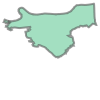

In [34]:
polygon_list[13]=MultiPolygon(polygon_list[13])
polygon_list[13]

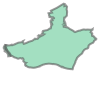

In [35]:
polygon_list[31]=MultiPolygon(polygon_list[31])
polygon_list[31]

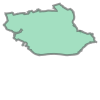

In [36]:
polygon_list[30]=MultiPolygon(polygon_list[30])
polygon_list[30]

In [37]:
len(polygon_list)

33

In [38]:
map_data.geometry=polygon_list

In [39]:
def rotator(row):
    row['geometry'] = shapely.affinity.rotate(row['geometry'], -90)
    return row

In [40]:
#map_data=map_data.apply(rotator,axis=1)

In [41]:
map_data.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F            
1               Croydon  E09000008   8649.441       0.000         F            
2               Bromley  E09000006  15013.487       0.000         F            
3              Hounslow  E09000018   5658.541      60.755         F            
4                Ealing  E09000009   5554.428       0.000         F            

  SUB_2006                                           geometry  
0           POLYGON ((-0.31772 51.39367, -0.31760 51.39377...  
1           POLYGON ((-0.15657 51.32151, -0.15652 51.32152...  
2           POLYGON ((0.00227 51.32914, 0.00226 51.32917, ...  
3           POLYGON ((-0.24456 51.48870, -0.24468 51.48868...  
4           POLYGON ((-0.37781 51.55499, -0.37770 51.55500...

In [42]:
map_data['coords']=map_data.geometry.centroid

LAT=[]
LNG=[]
for place in map_data.NAME.drop_duplicates():
        idx=boroughs.loc[boroughs.Borough==place].index[0]
        lat,lng=boroughs.loc[idx,['Latitude','Longitude']]
        LAT.append(lat)
        LNG.append(lng)

map_data_scale=[ [name,Latitude,Longitude,point.x,point.y] for name,point,Latitude,Longitude in zip(map_data.NAME.drop_duplicates(),map_data['coords'],LAT,LNG)]

map_data_scale=pd.DataFrame(map_data_scale,columns=['Borough','Latitude','Longitude','POINT-x','POINT-y'])

map_data_scale

from pyproj import Proj, transform

inProj = Proj(init='tmerc')
outProj = Proj(init='epsg:4326')
x1,y1 = map_data_scale.loc[0,['POINT-x','POINT-y']]
x2,y2 = transform(inProj,outProj,x1,y1)
print (x2,y2)

In [43]:
map_data.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry', 'coords'],
      dtype='object')

In [44]:
map_data=map_data[['NAME','HECTARES','geometry','coords']]

In [45]:
map_coords=gpd.GeoDataFrame(geometry=map_data.coords)

In [46]:
def geopandas_colorbar_same_height(f, ax, vmin, vmax, cmap):
    from matplotlib.colors import Normalize
    from matplotlib import cm
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)

    norm = Normalize(vmin=vmin, vmax=vmax)
    n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
    n_cmap.set_array([])

    f.colorbar(n_cmap, cax=cax)

In [47]:
def map_sh_plot(data,data_coords,prop_coords,sx,sy,pad,fontsize,zorder,title,column,cmap,legende) : 
    # Control del tamaño de la figura del mapa
    
    ax=data.plot(figsize=(sx,sy),column=column, cmap='plasma',edgecolor='black',legend=legende)
    
    
    # Control del título y los ejes
    ax.set_title(title,pad = pad,fontdict={'fontsize':fontsize, 'color': '#4873ab'}) 
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    
    for x, y, label in zip(data_coords.geometry.x, data_coords.geometry.y, data.NAME):
             ax.annotate(label, xy=(x,y), xytext=(0, 0), textcoords="offset points",fontsize=15)
    
    if prop_coords.shape[0] >0:
            for x, y, label in zip(prop_coords.geometry.x,prop_coords.geometry.y,prop_coords.NAME):
                 ax.annotate(label, xy=(x, y), xytext=(0.5, 1.5), textcoords="offset points",fontsize=20, color='g')
    
    #prop_coords.plot(ax=ax,color='magenta', marker='*')
    
    ax.legend(label,loc='center left',bbox_to_anchor=(1,0.5), prop={'size':15})
    #ax=data.plot(column=column, cmap=cmap,edgecolor='black',zorder=zorder,alpha=1)
    # Mostrar el mapa finalizado
    return data_coords.plot(ax=ax, color='red')

map_data_london['coords']=map_data_london.geometry.centroid
map_data_london_coords=gpd.GeoDataFrame(geometry=map_data_london.coords)
map_sh_plot(map_data_london,map_data_london_coords,np.empty([0,0]),24,12,2,32,1,'Boroughs','HECTARES','plasma')

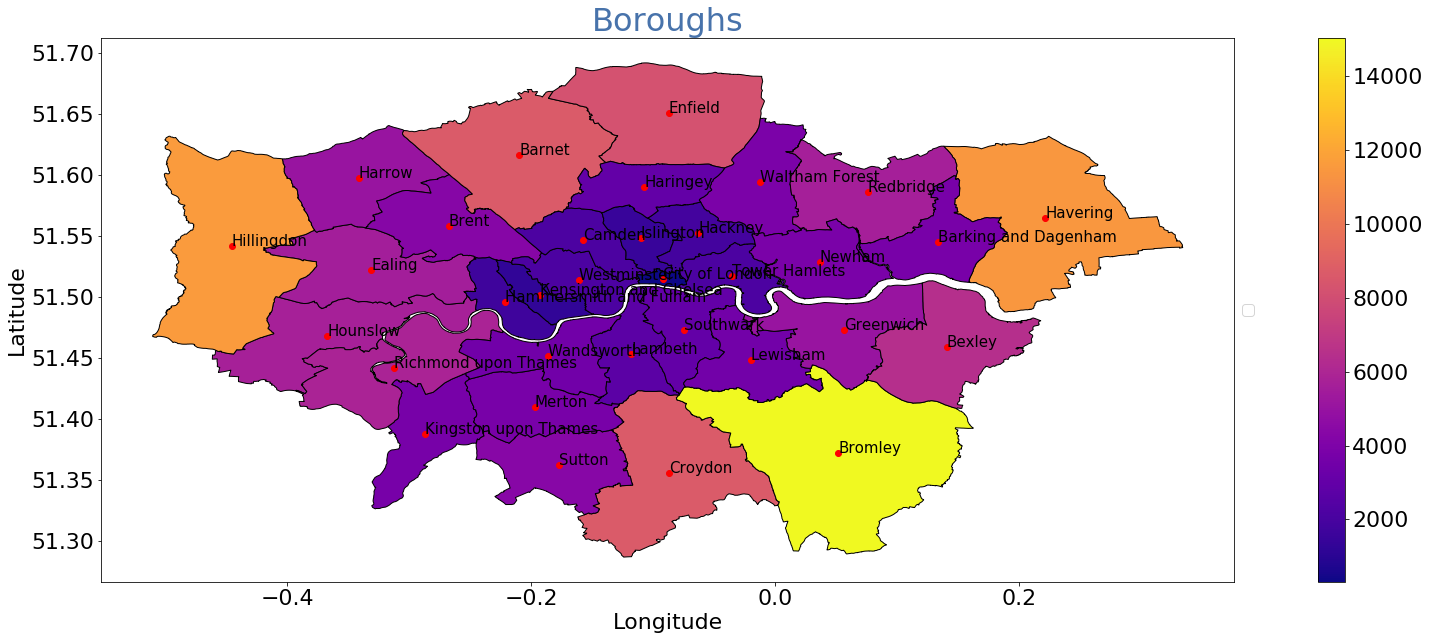

In [48]:
map_sh_plot(map_data,map_coords,np.empty([0,0]),30,10,-5,32,1,'Boroughs','HECTARES','plasma','reverse')

In [49]:
map_b0=map_data.loc[map_data.NAME.isin (bc05.loc[0,'0'])]

In [50]:
b0_coords=gpd.GeoDataFrame(geometry=map_b0.coords)

In [51]:
prop_coords=tur_gdf.loc[tur_gdf['B-Label']==0].reset_index().rename(columns={'index':'NAME'})[['NAME','geometry']]

In [52]:
prop_coords

NAME                   geometry
0           Aldwych  POINT (-0.07000 51.54500)
1             Angel  POINT (-0.02152 51.47585)
2         Bayswater  POINT (-0.18540 51.44390)
3         Belgravia  POINT (-0.05949 51.54331)
4   Cambridge Heath  POINT (-0.02658 51.54140)
5      Canary Wharf  POINT (-0.07663 51.53463)
6     Charing Cross  POINT (-0.08500 51.53400)
7         Chinatown  POINT (-0.29950 51.41030)
8       Clerkenwell  POINT (-0.08370 51.65160)
9           Dalston   POINT (0.18010 51.57680)
10         Deptford  POINT (-0.39304 51.55737)
11           Ealing  POINT (-0.19200 51.45500)

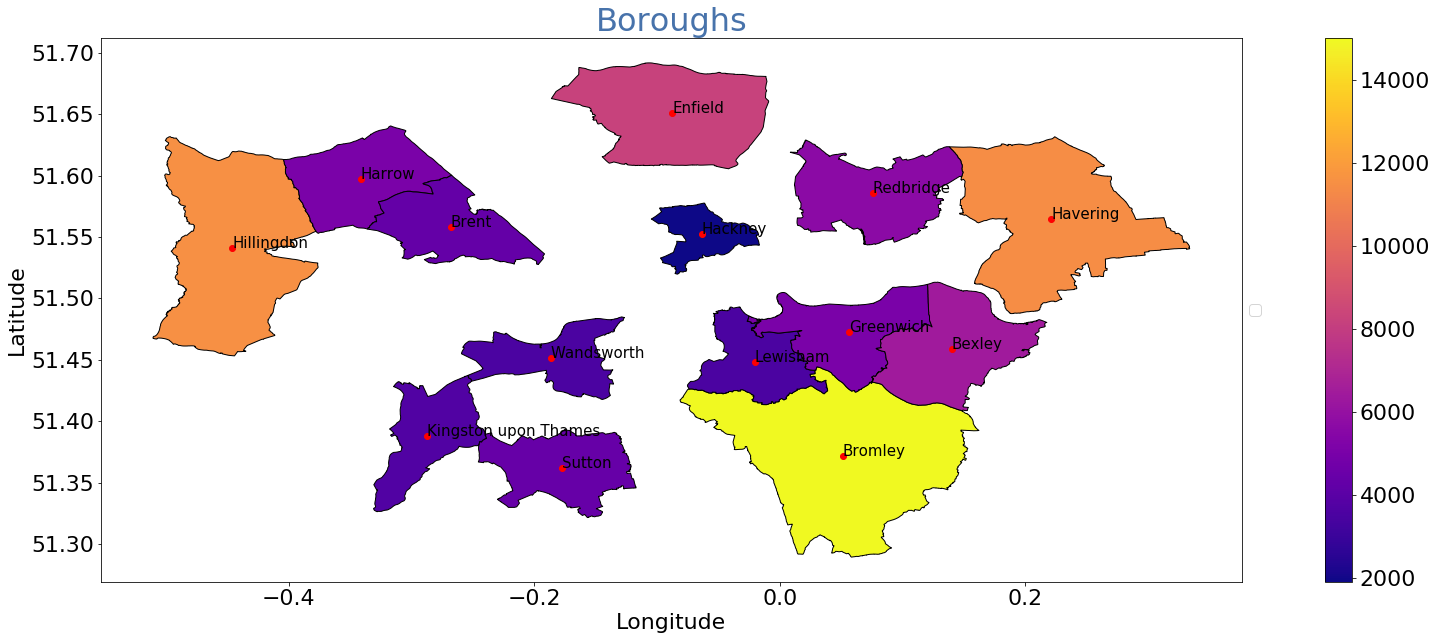

In [53]:
map_sh_plot(map_b0,b0_coords,np.empty([0,0]),30,10,2,32,1,'Boroughs','HECTARES','plasma','revrse')

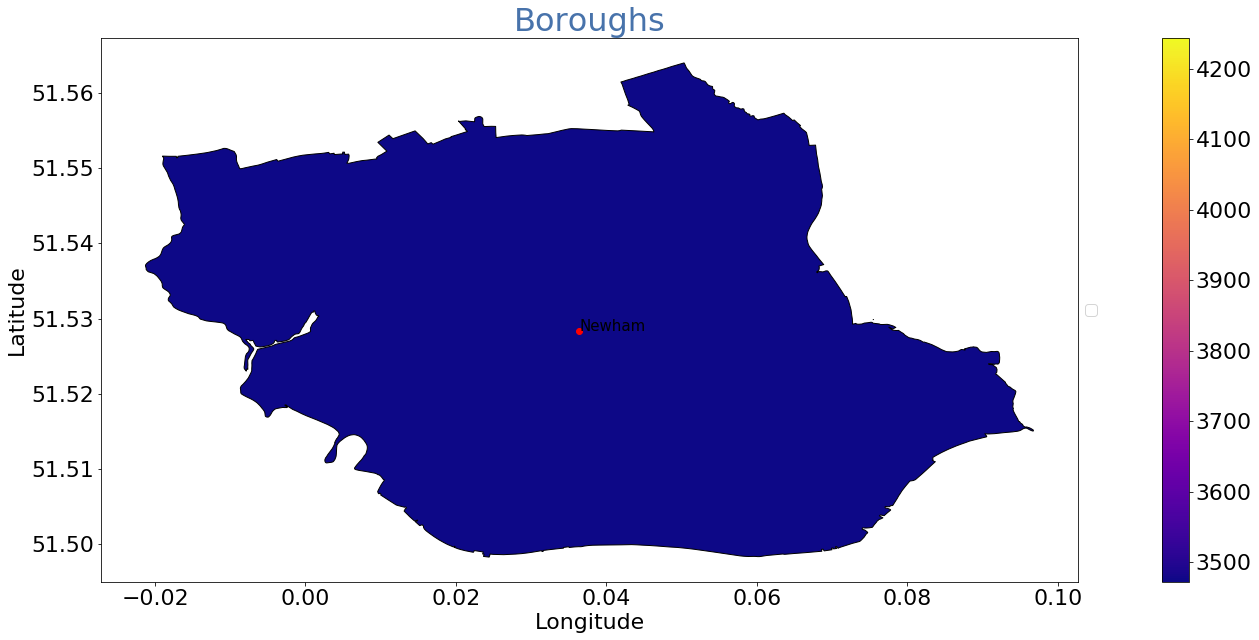

In [54]:
map_b1=map_data.loc[map_data.NAME.isin (bc05.loc[0,'1'])]
b1_coords=gpd.GeoDataFrame(geometry=map_b1.coords)
map_sh_plot(map_b1,b1_coords,np.empty([0,0]),30,10,2,32,1,'Boroughs','HECTARES','plasma','reverse')

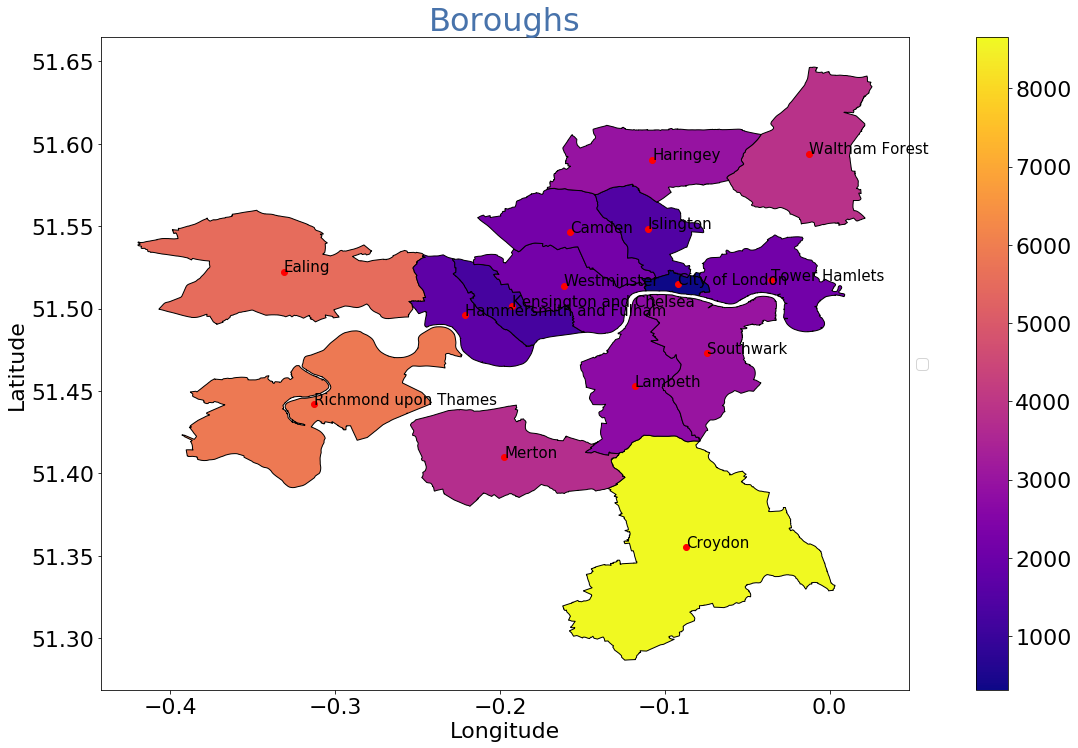

In [55]:
map_b2=map_data.loc[map_data.NAME.isin (bc05.loc[0,'2'])]
b2_coords=gpd.GeoDataFrame(geometry=map_b2.coords)
map_sh_plot(map_b2,b2_coords,np.empty([0,0]),24,12,2,32,1,'Boroughs','HECTARES','plasma','reverse')

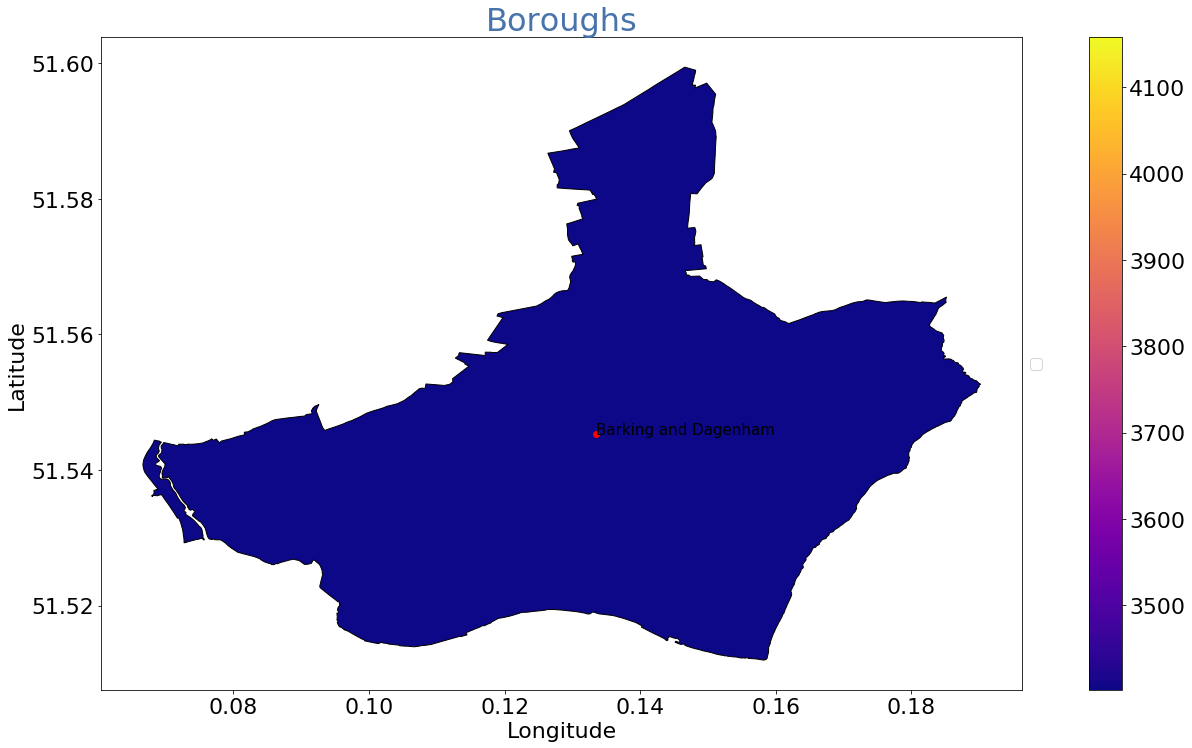

In [56]:
map_b3=map_data.loc[map_data.NAME.isin (bc05.loc[0,'3'])]
b3_coords=gpd.GeoDataFrame(geometry=map_b3.coords)
map_sh_plot(map_b3,b3_coords,np.empty([0,0]),24,12,2,32,1,'Boroughs','HECTARES','plasma','reverse')

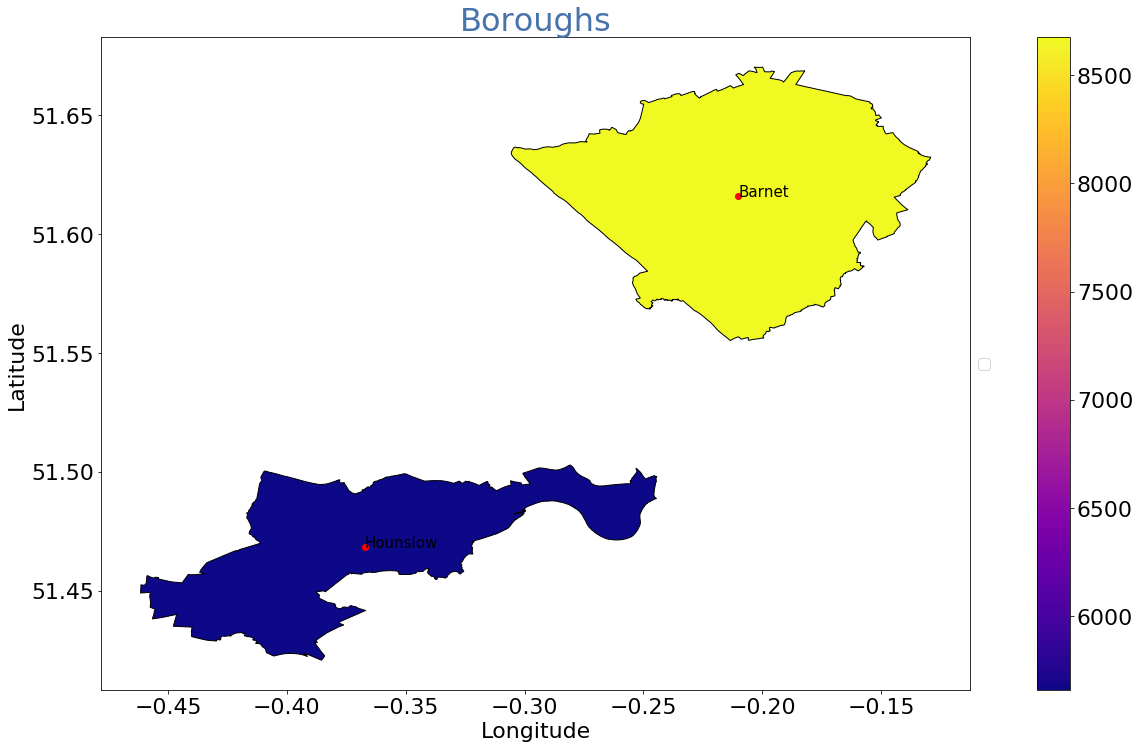

In [57]:
map_b4=map_data.loc[map_data.NAME.isin (bc05.loc[0,'4'])]
b4_coords=gpd.GeoDataFrame(geometry=map_b4.coords)
map_sh_plot(map_b4,b4_coords,np.empty([0,0]),24,12,2,32,1,'Boroughs','HECTARES','plasma','reverse')